# sensitivity of (e,e'pp)/(e,e'p) ratio to selection cuts

In [1]:
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from pylab import *
majorLocator   = MultipleLocator(0.01)
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
pmiss_analysis_bins , pmiss_analysis_bins_center , pmiss_multiples_bins , pmiss_bin_center = [] , [] , [] , []
for i in range(len(PmissBins)):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    for j in range(4):
        pmiss_multiples_bins.append( [ pmin + float(j*(pmax-pmin))/4 , pmin + float((j+1)*(pmax-pmin))/4 ])
    for j in range(2):
        pmiss_analysis_bins.append( [ pmin + float(j*(pmax-pmin))/2 , pmin + float((j+1)*(pmax-pmin))/2 ])

for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
print 'pmiss_bin_center:',pmiss_bin_center
for i in range( len(pmiss_analysis_bins) ):
    pmin , pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
    pmiss_analysis_bins_center.append(0.5*(pmin+pmax))
print 'pmiss_analysis_bins_center:',pmiss_analysis_bins_center

pmiss_bin_center: [0.31875, 0.35625, 0.39375, 0.43125, 0.4625, 0.48750000000000004, 0.5125, 0.5375000000000001, 0.5625, 0.5875000000000001, 0.6125, 0.6375, 0.6625000000000001, 0.6875, 0.7124999999999999, 0.7375, 0.78125, 0.84375, 0.90625, 0.96875]
pmiss_analysis_bins_center: [0.3375, 0.4125, 0.475, 0.525, 0.5750000000000001, 0.625, 0.675, 0.725, 0.8125, 0.9375]


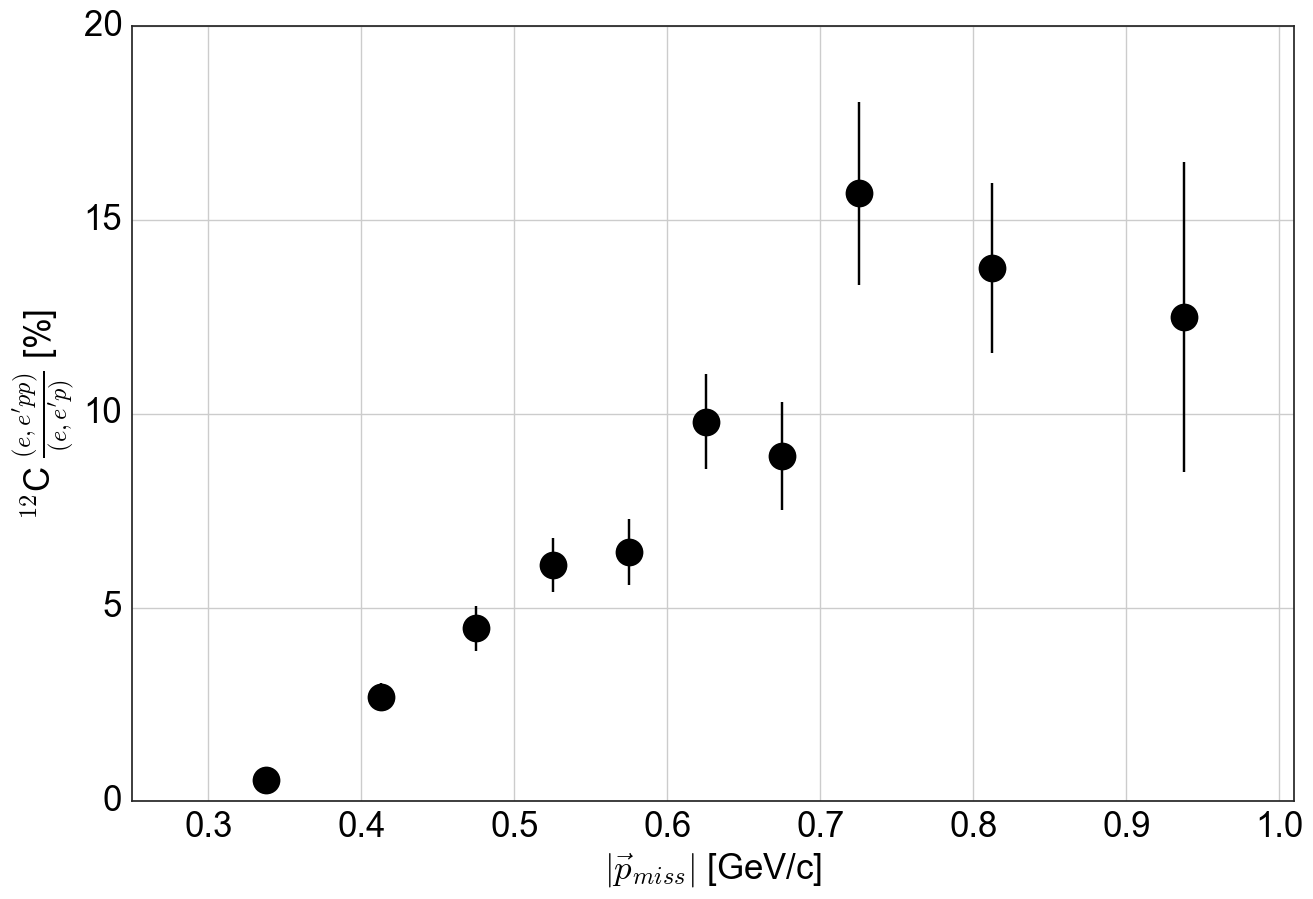

In [27]:
target = 'C12'
target_name = '$^{12}$C'
eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

pmiss_bin_center , ratio , ratio_err = eepp_eep_ratio(eep=eep , eepp=eepp,                                                        
                                                      cut_name='nominal_cuts',                                                      
                                                      target=target, target_name=target_name,                                                      
                                                      pmiss_bins=pmiss_analysis_bins,                                                                        
                                                      do_print = False,                                                       
                                                      do_save_plots=False)

# (e,e'pp)/(e,e'p) ratio from DATA with no acceptance correction

In [3]:
def eepp_eep_ratio(eep=TPlots() , eepp=TPlots(), 
                   cut='',
                   cut_name='nominal_cuts',                      
                   target = 'C12', target_name = '$^{12}$C',                   
                   pmiss_bins=None,                    
                   do_print=False,
                   do_plot=True,
                   do_save_plots=True):
    
    pmiss_bin_center = []
    eep_in_bin , eepp_in_bin , ratio , ratio_err =  [] , [] , [] , []
    for i in range( len(pmiss_bins) ):
        pmin , pmax = pmiss_bins[i][0] , pmiss_bins[i][1]
        pmiss_bin_center.append(0.5*(pmin+pmax))
        if 'nominal' in cut_name:
            selection_cut = ROOT.TCut("(%f<Pmiss3Mag && Pmiss3Mag<%f)"%(pmin , pmax))
        else:
            selection_cut = ROOT.TCut("(%f<Pmiss3Mag && Pmiss3Mag<%f) && (%s)"%(pmin , pmax , cut))
        
        eep_in_bin.append( eep.GetEntries(selection_cut) )
        eepp_in_bin.append( eepp.GetEntries(selection_cut) )
        ratio.append(100*float(eepp_in_bin[-1])/eep_in_bin[-1])
        ratio_err.append(ratio[-1] * np.sqrt(1./eepp_in_bin[-1] + 1./eep_in_bin[-1]))
    
    eep.Close()
    eepp.Close()
     
    if do_plot:
        fig,ax = plt.subplots(figsize=(15,10))
        plt.errorbar(pmiss_bin_center,ratio,xerr=np.zeros(len(pmiss_bin_center)),yerr=ratio_err,fmt='ro', color='black',markersize=20)
        set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%target_name + ' [%]')
        ax.grid()
        ax.set_ylim(0,1.02*np.max(ratio)+np.max(ratio_err))
        ax.set_xlim(0.25,1.01)
        
        if do_save_plots:
            fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/sensitivity_studies/eeppeep_measured_%s_%s.pdf'%(cut_name,target))

    return pmiss_bin_center , ratio , ratio_err

In [5]:
def modeified_cut_eepp_eep_ratio(modified_cut_name='Xb' , 
                                 cutXb = '1.2<Xb' , 
                                 target='C12',
                                 target_name='$^{12}$C',
                                 cut_theta_pq = 'theta_pq<25',
                                 cut_p_over_q ='fabs(p_over_q-0.79) < 0.17',
                                 cut_m_miss = 'Mmiss < 1.100',
                                 do_print=False,
                                 do_save_plots=False,
                                 ytext=None
                                ):
    
    eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
    eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

    pmiss_bin_center , ratio , ratio_err = eepp_eep_ratio(eep=eep , eepp=eepp,
                                                          cut_name='nominal_cuts',
                                                          target=target, target_name=target_name,
                                                          pmiss_bins=pmiss_analysis_bins,                                                                        
                                                          do_print=do_print,
                                                          do_plot=False)

    
    
    eep_relaxed = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_relaxed_ppSRCCut_DATA_%s.root'%target , 'anaTree')
    eepp_relaxed = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_relaxed_ppSRCCut_DATA_%s.root'%target , 'anaTree')

    cut = '(%s) && (%s) && (%s) && (%s)'%(cutXb,cut_theta_pq,cut_p_over_q,cut_m_miss)
    pmiss_bin_center , r_mod , r_mod_err = eepp_eep_ratio(eep=eep_relaxed , eepp=eepp_relaxed,
                                                          cut=cut,
                                                          cut_name=modified_cut_name, 
                                                          target=target, 
                                                          target_name=target_name,                                                                    
                                                          pmiss_bins=pmiss_analysis_bins,                                                                                      
                                                          do_print=do_print,
                                                          do_plot=False)

    fig = plt.figure(figsize=(20,20))
    x = pmiss_bin_center
    ax = fig.add_subplot(211)
    ax.errorbar(x-0.001*np.ones(len(x)) , ratio , yerr=ratio_err , label='measured ratio' , fmt='o',markersize=20)
    ax.errorbar(x , r_mod , yerr=r_mod_err , label='modified cuts' , fmt='o', markersize=20)
    ax.xaxis.set_major_formatter( NullFormatter() )
    set_axes(ax,x_label='',y_label=r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%target_name + ' [%]',fontsize=30)
    ax.legend(fontsize=25,loc='best')#,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.grid()
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start+5, end, 5))


    ax = fig.add_subplot(212)
    y = [r_mod[i]/ratio[i] for i in range(len(x))]
    y_err = [y[i] * np.sqrt(np.square(ratio_err[i]/ratio[i])
                            +np.square(r_mod_err[i]/r_mod[i])) for i in range(len(x)) ]

    ax.errorbar(x , y , yerr=y_err , fmt='o',markersize=20 , color='black')
    ax.grid()
    start, end = ax.get_ylim()
#     ax.yaxis.set_ticks(np.arange(start+1, end, 1))
    average = np.average( y , weights=1./np.square(y_err))
    variance = np.average((y-average)**2, weights=1./np.square(y_err))
    std = np.sqrt(variance)
    plt.plot( x , average*np.ones(len(x)) , '-' , color='red')
    if ytext is None: 
        ytext=1.2*(average + std)
    plt.text(0.5 , ytext , '$%.2f \\pm %.2f $'%(100*average,100*std)+'%' , color='red' , fontsize=25)
    plt.fill_between( x , (average-std)*np.ones(len(x)) , (average+std)*np.ones(len(x)) , color='red' , alpha=0.2)
    set_axes(ax,x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',
             y_label=r"%s modified/nominal - cut"%target_name,
             fontsize=30)

    subplots_adjust(wspace=0.12,hspace=0)
    if do_save_plots:
        fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/sensitivity_studies/eepp_eep_modifiedcut_%s_%s.pdf'%(modified_cut_name,target))



# 12C

In [6]:
target = 'C12'
target_name = '$^{12}$C'

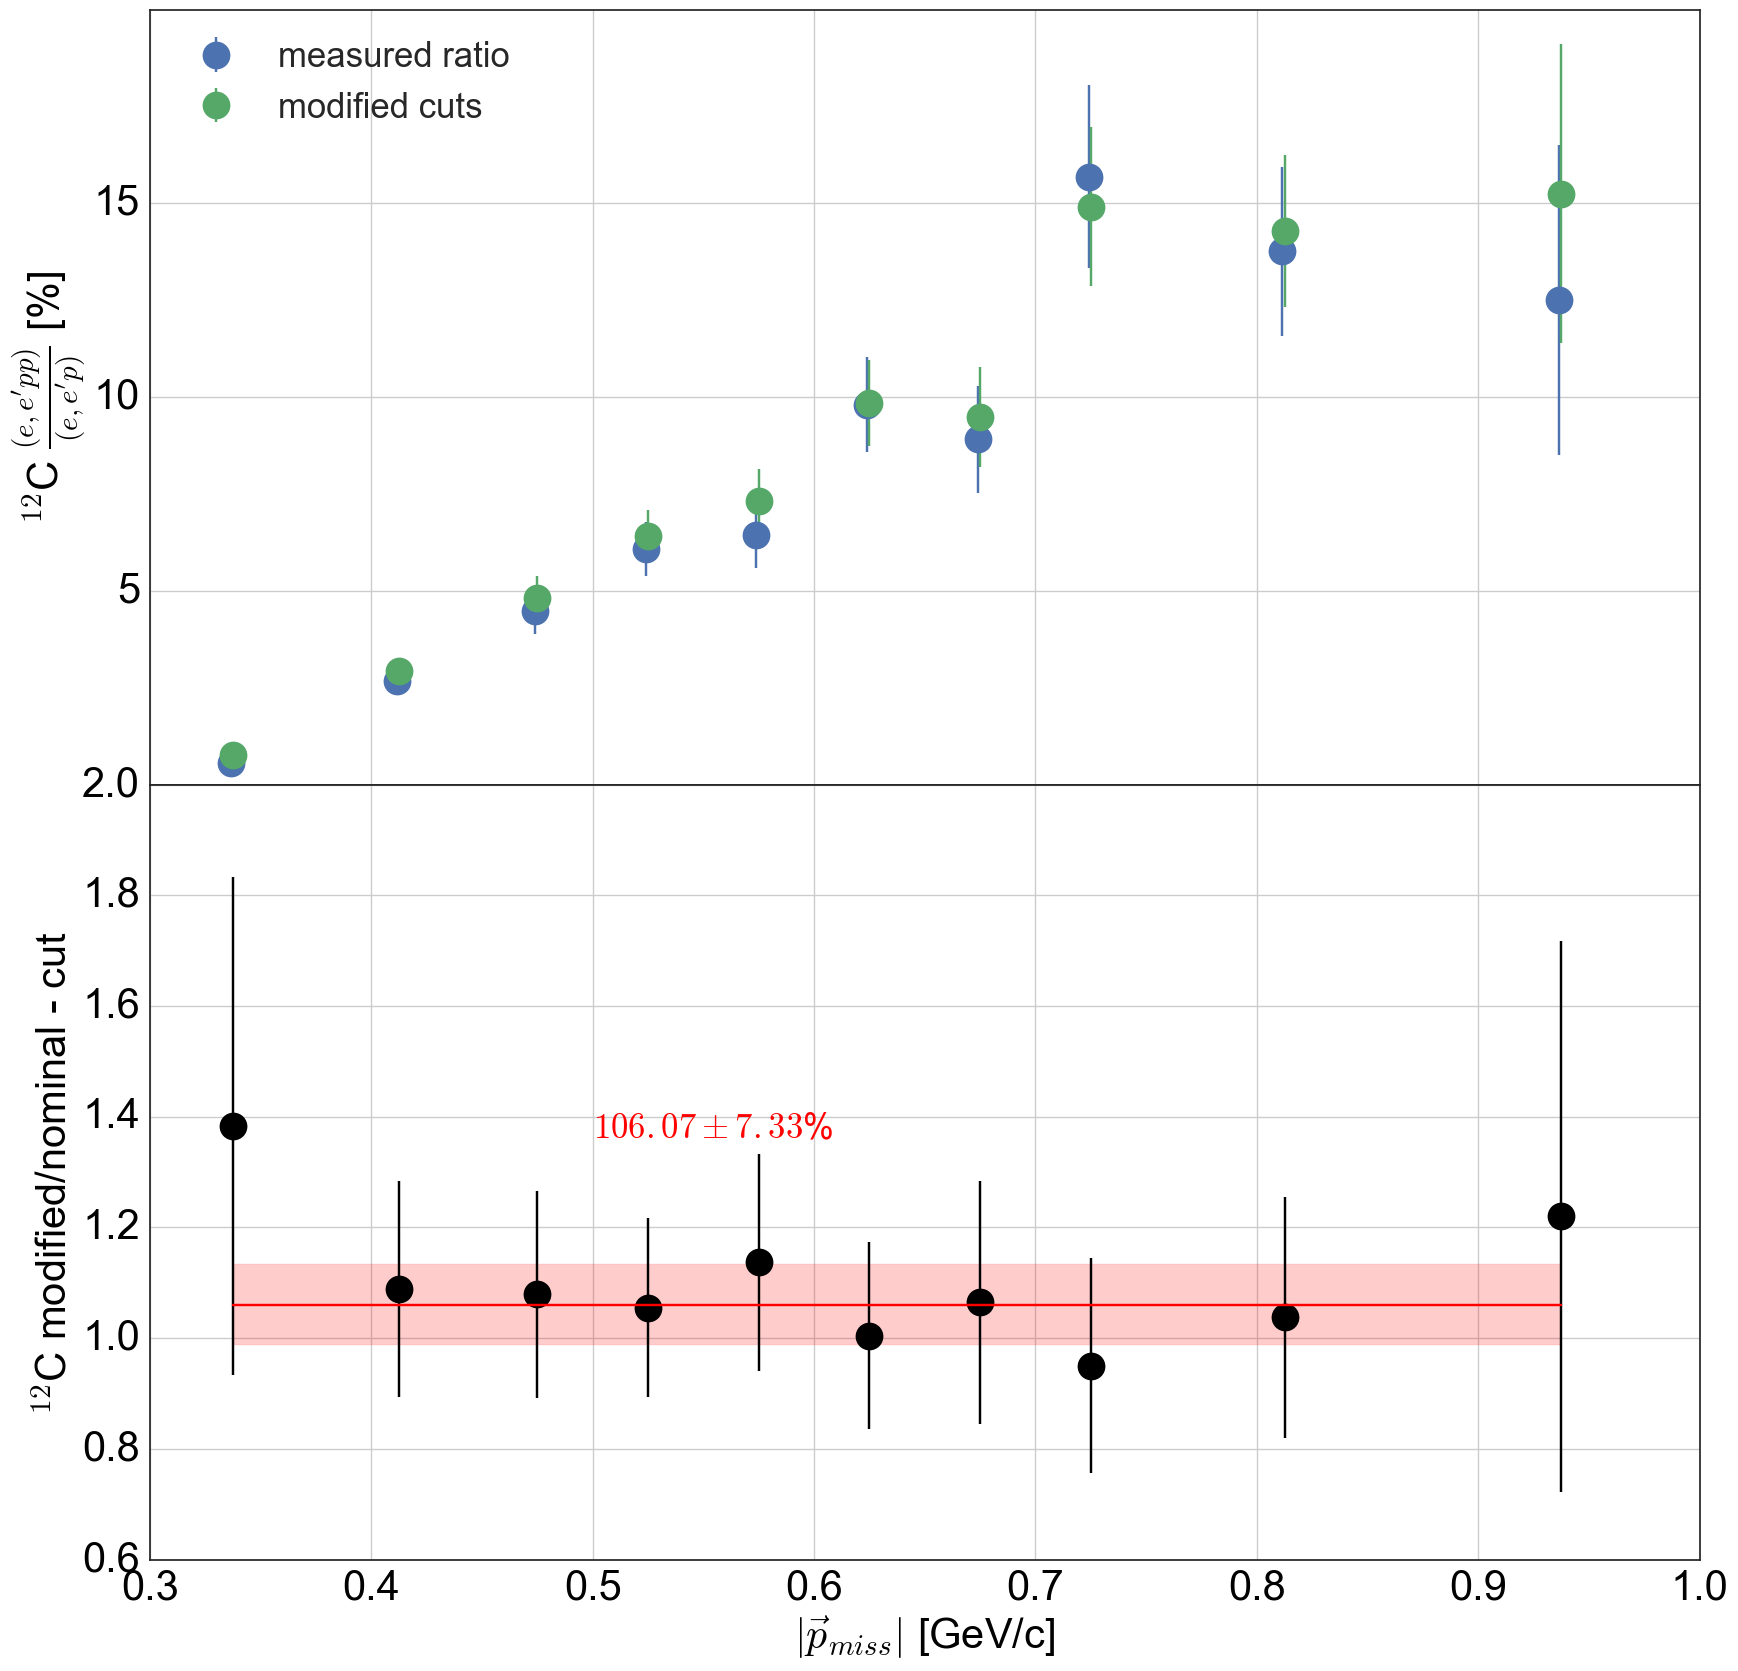

In [8]:
modeified_cut_eepp_eep_ratio(modified_cut_name='Xb115' , target=target,target_name=target_name,
                                 cutXb = '(1.15<Xb)' , 
                                 do_save_plots=True)

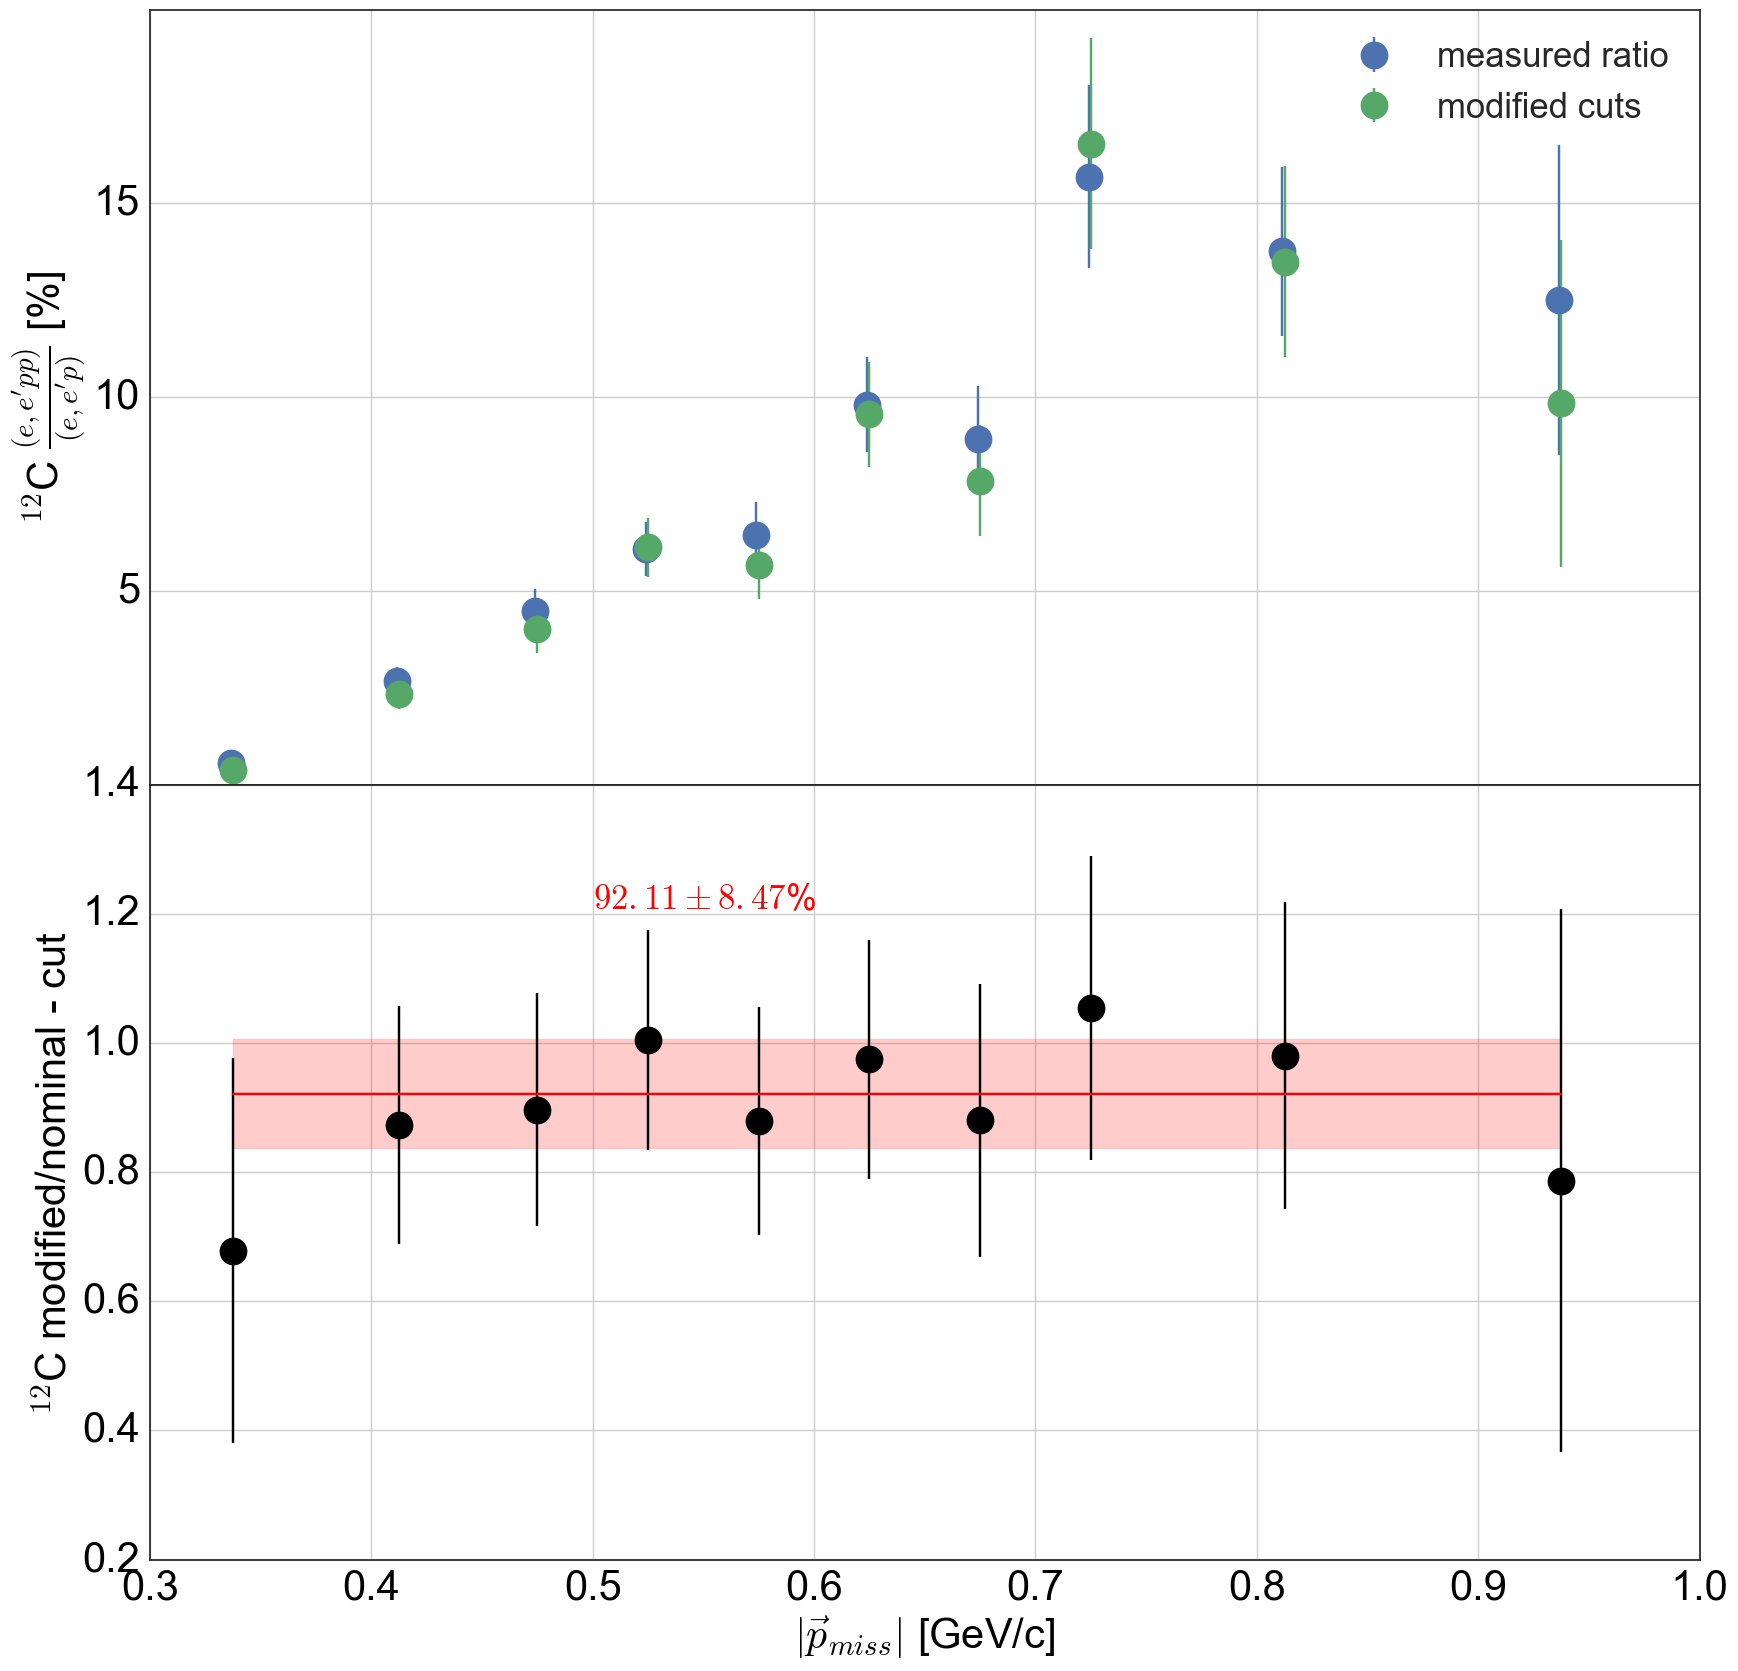

In [9]:
modeified_cut_eepp_eep_ratio(modified_cut_name='Xb125' , target=target,target_name=target_name,
                                 cutXb = '(1.25<Xb)' , 
                                 do_save_plots=True)

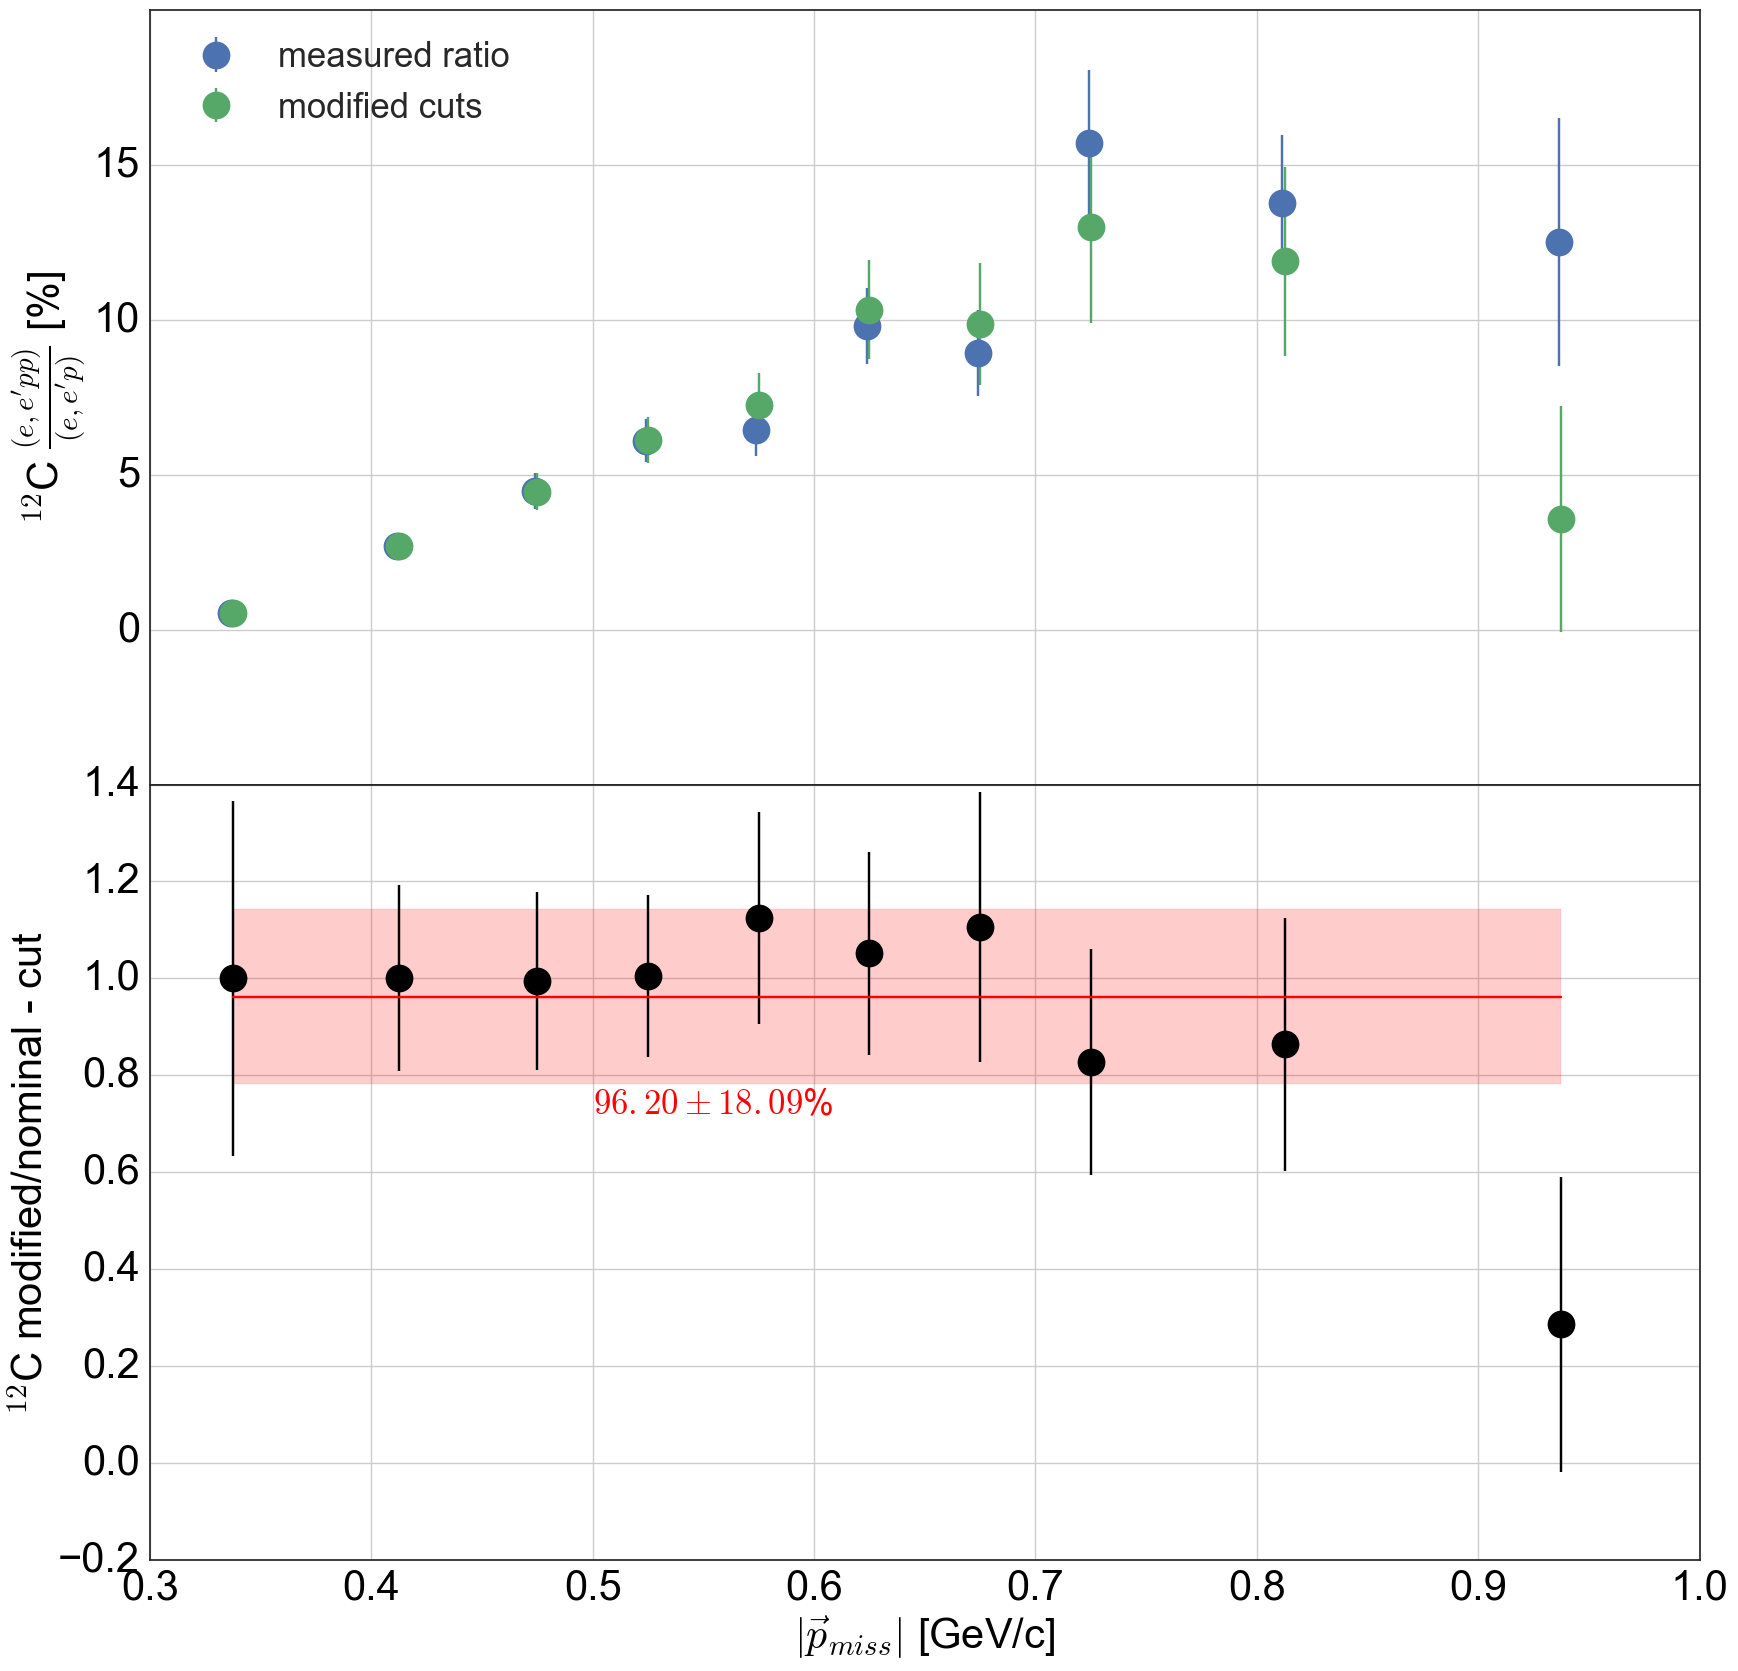

In [10]:
modeified_cut_eepp_eep_ratio(modified_cut_name='theta_pq_20' , target=target,target_name=target_name,
                             cut_theta_pq = '(theta_pq<20)',
                             ytext=0.72,                                
                             do_save_plots=True)

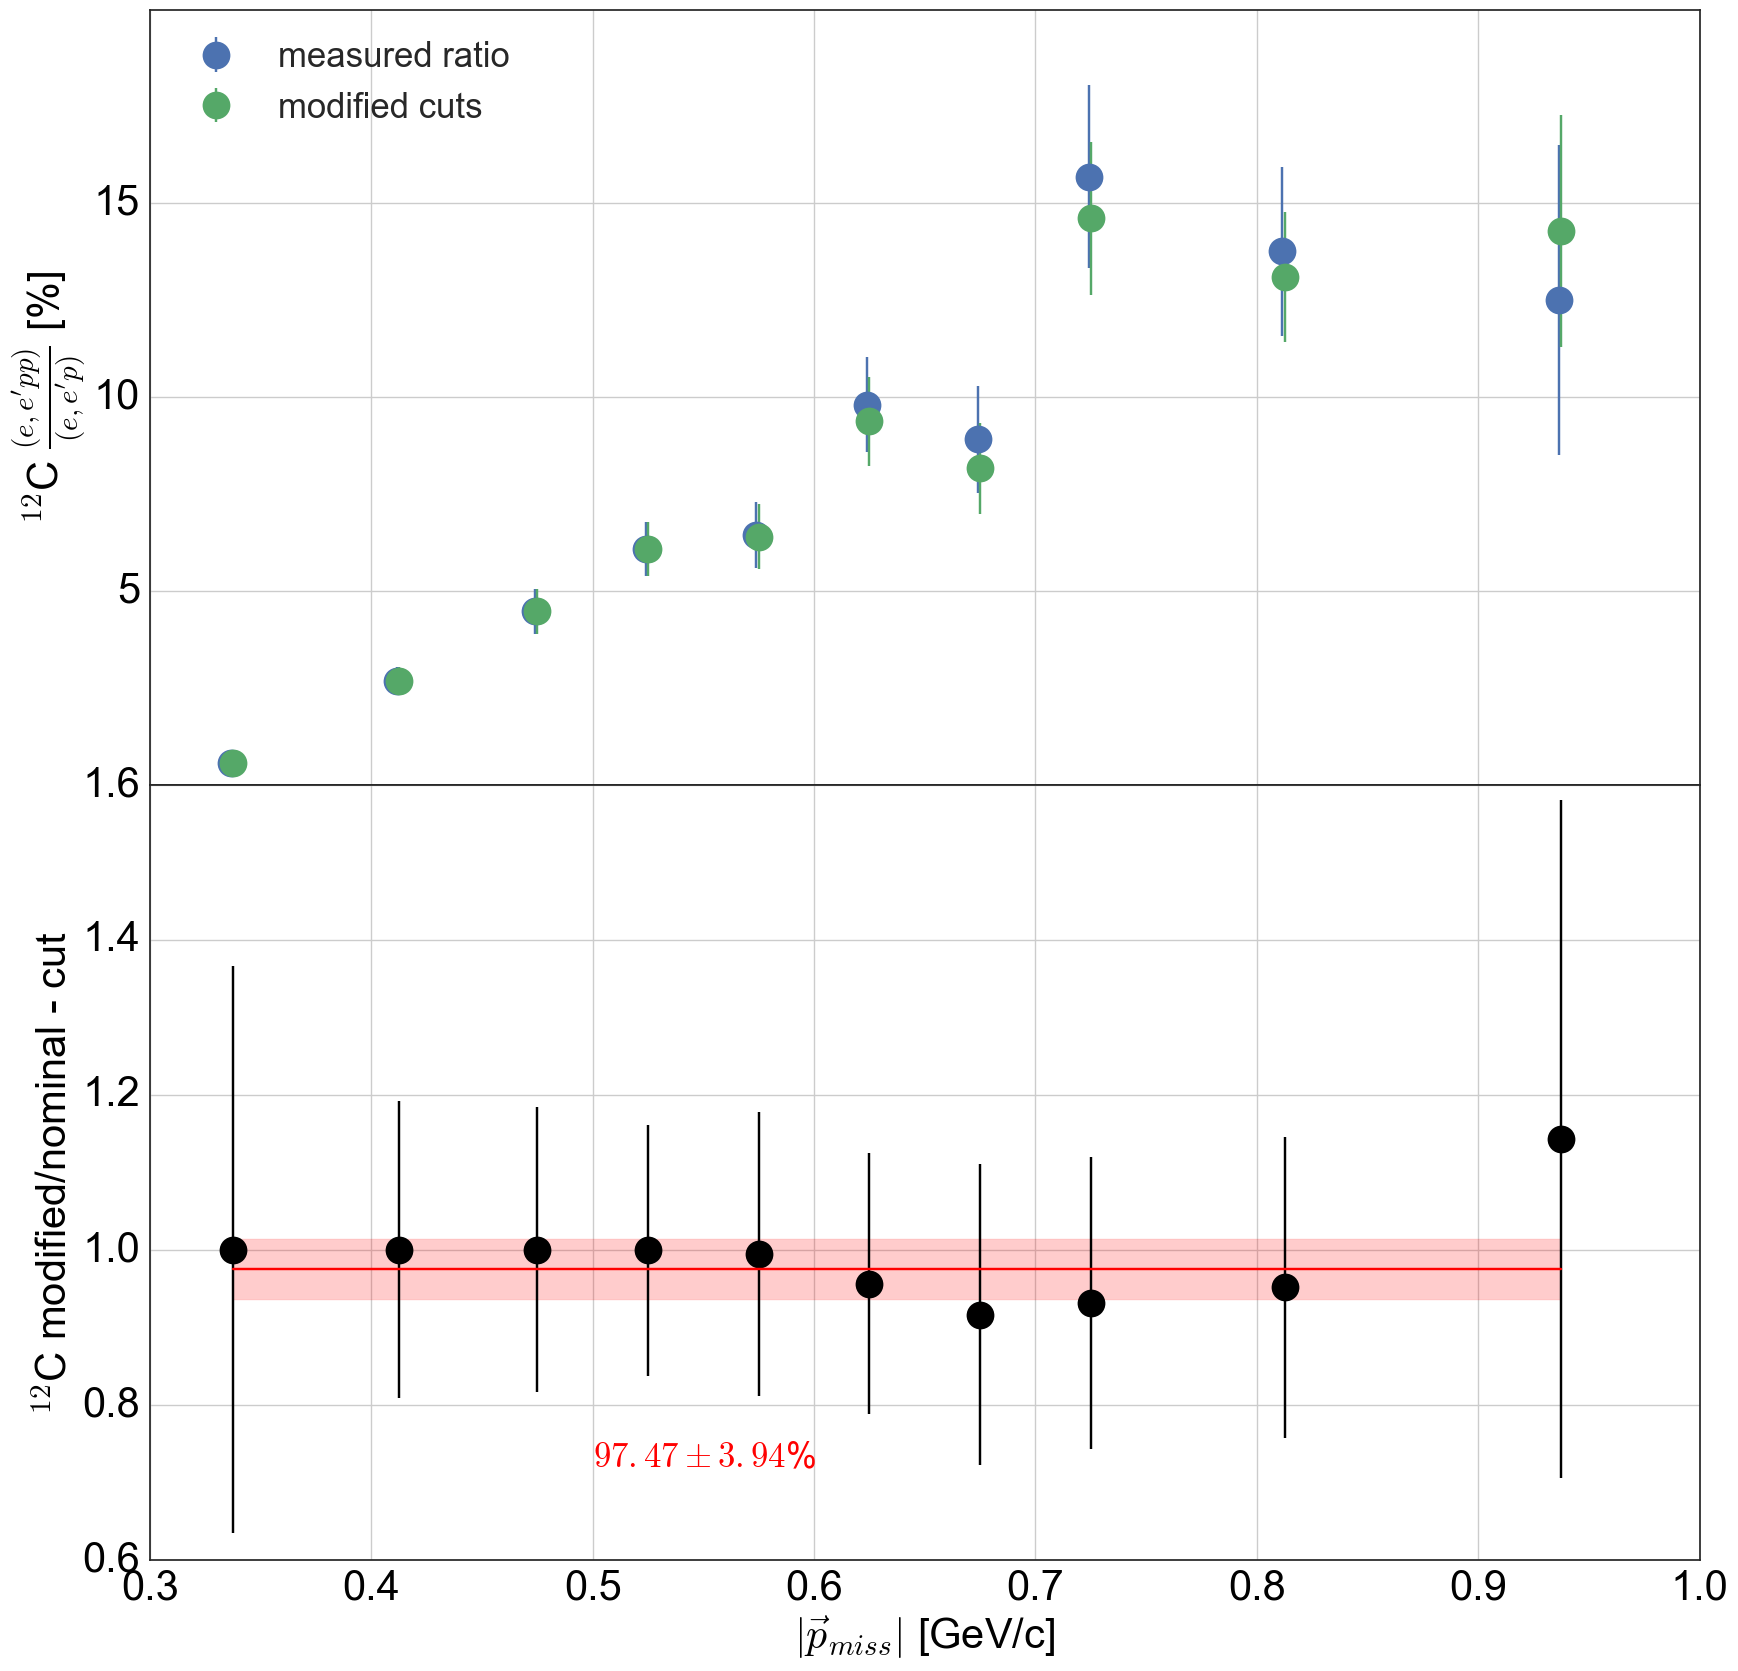

In [11]:
modeified_cut_eepp_eep_ratio(modified_cut_name='theta_pq_30' , target=target,target_name=target_name,
                             cut_theta_pq = '(theta_pq<30)',
                             ytext=0.72,                                
                             do_save_plots=True)

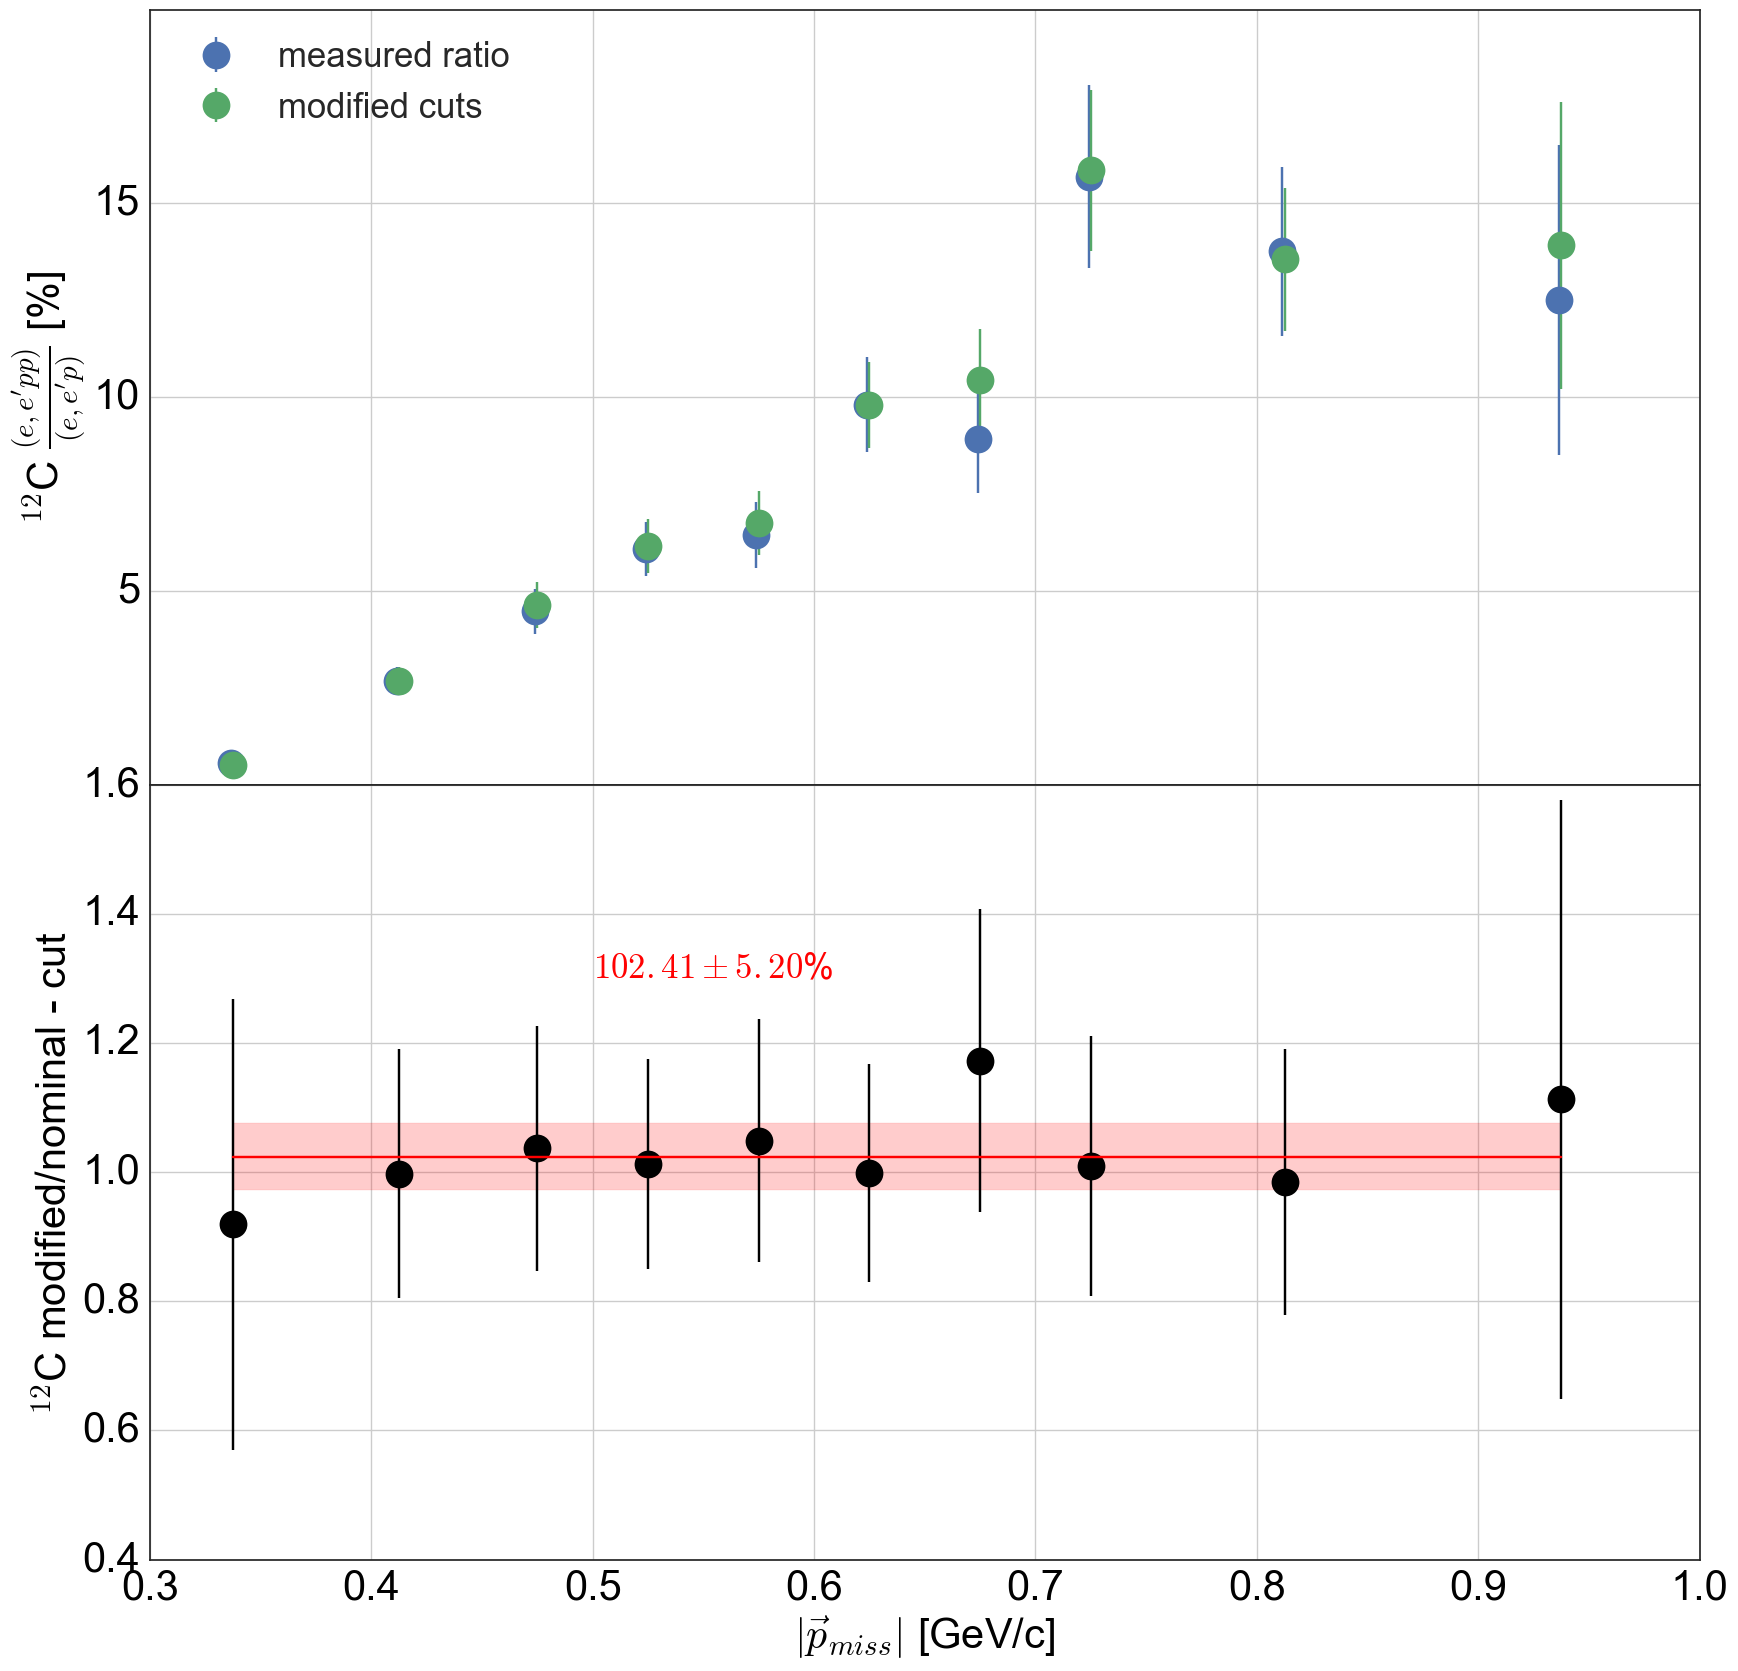

In [12]:
modeified_cut_eepp_eep_ratio(modified_cut_name='p_over_q_057_091' , target=target,target_name=target_name,
                             cut_p_over_q = '(0.57<p_over_q && p_over_q<0.91)',
                             ytext=1.3,                                
                             do_save_plots=True)

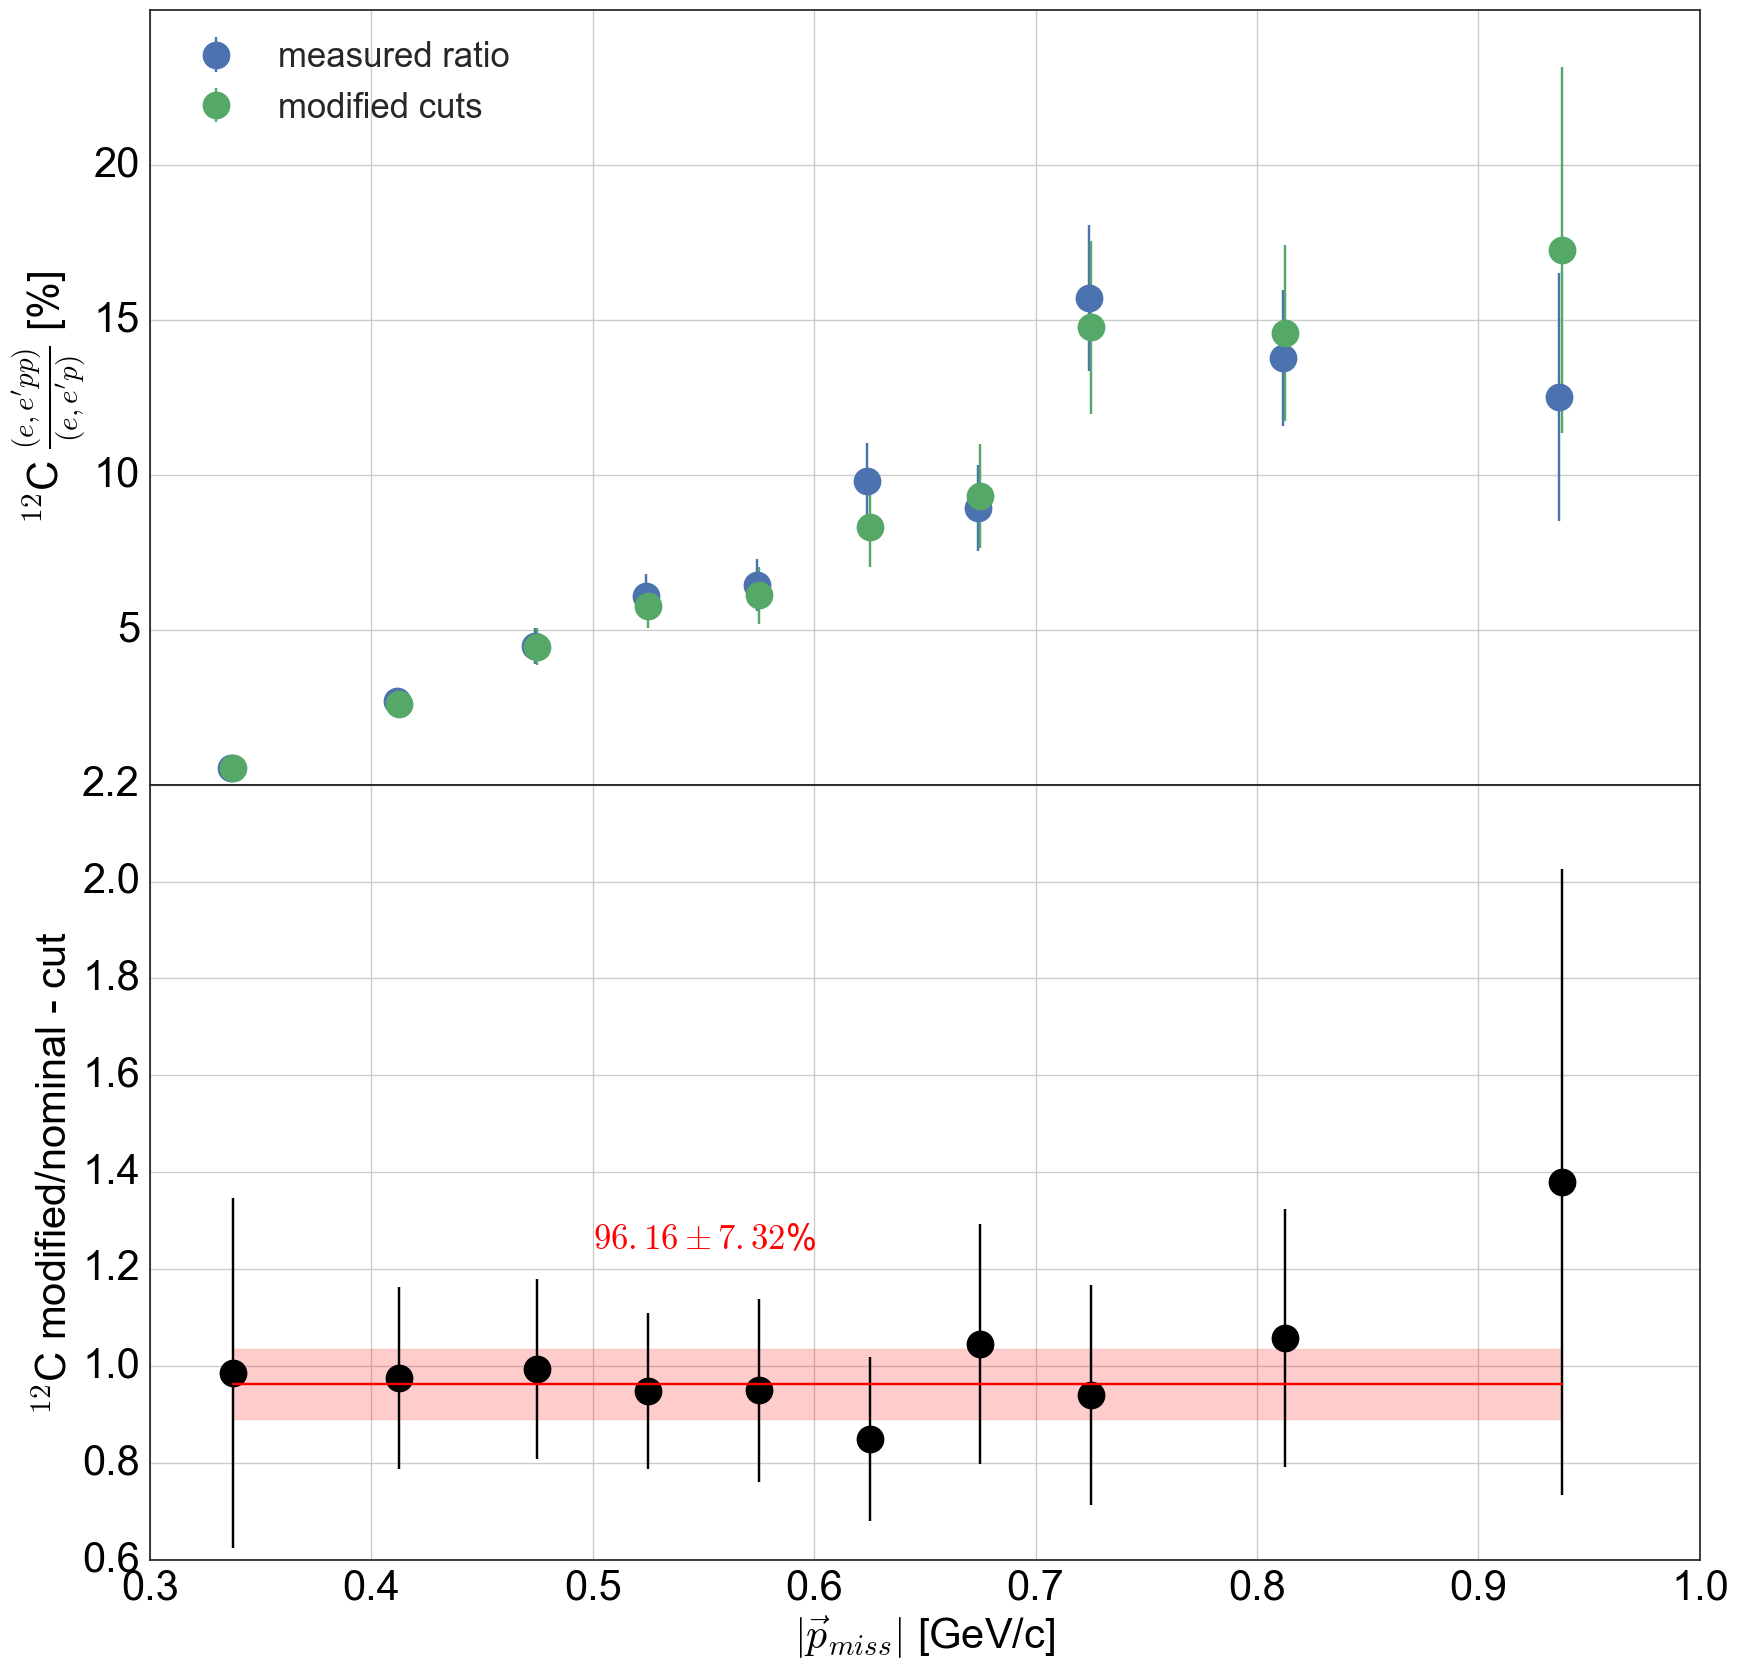

In [13]:
modeified_cut_eepp_eep_ratio(modified_cut_name='p_over_q_067_101' , target=target,target_name=target_name,
                             cut_p_over_q = '(0.67<p_over_q && p_over_q<1.01)',
#                              ytext=1.3,                                
                             do_save_plots=True)

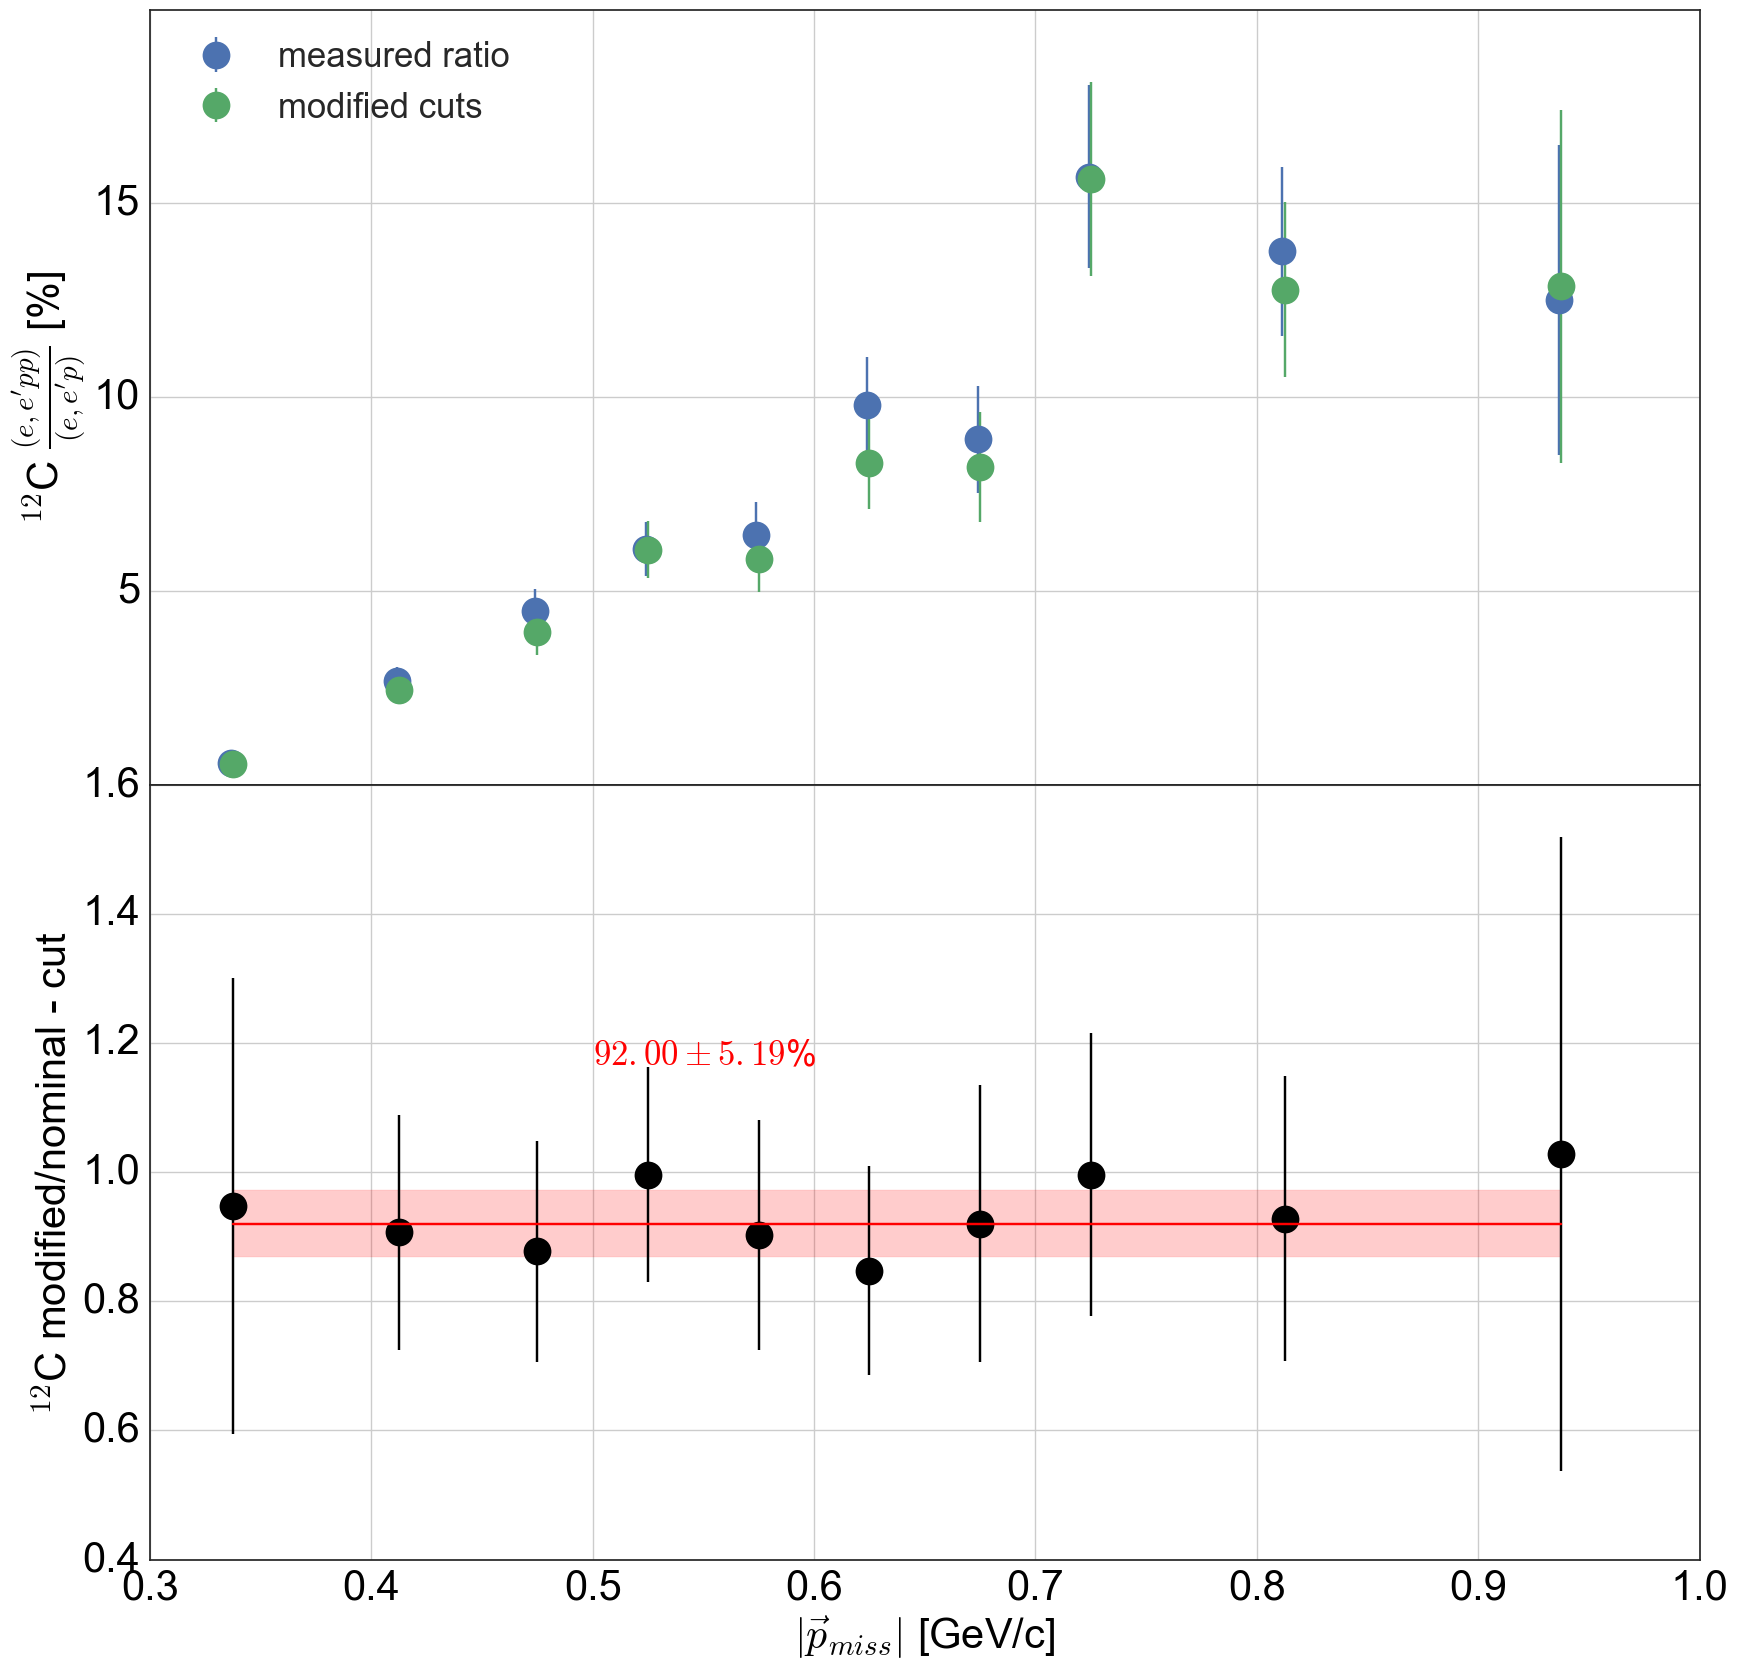

In [14]:
modeified_cut_eepp_eep_ratio(modified_cut_name='mmiss1050' , target=target,target_name=target_name,
                                 cut_m_miss = 'Mmiss < 1.050',
                                 do_save_plots=True)

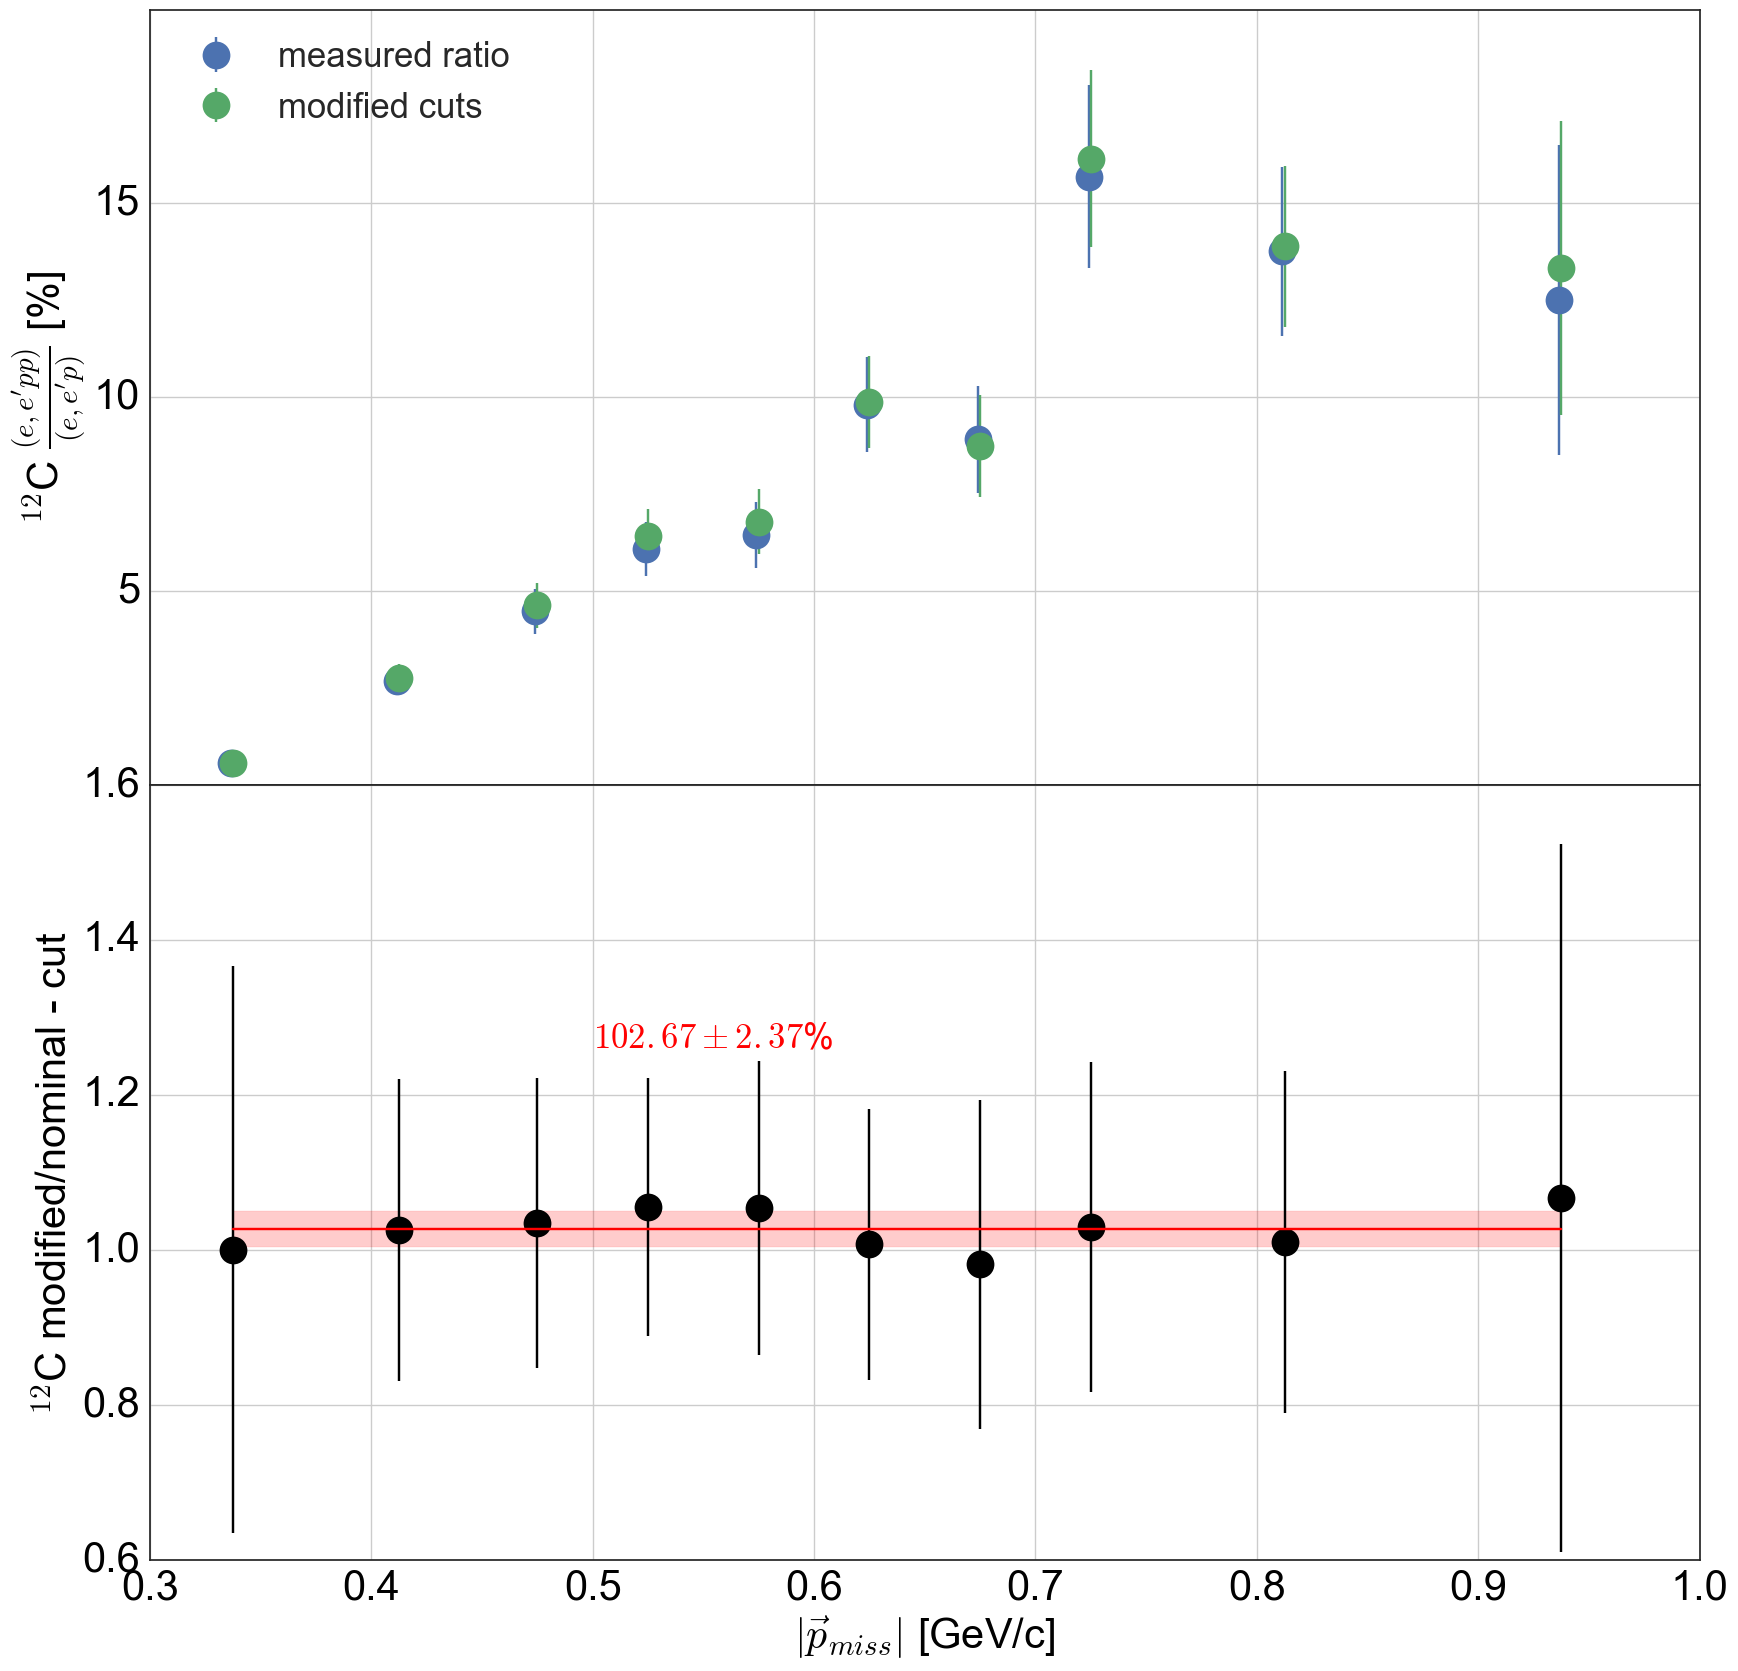

In [28]:
modeified_cut_eepp_eep_ratio(modified_cut_name='mmiss1150' ,  target=target,target_name=target_name,
                                 cut_m_miss = 'Mmiss < 1.150',
                                 do_save_plots=True)

# other targets

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


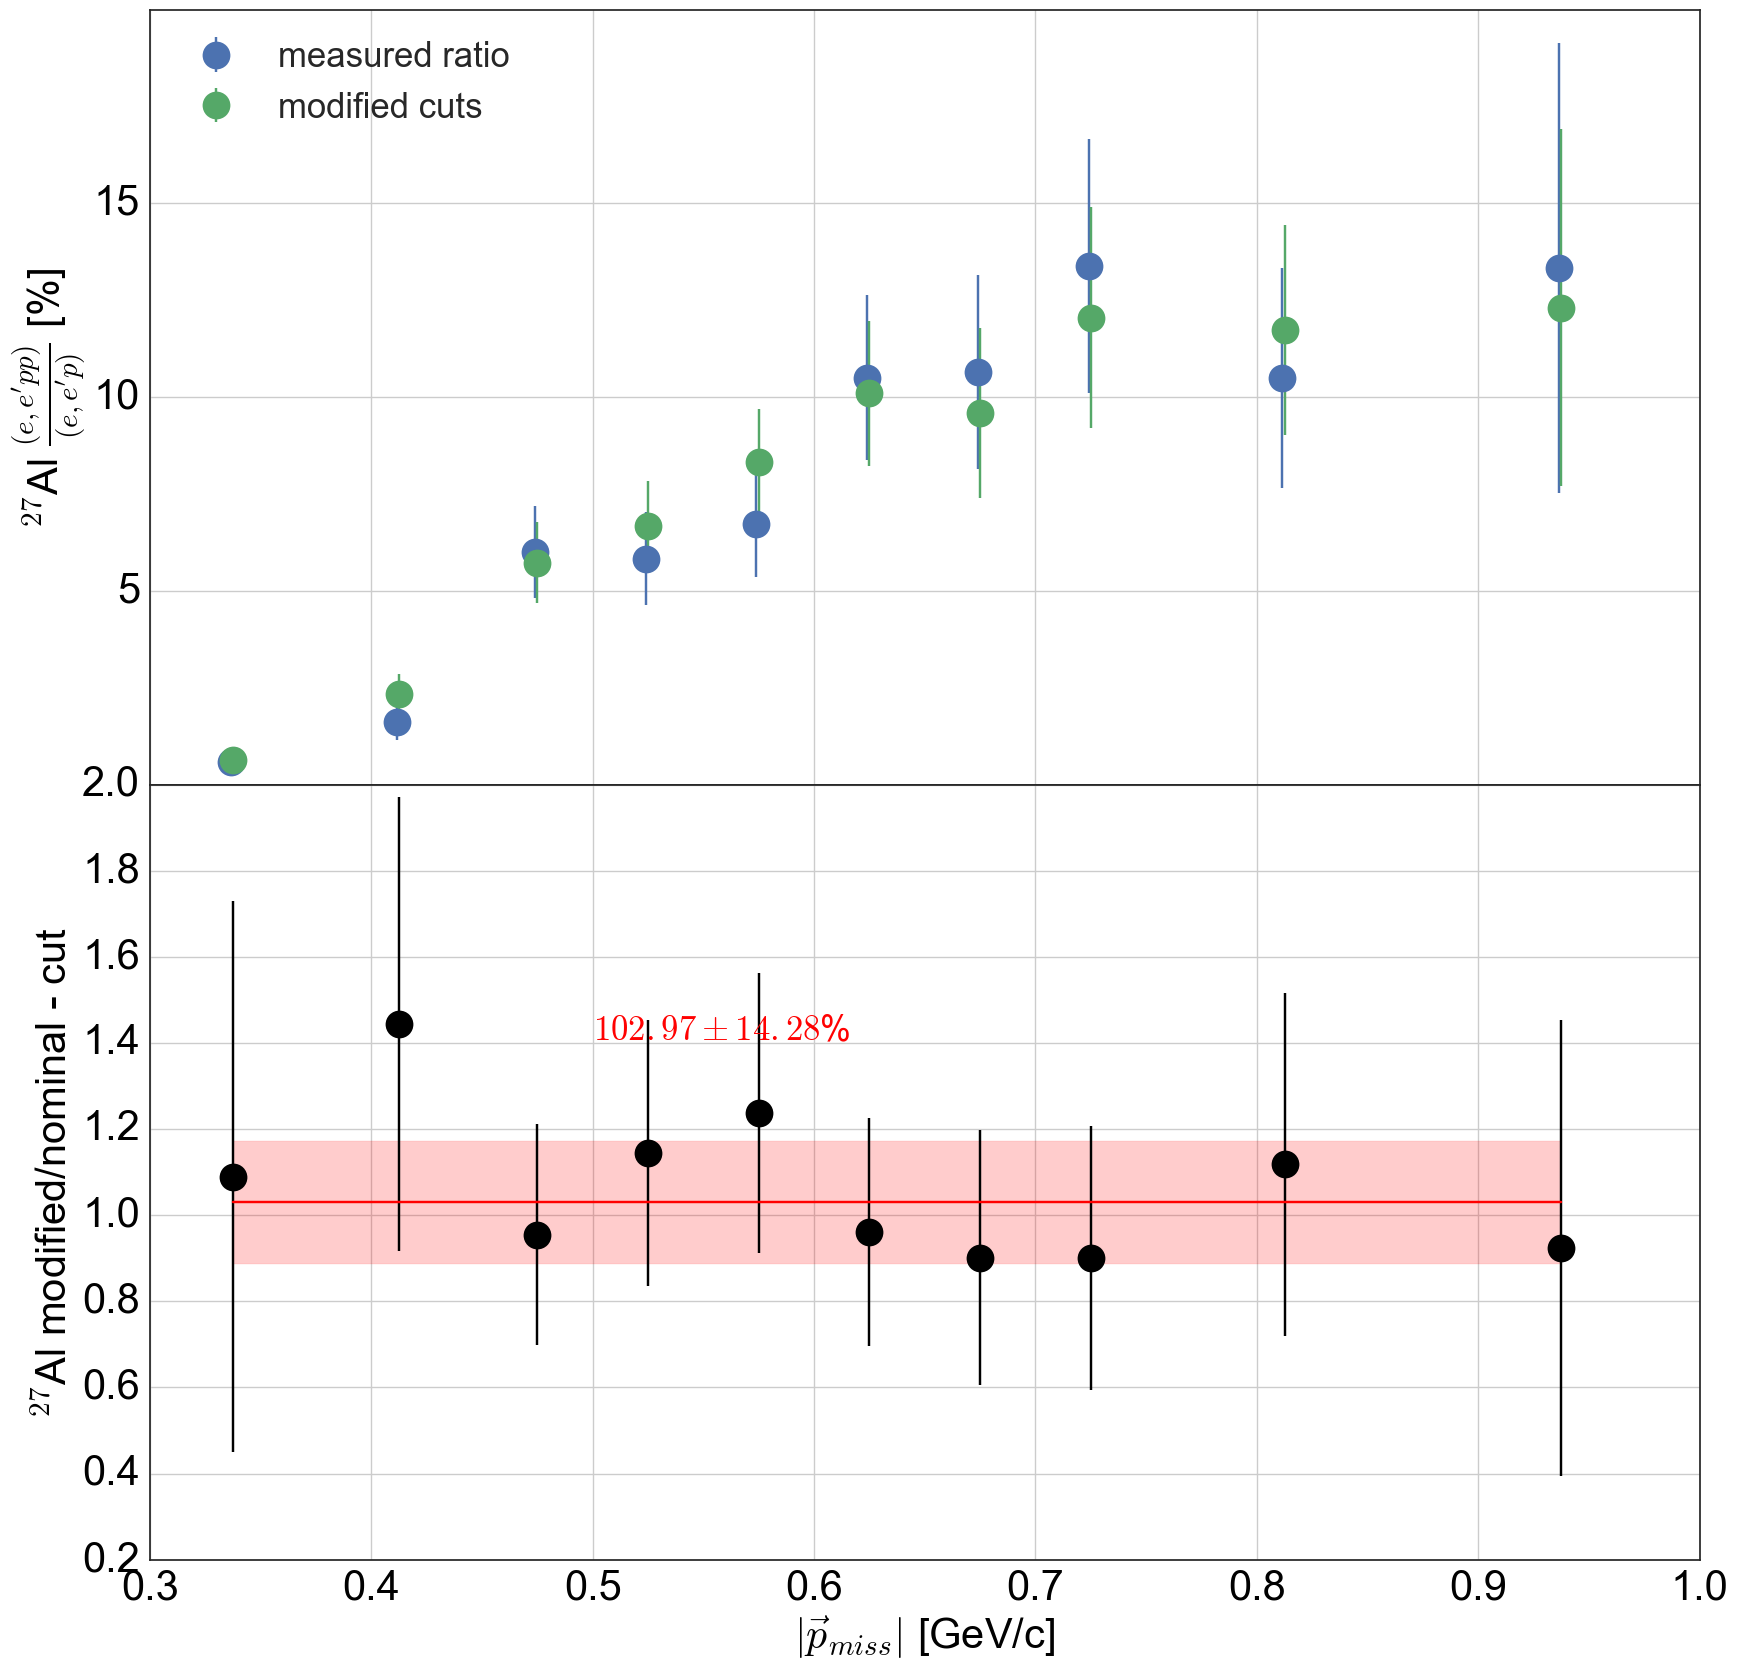

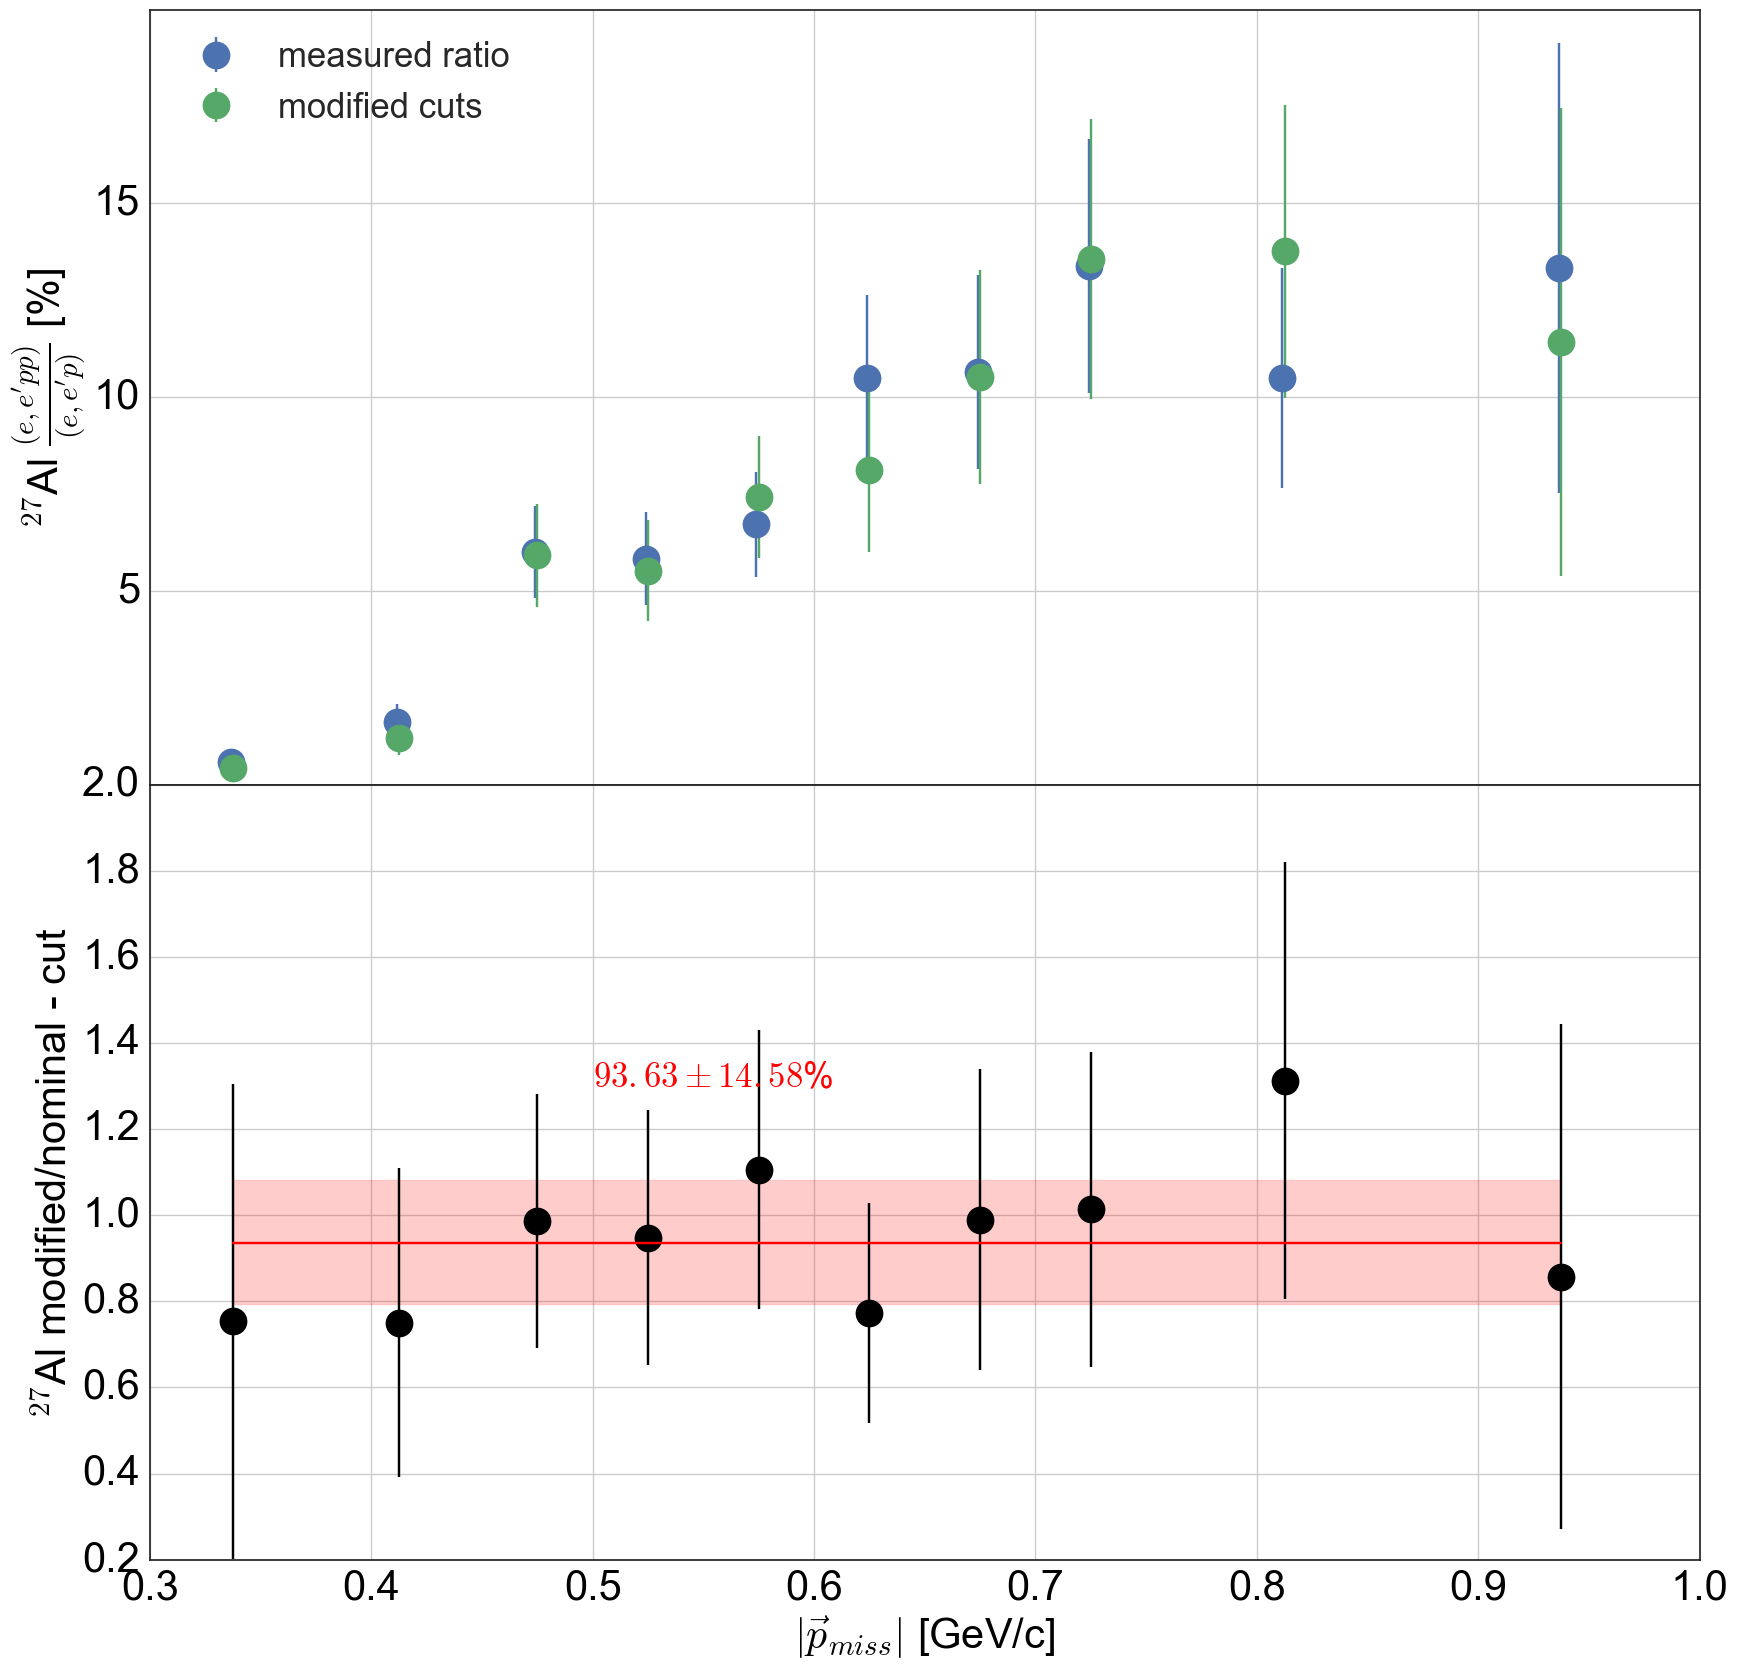

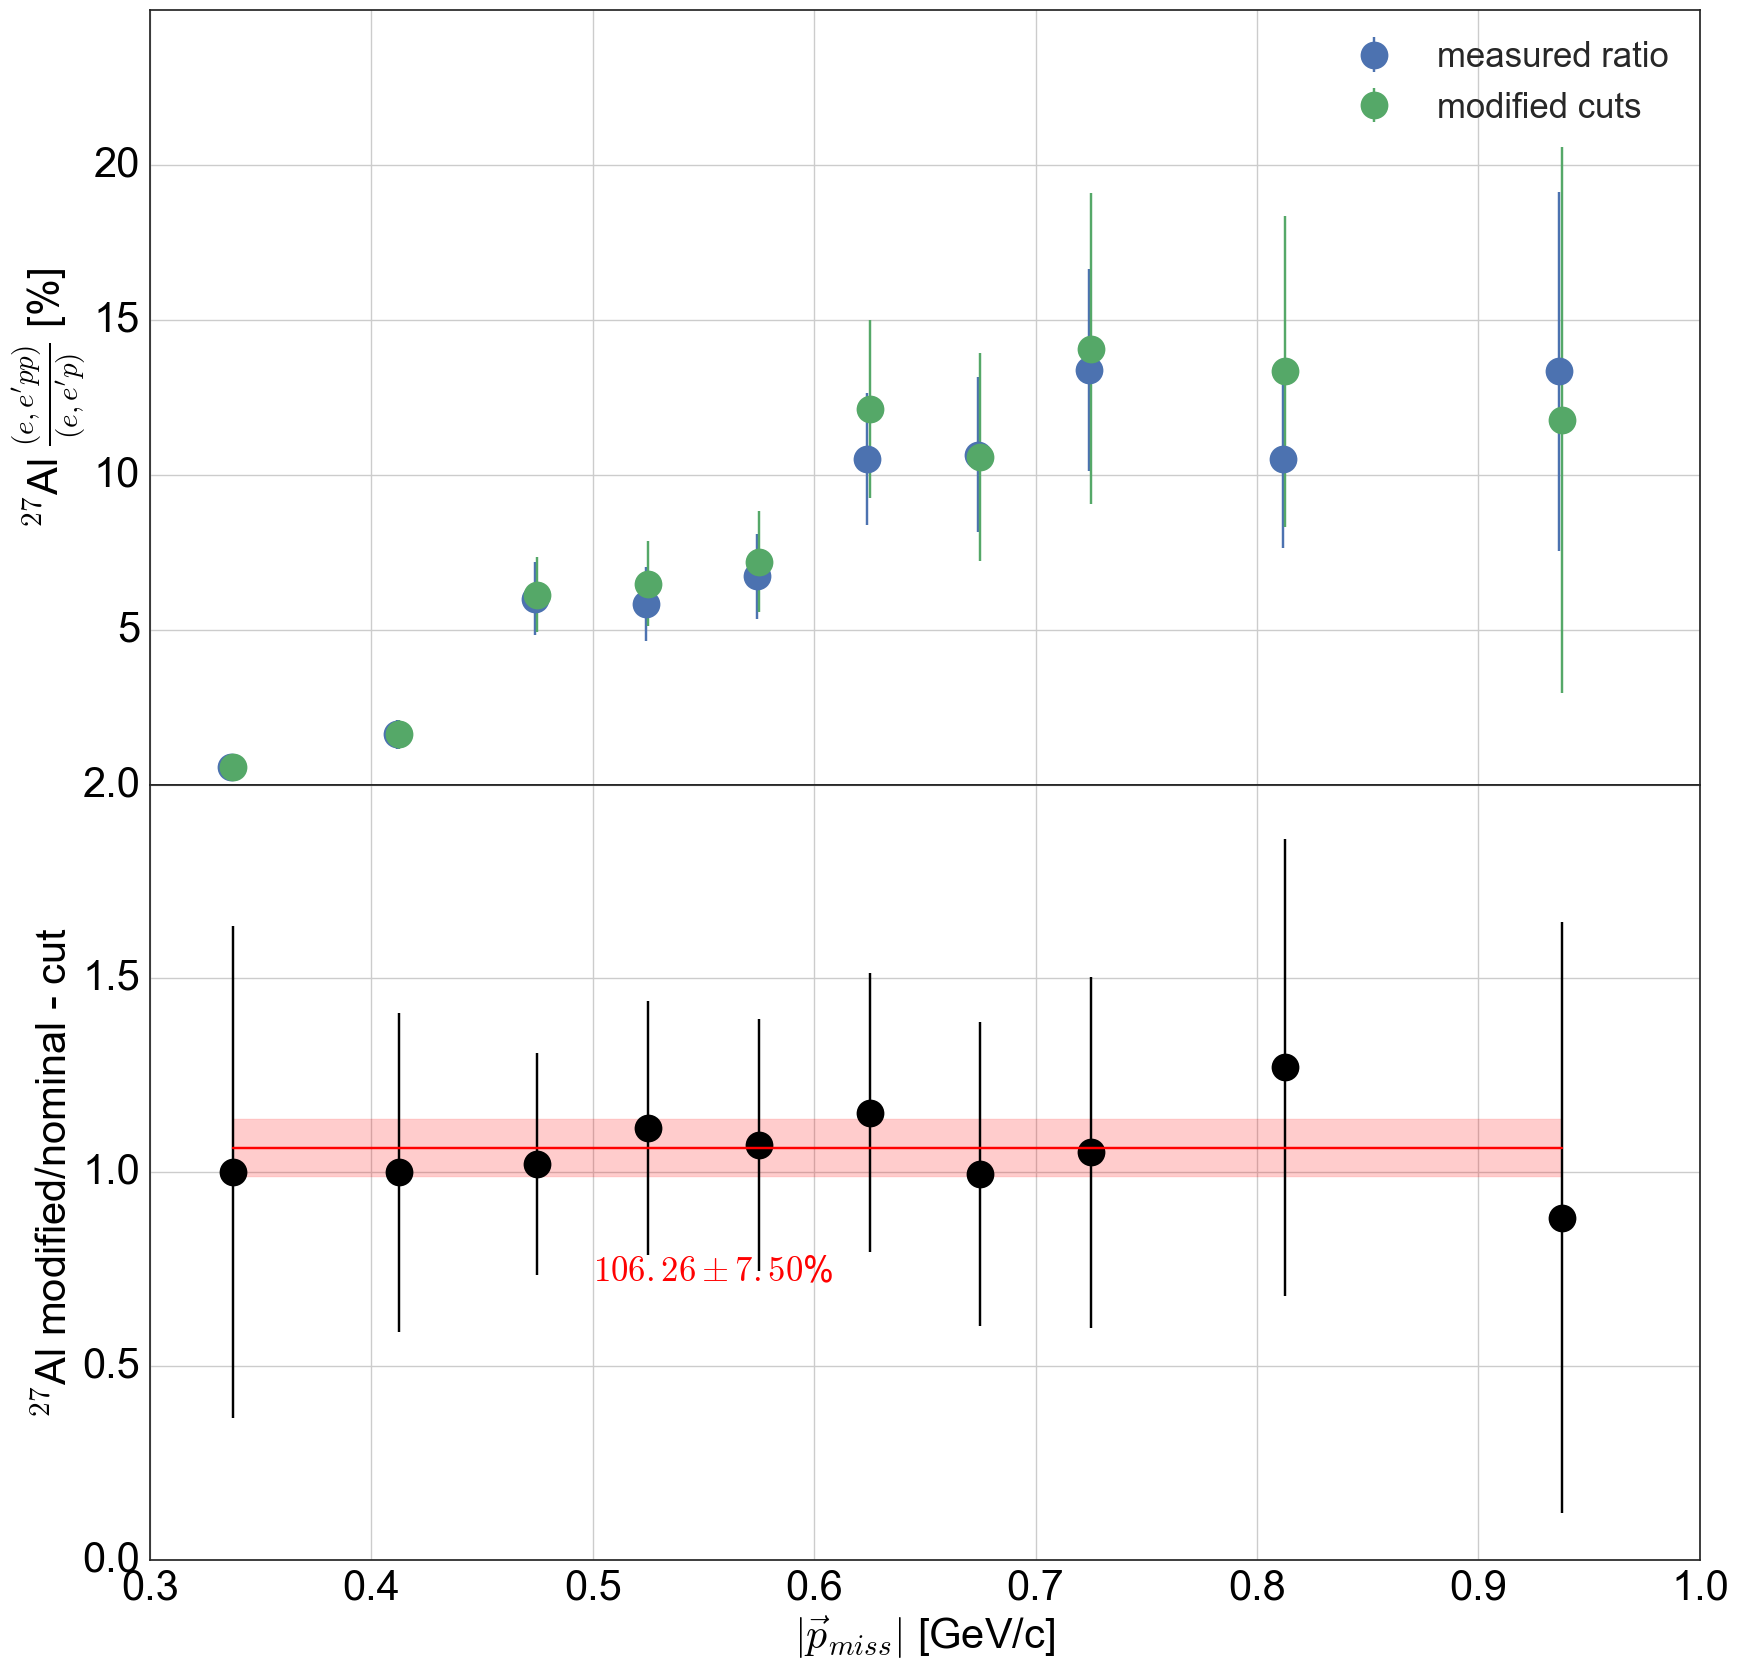

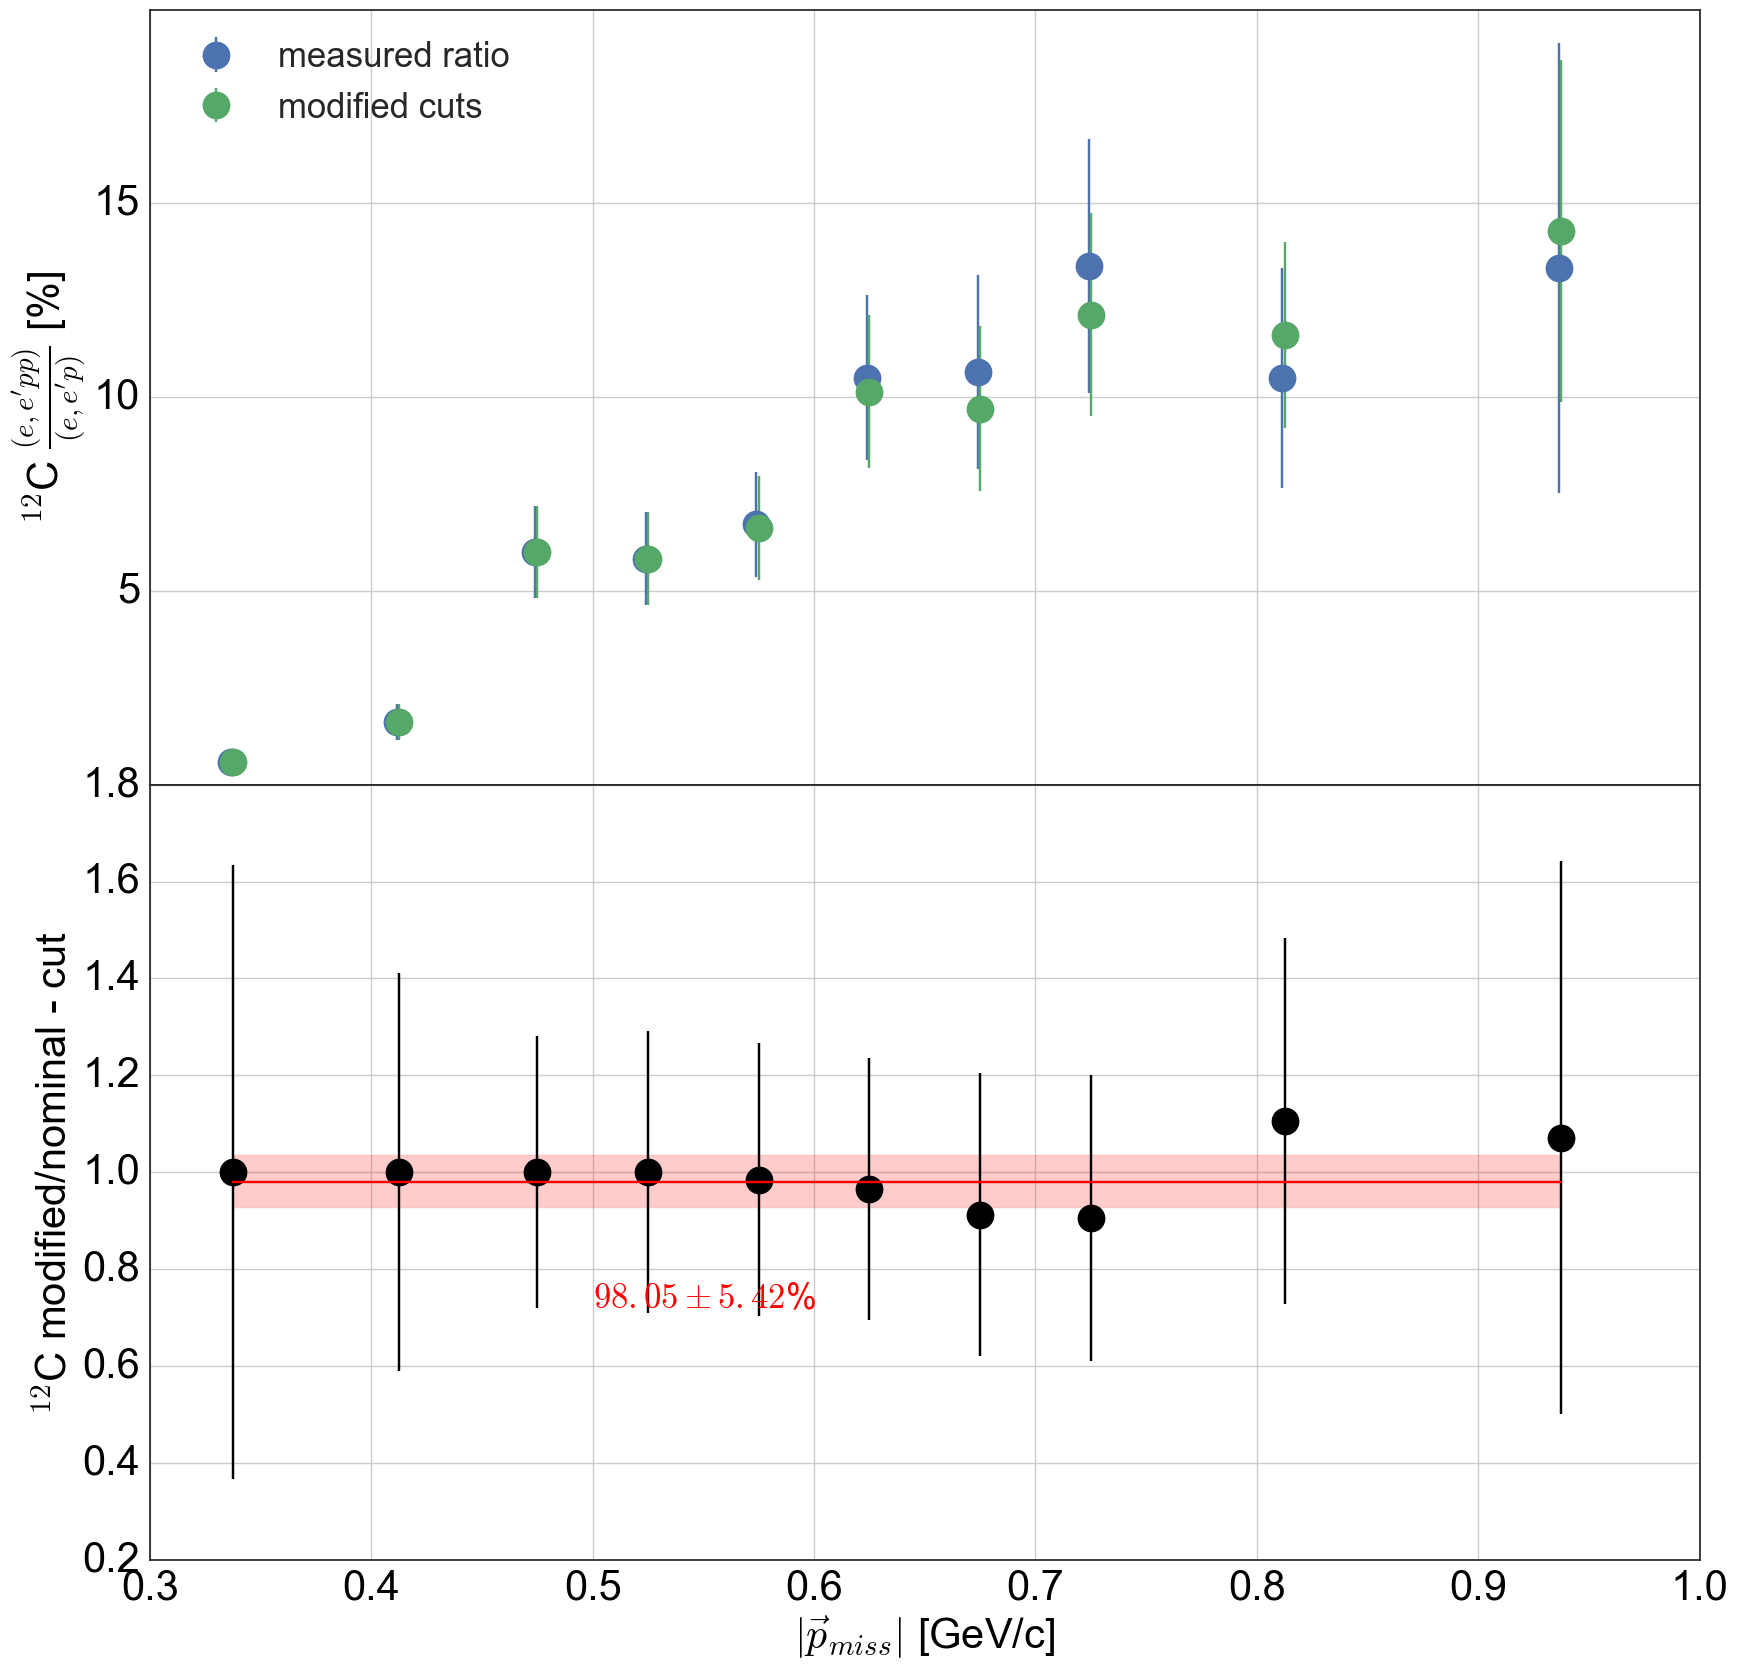

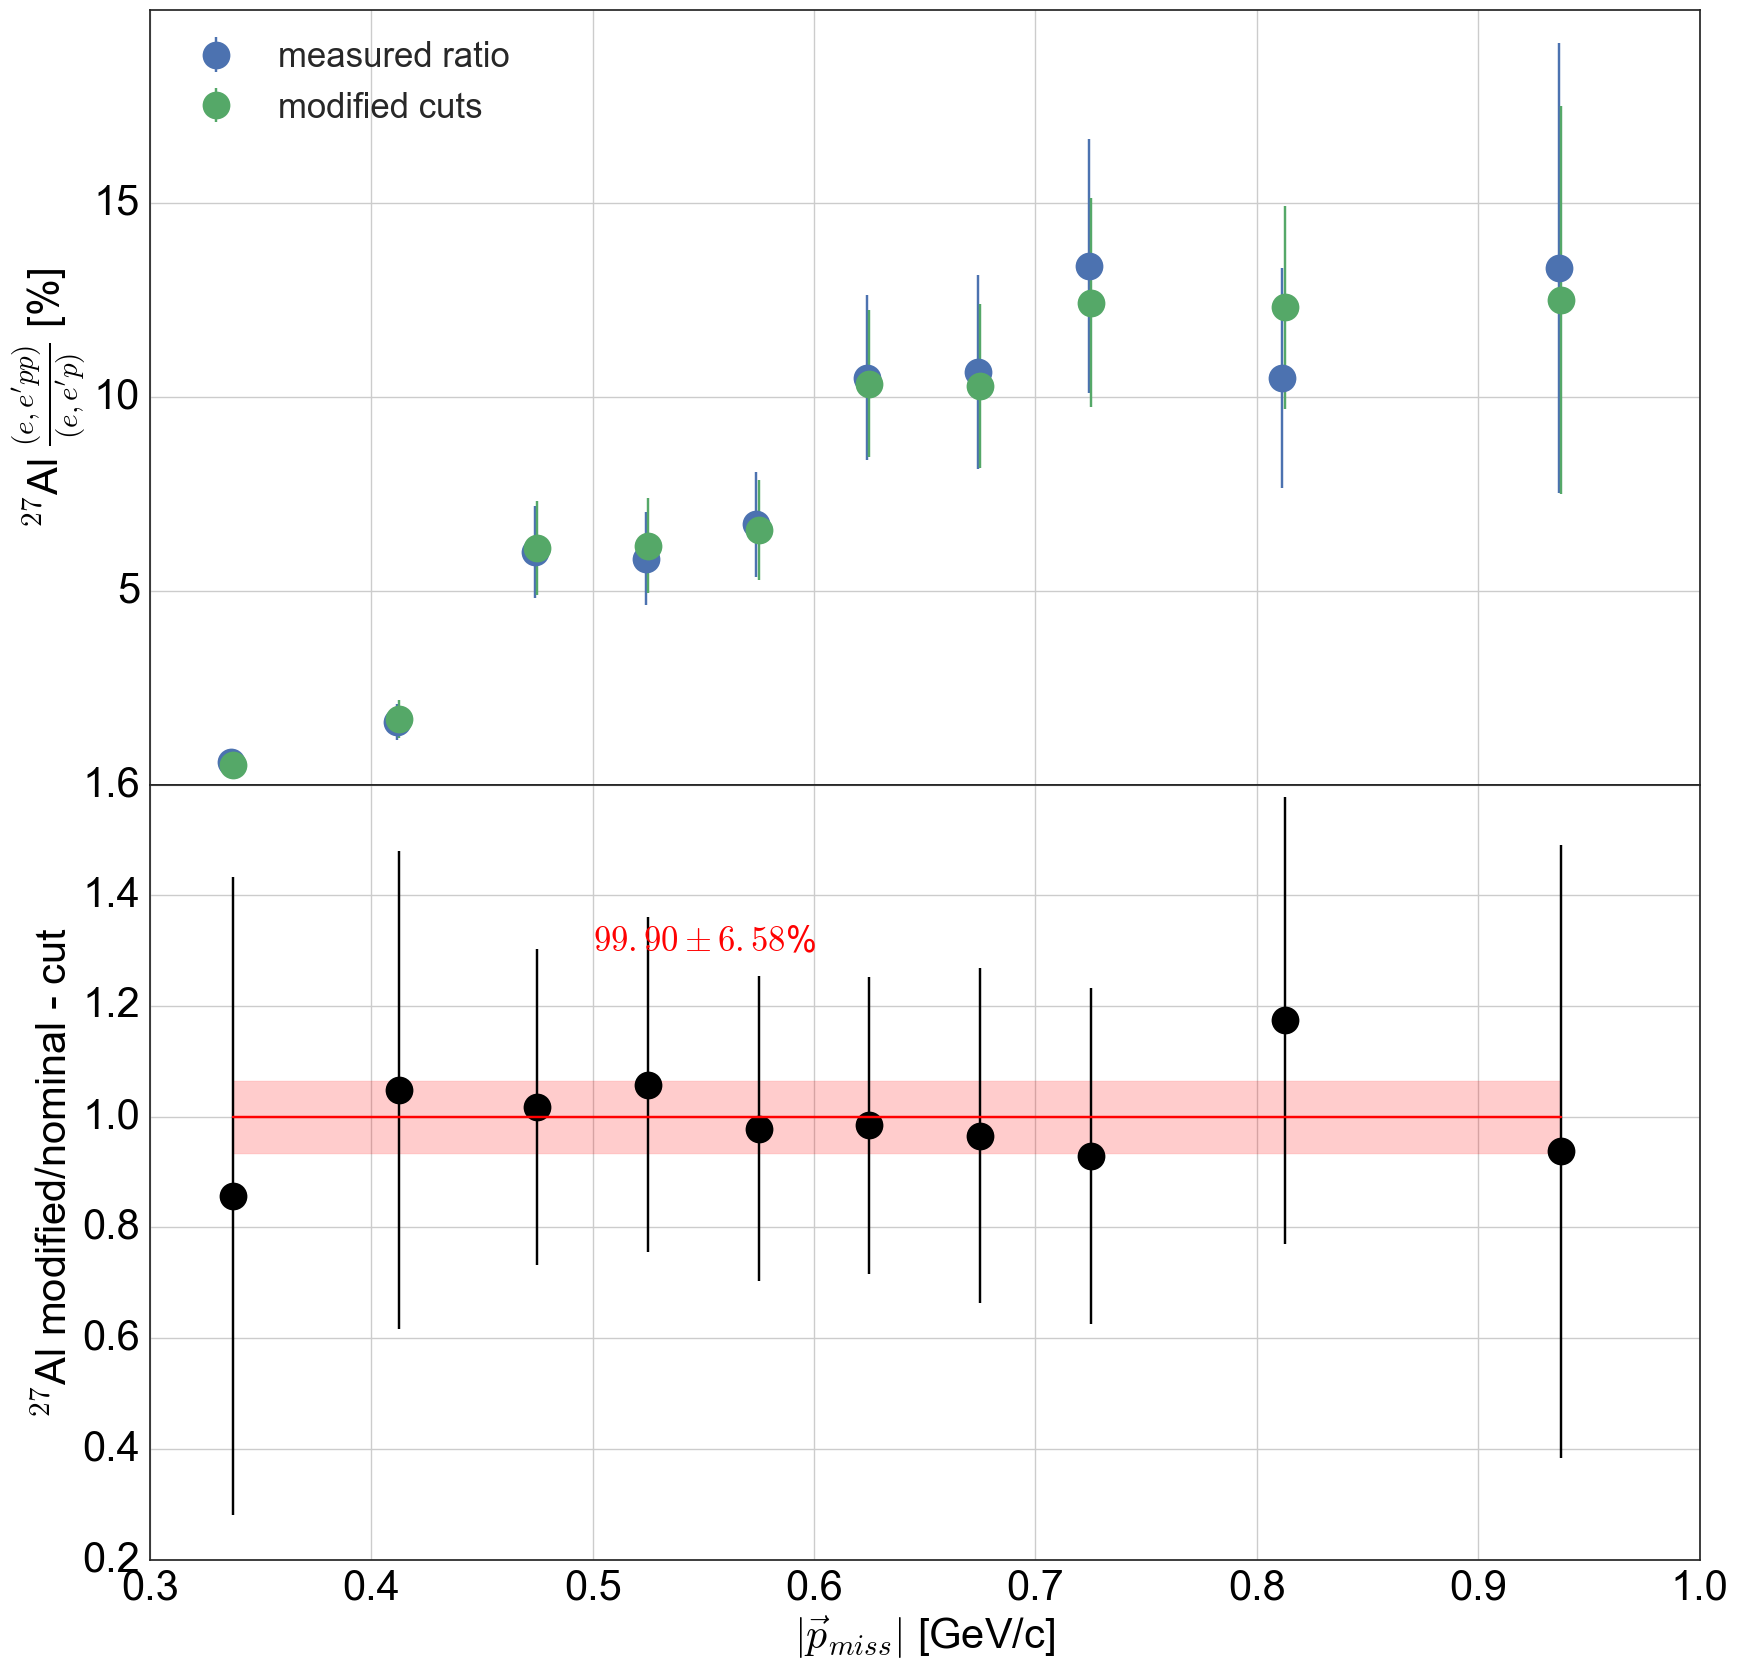

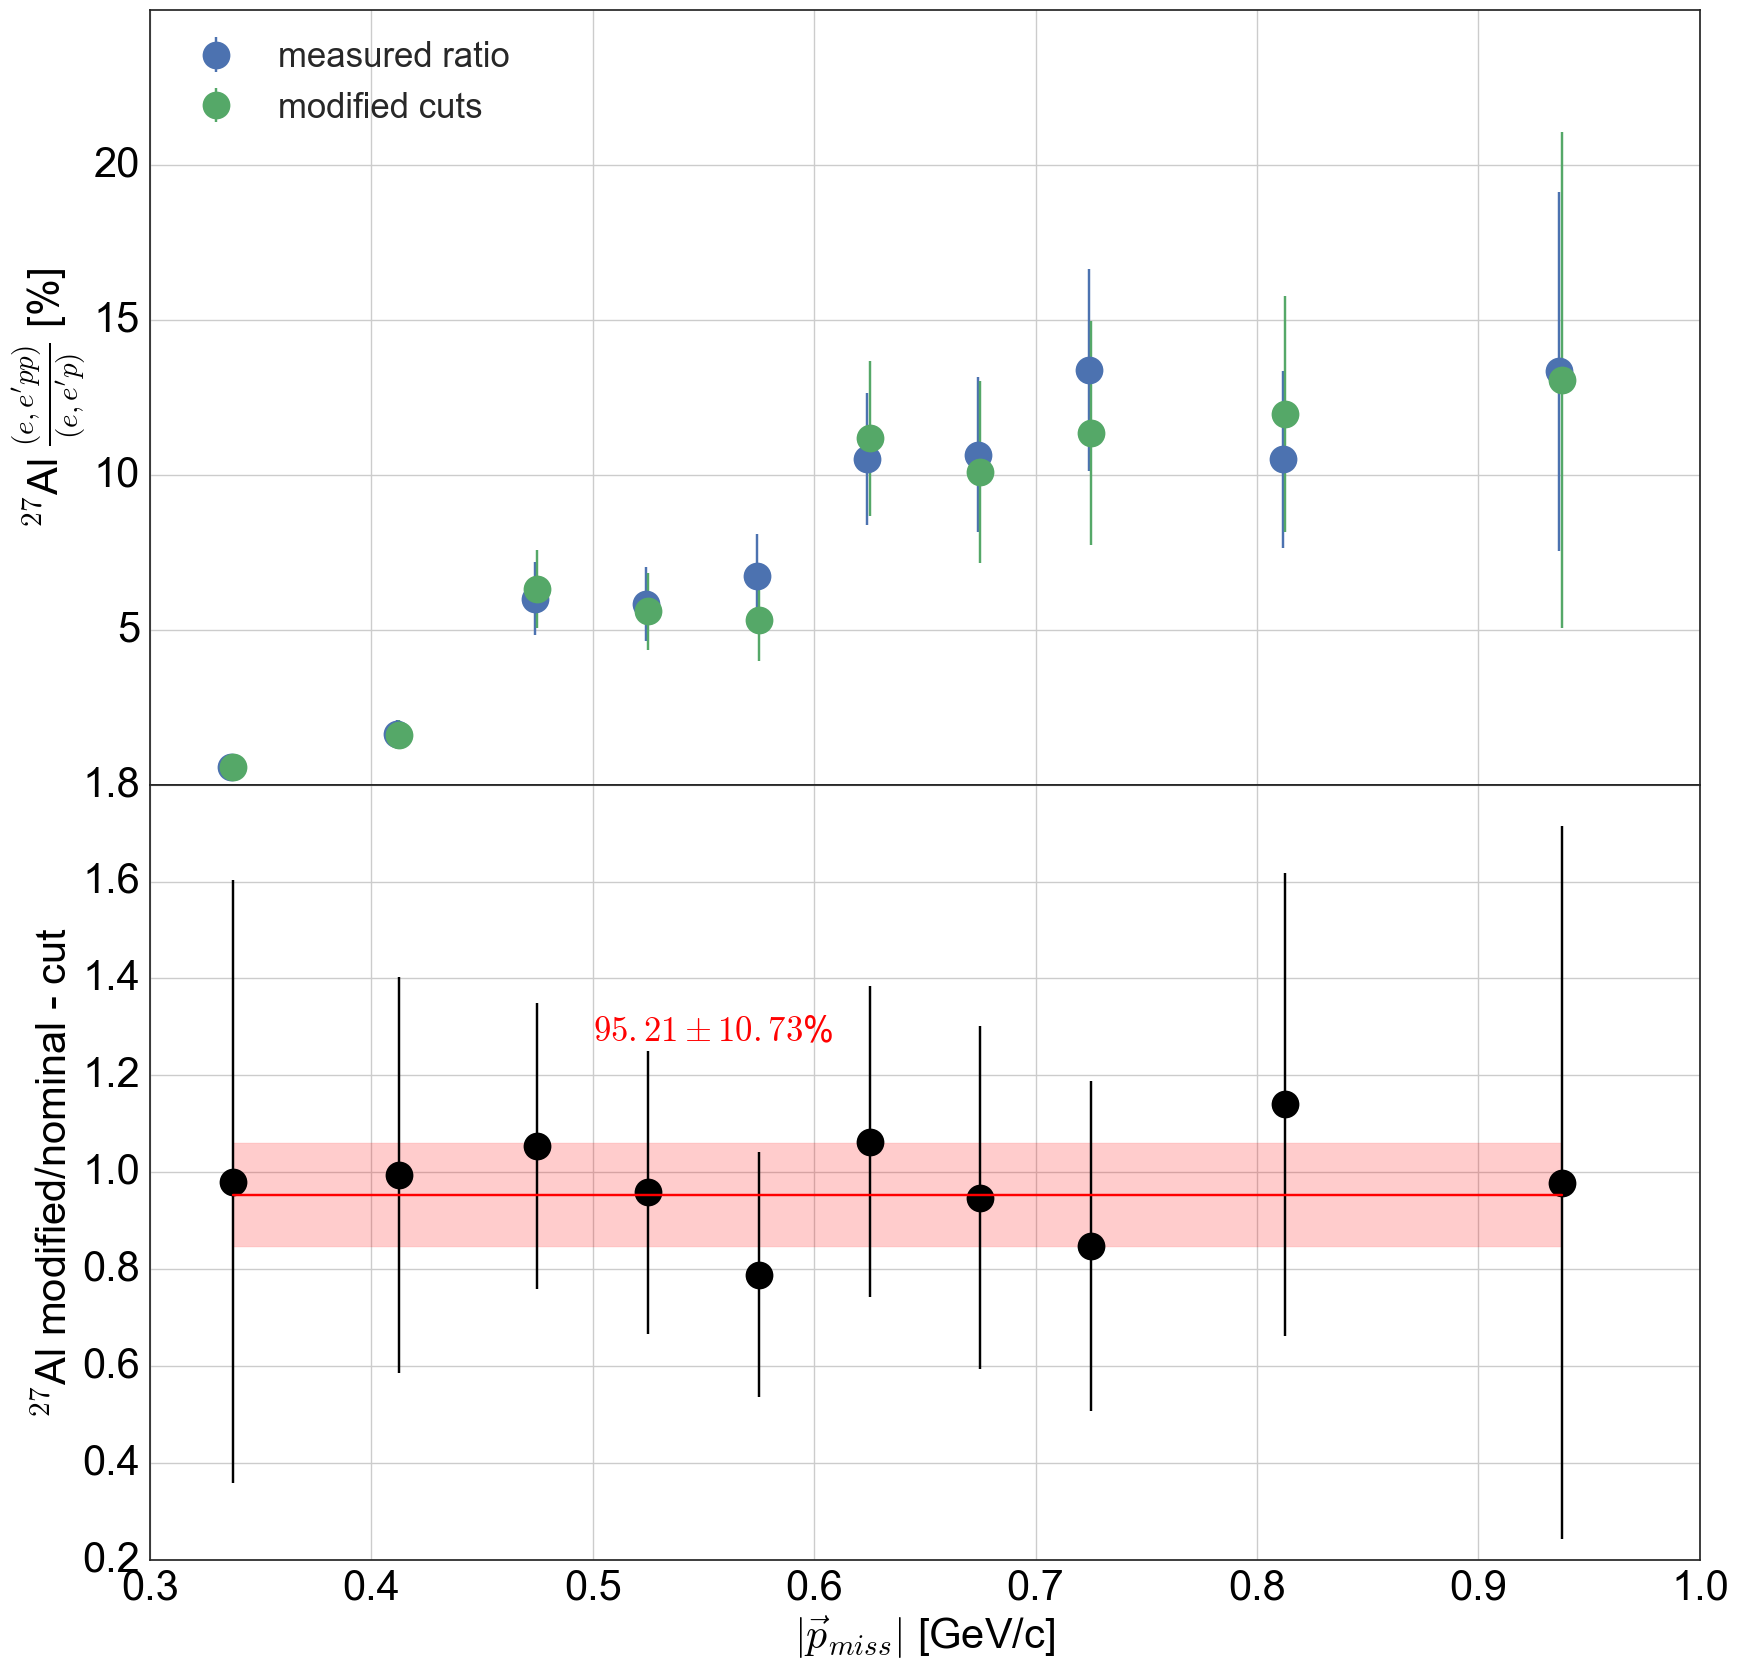

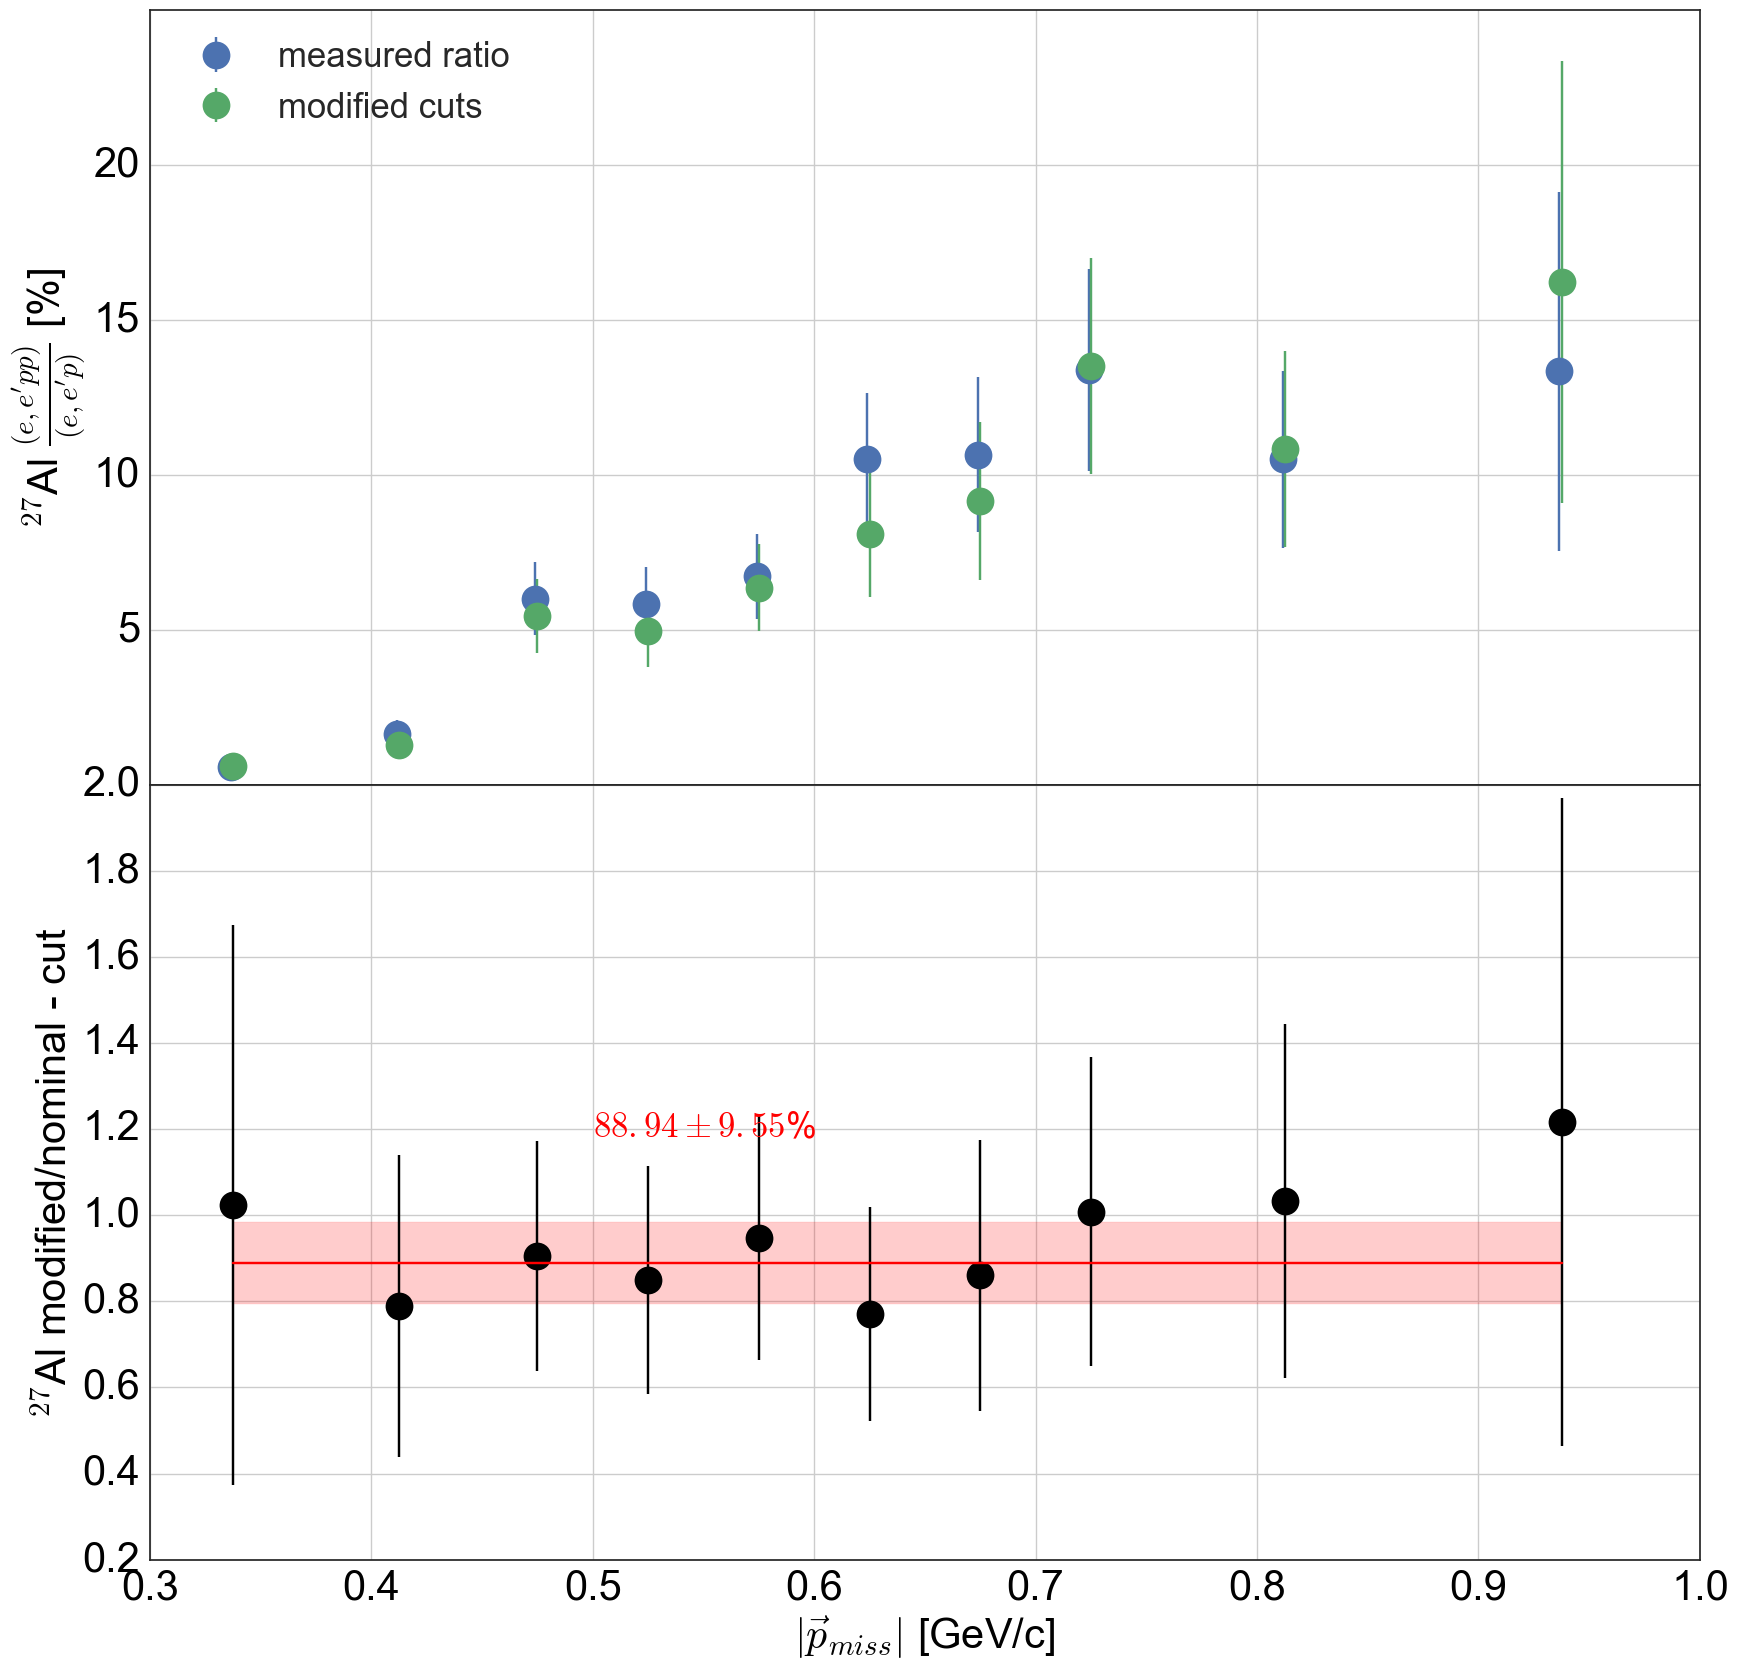

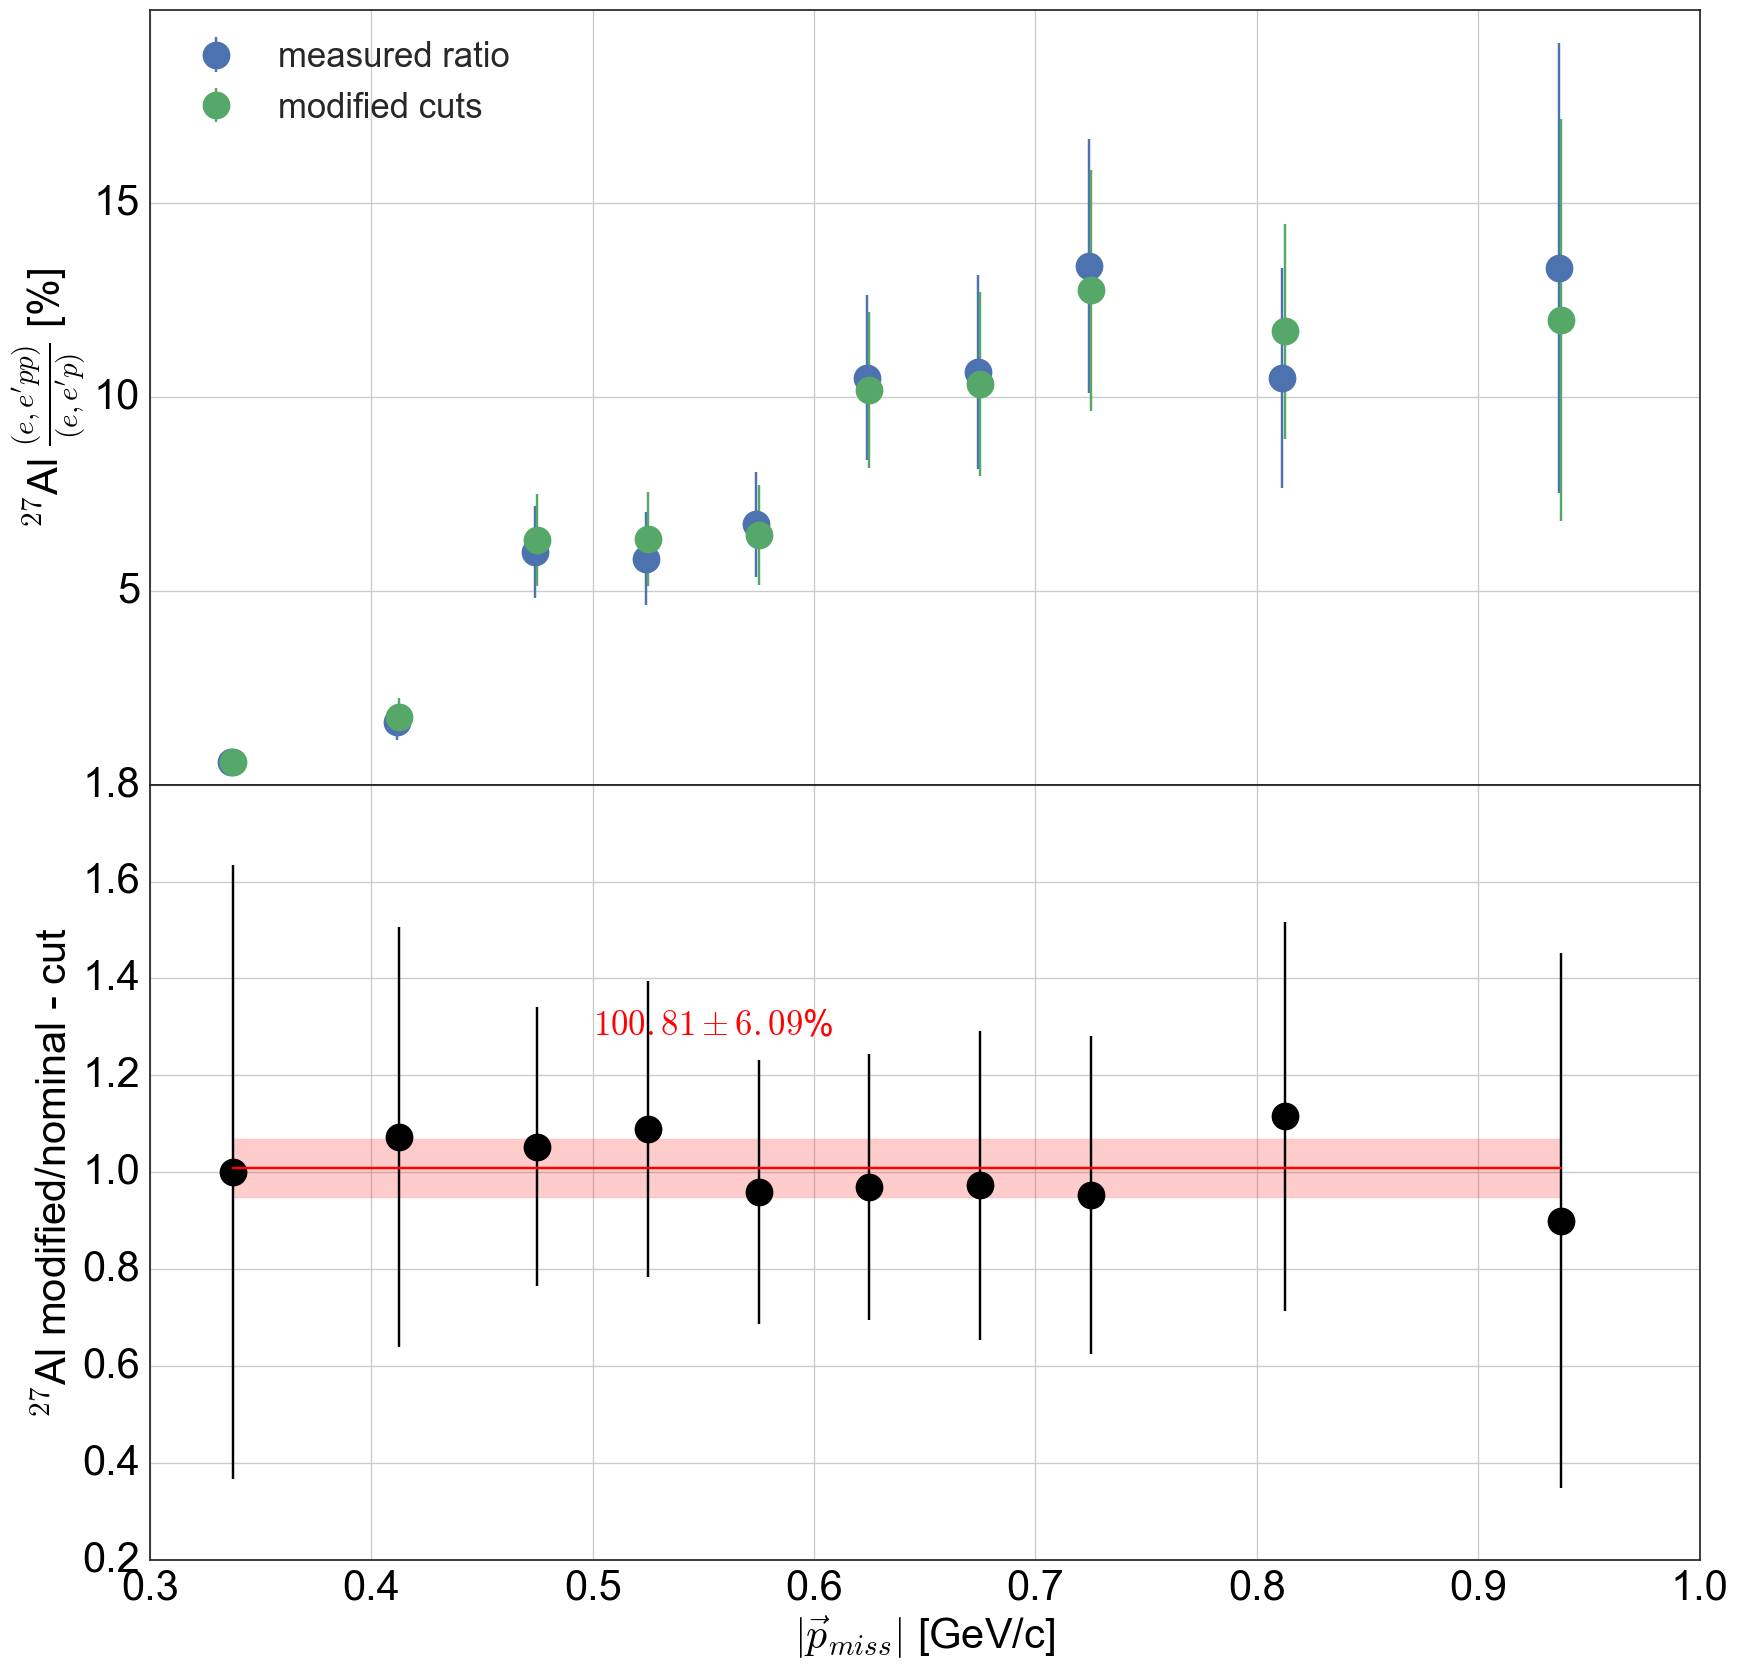

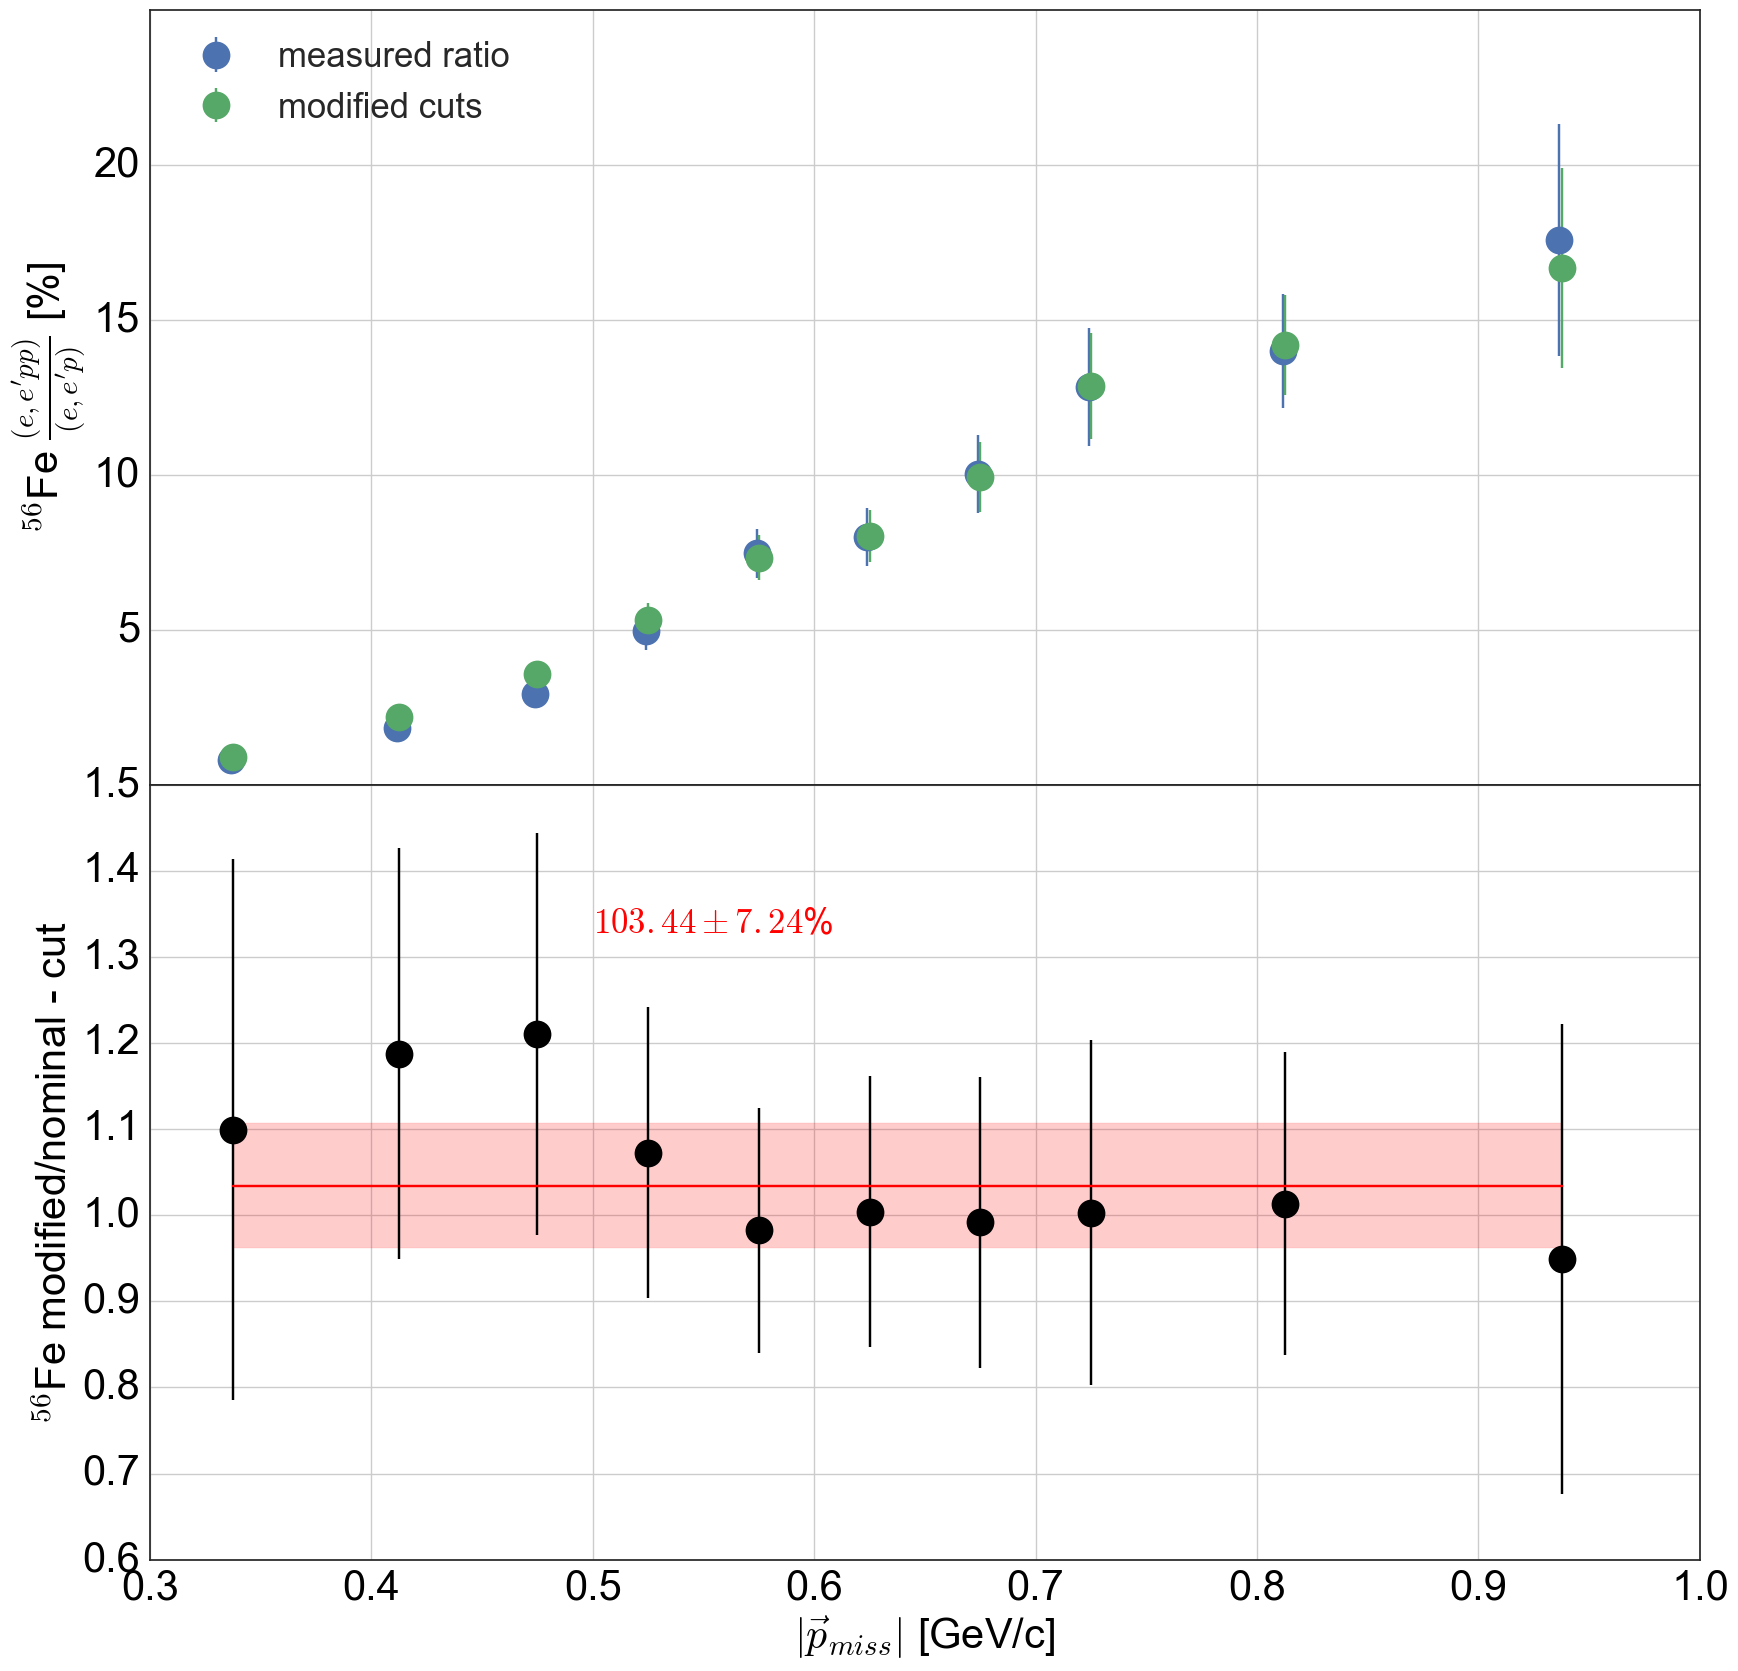

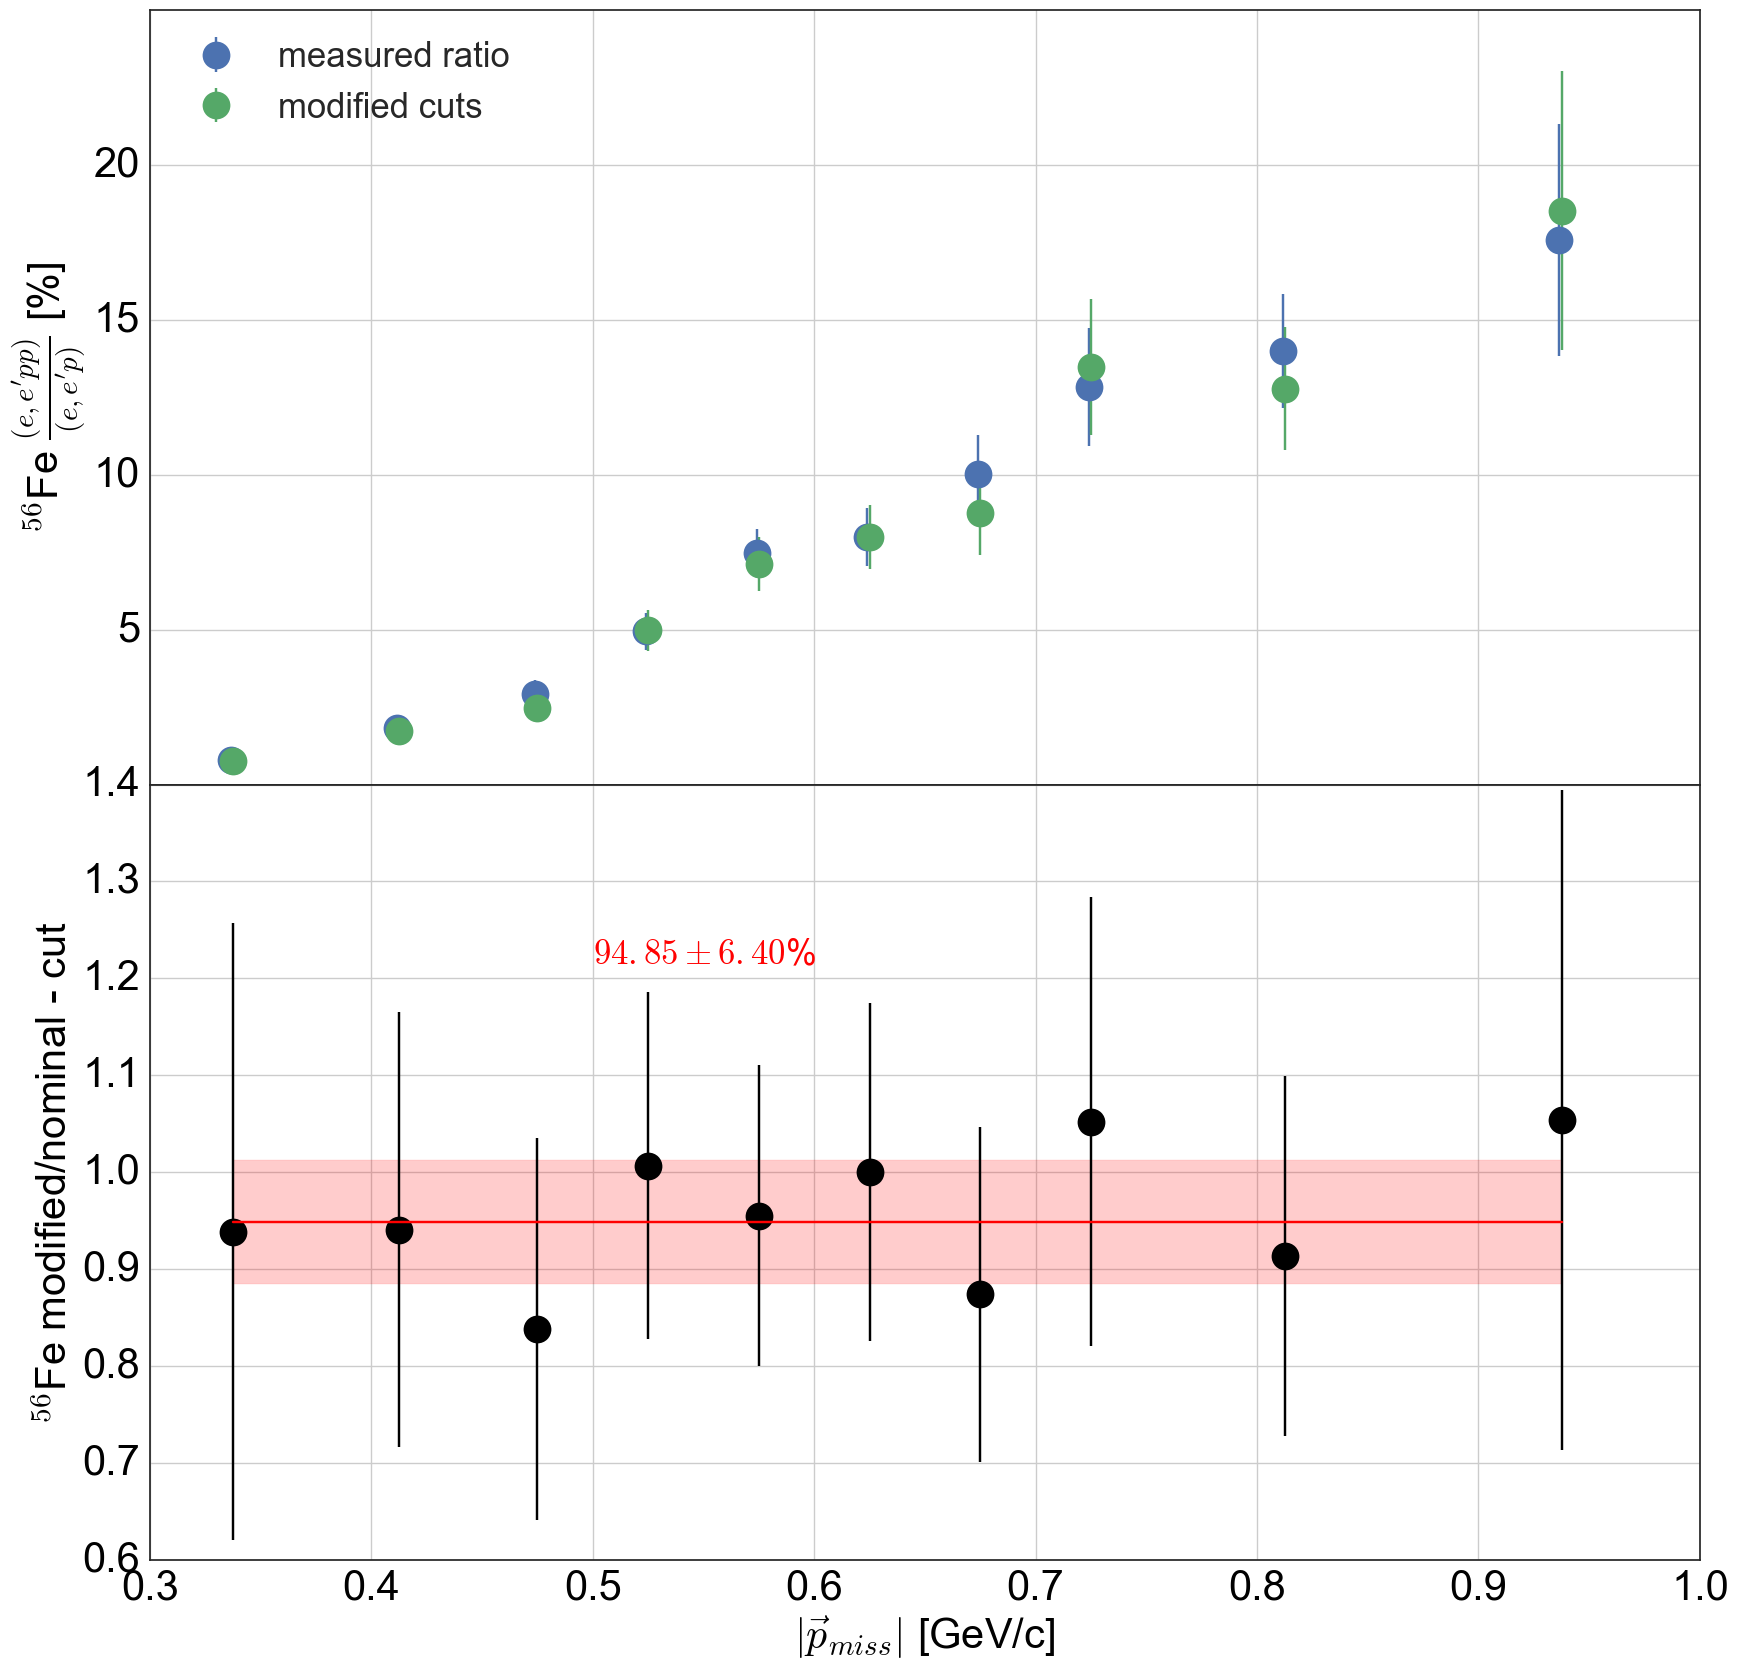

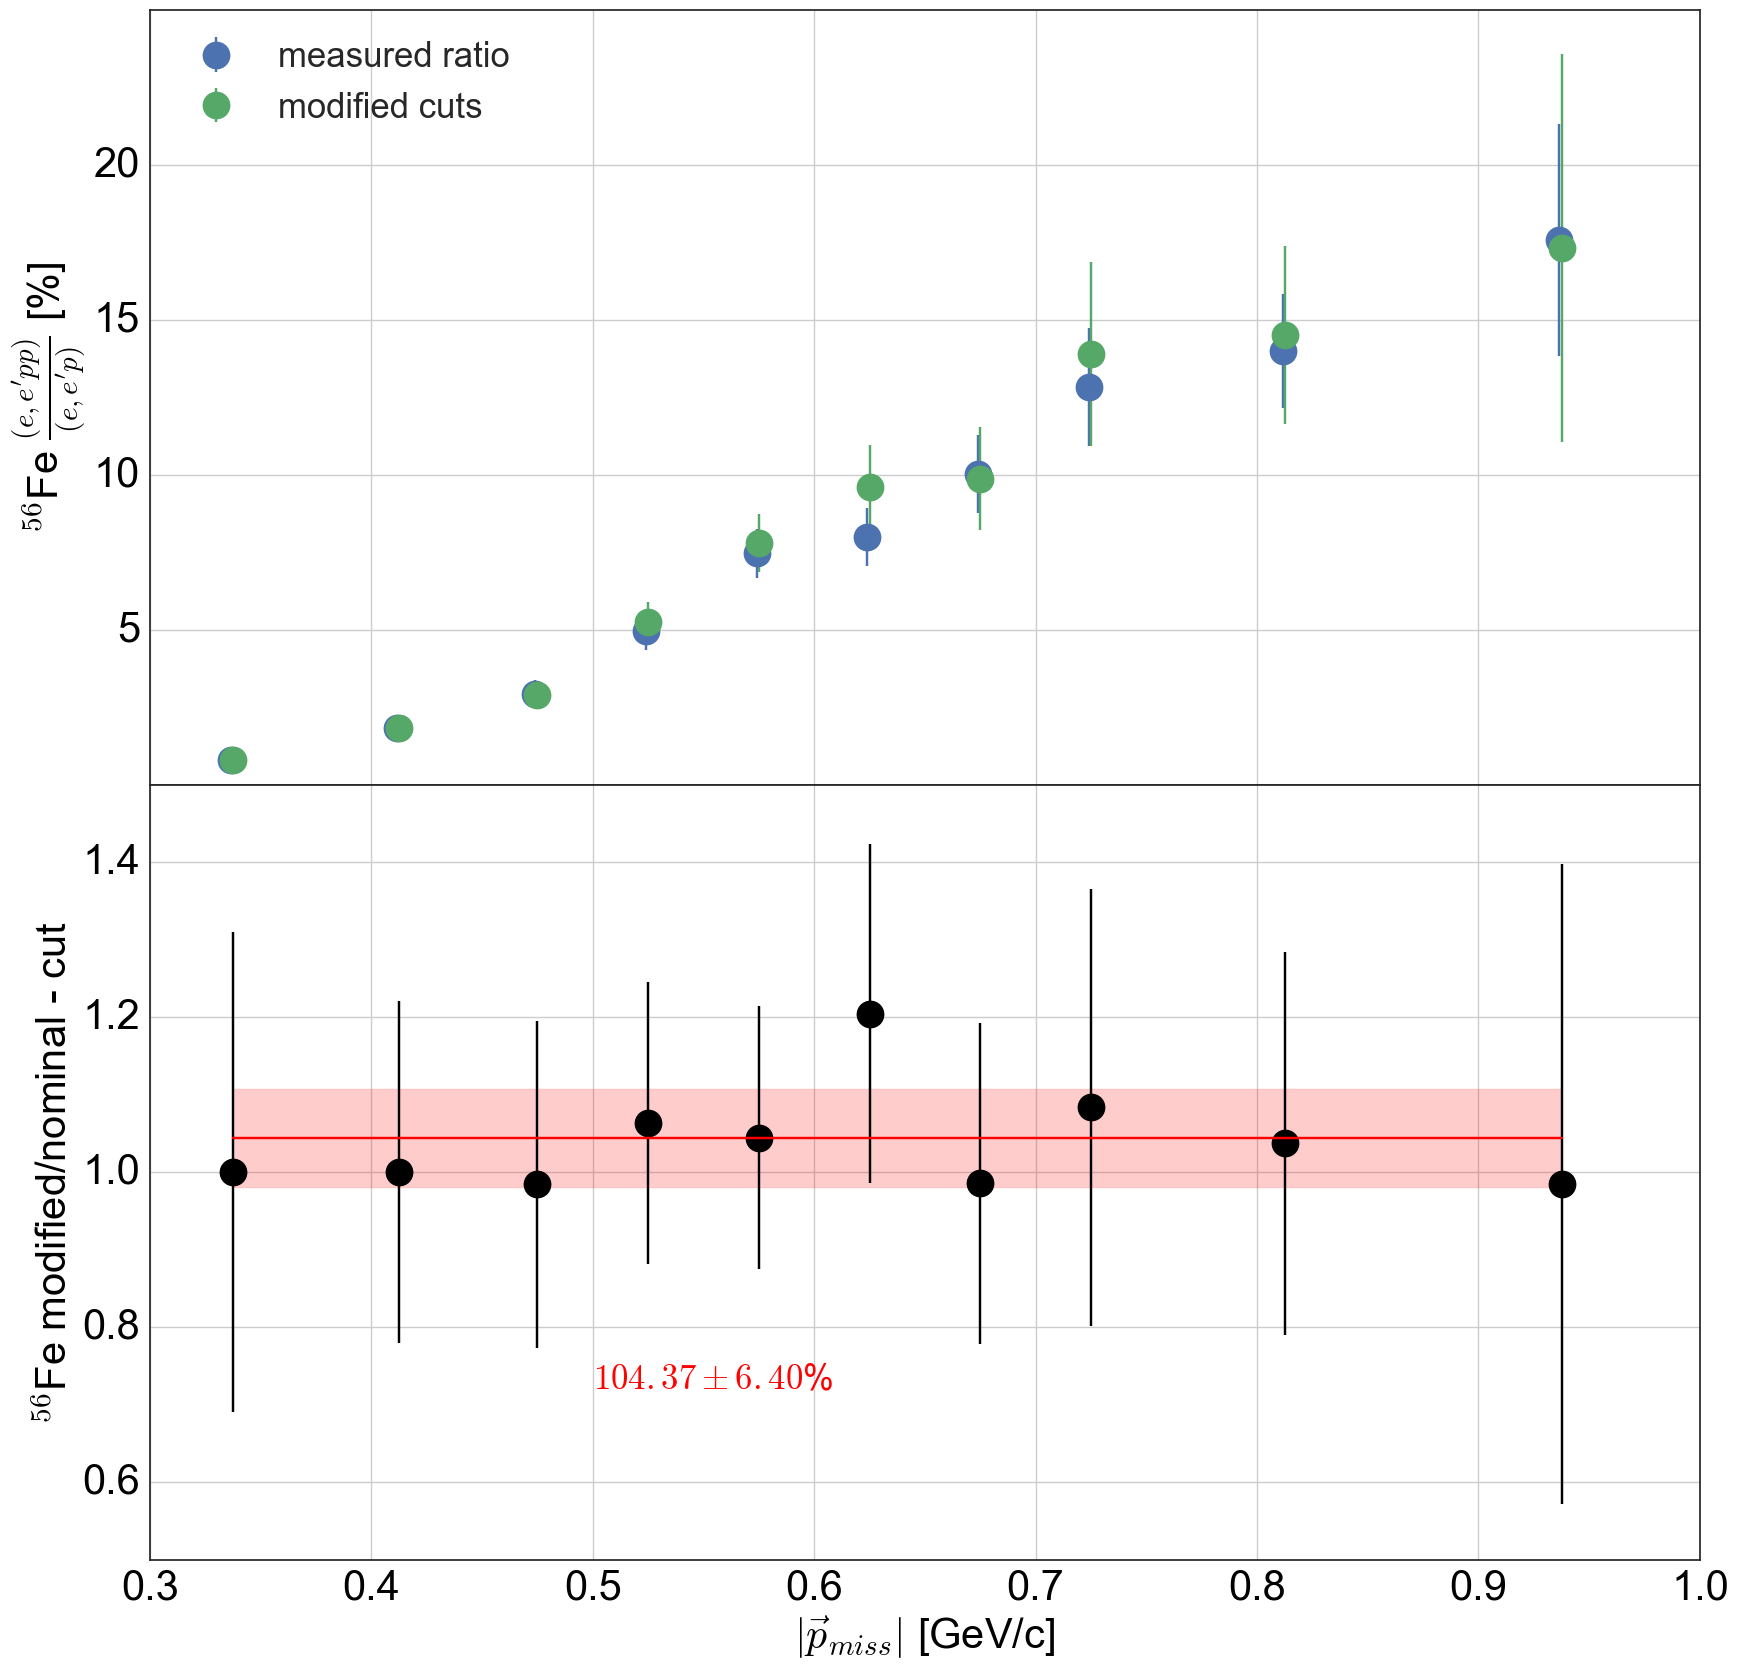

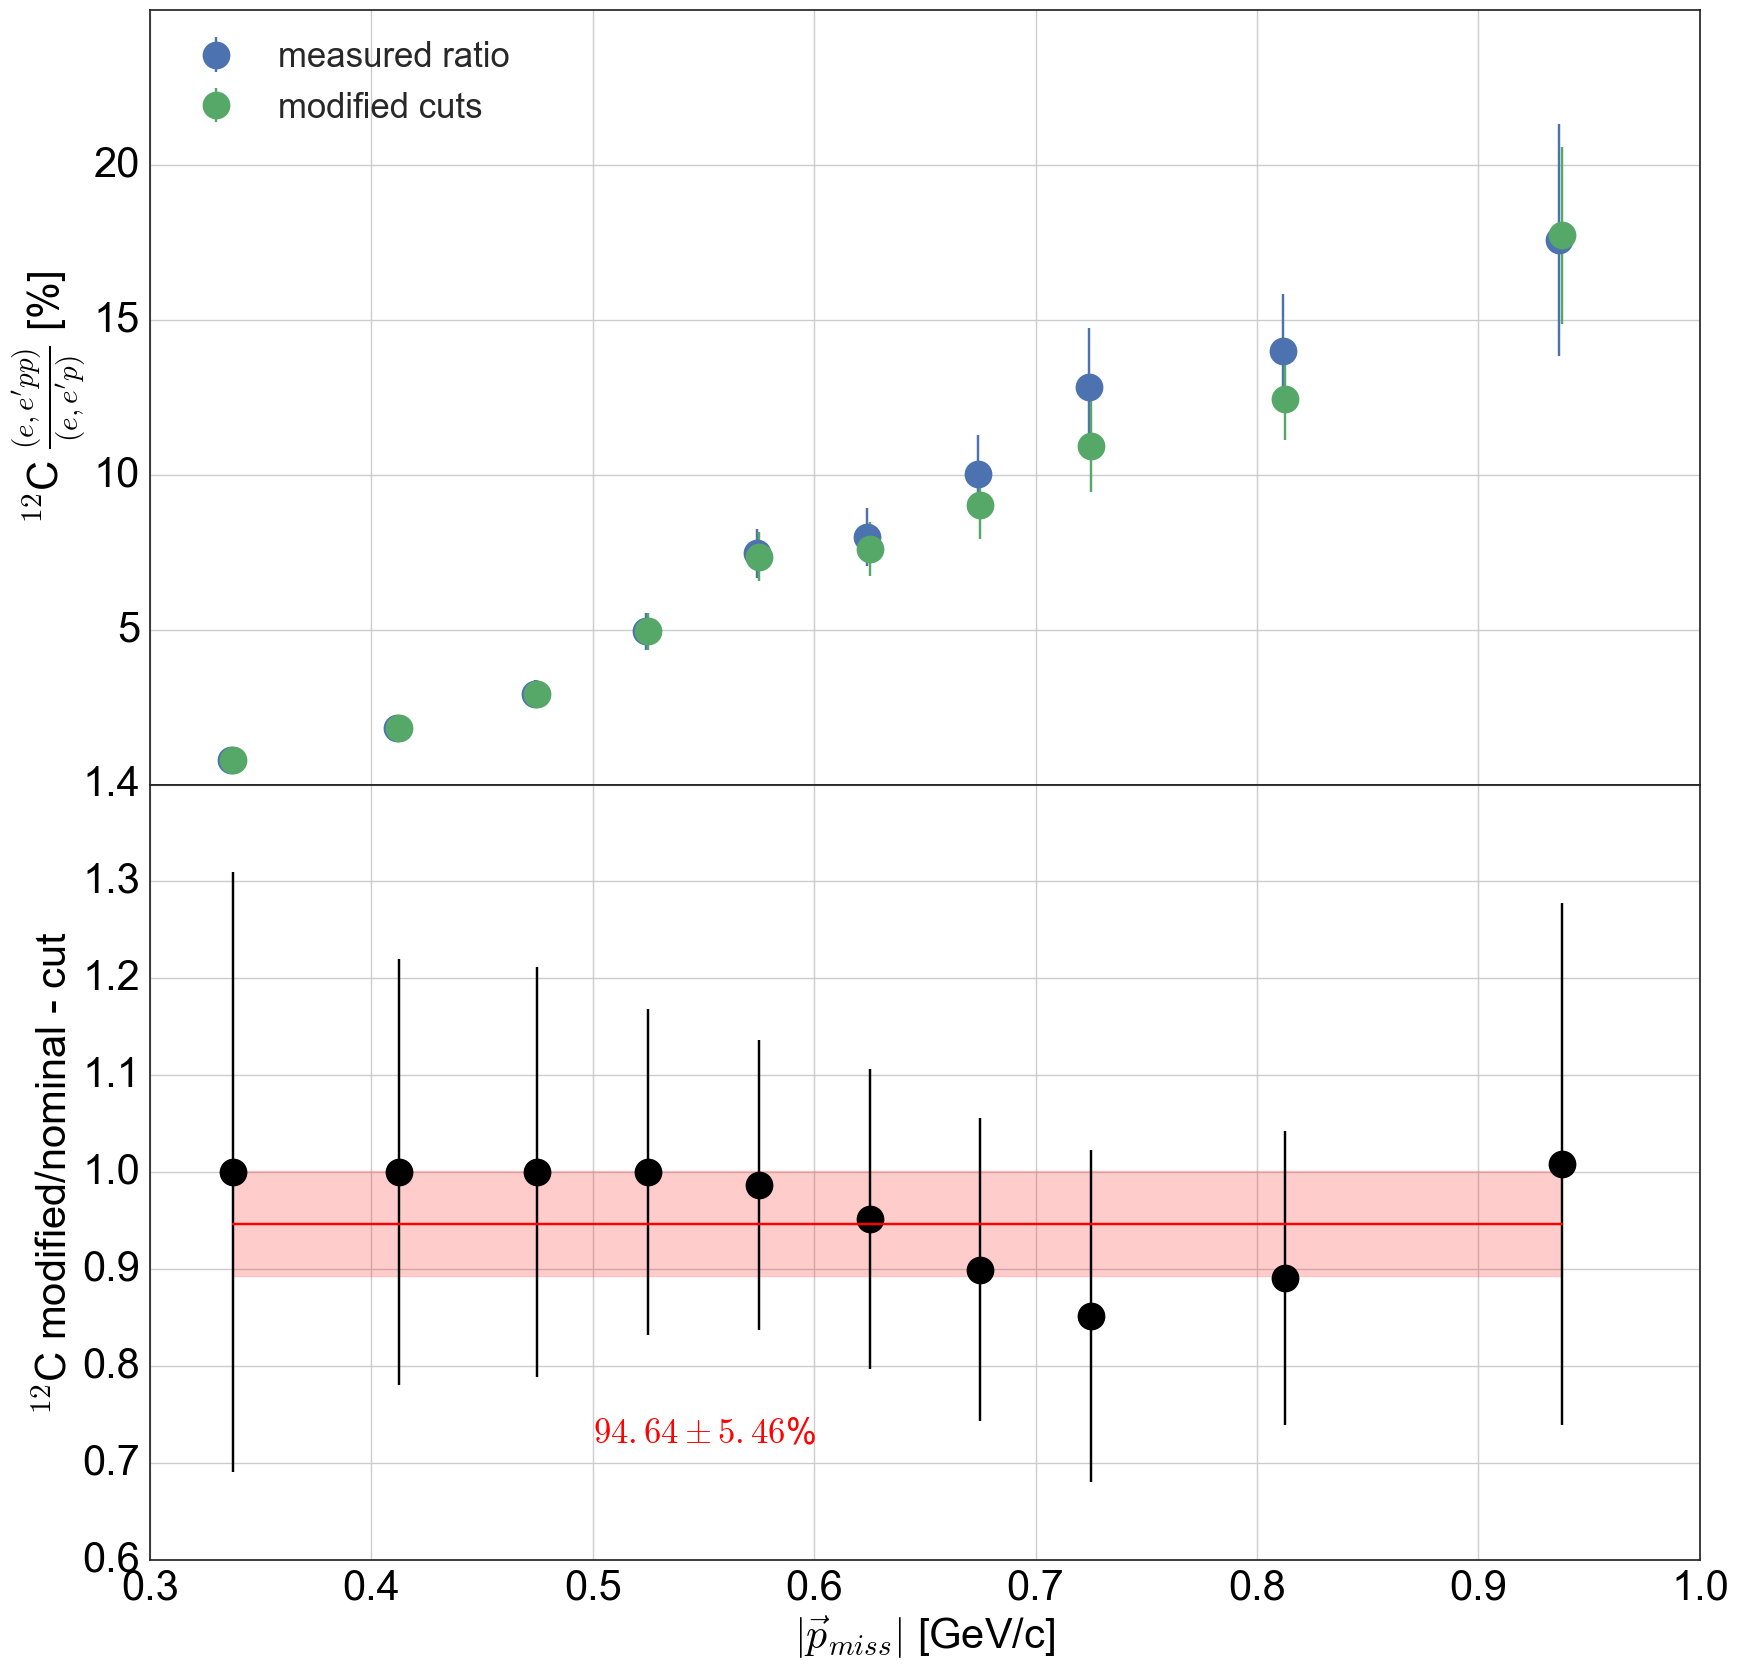

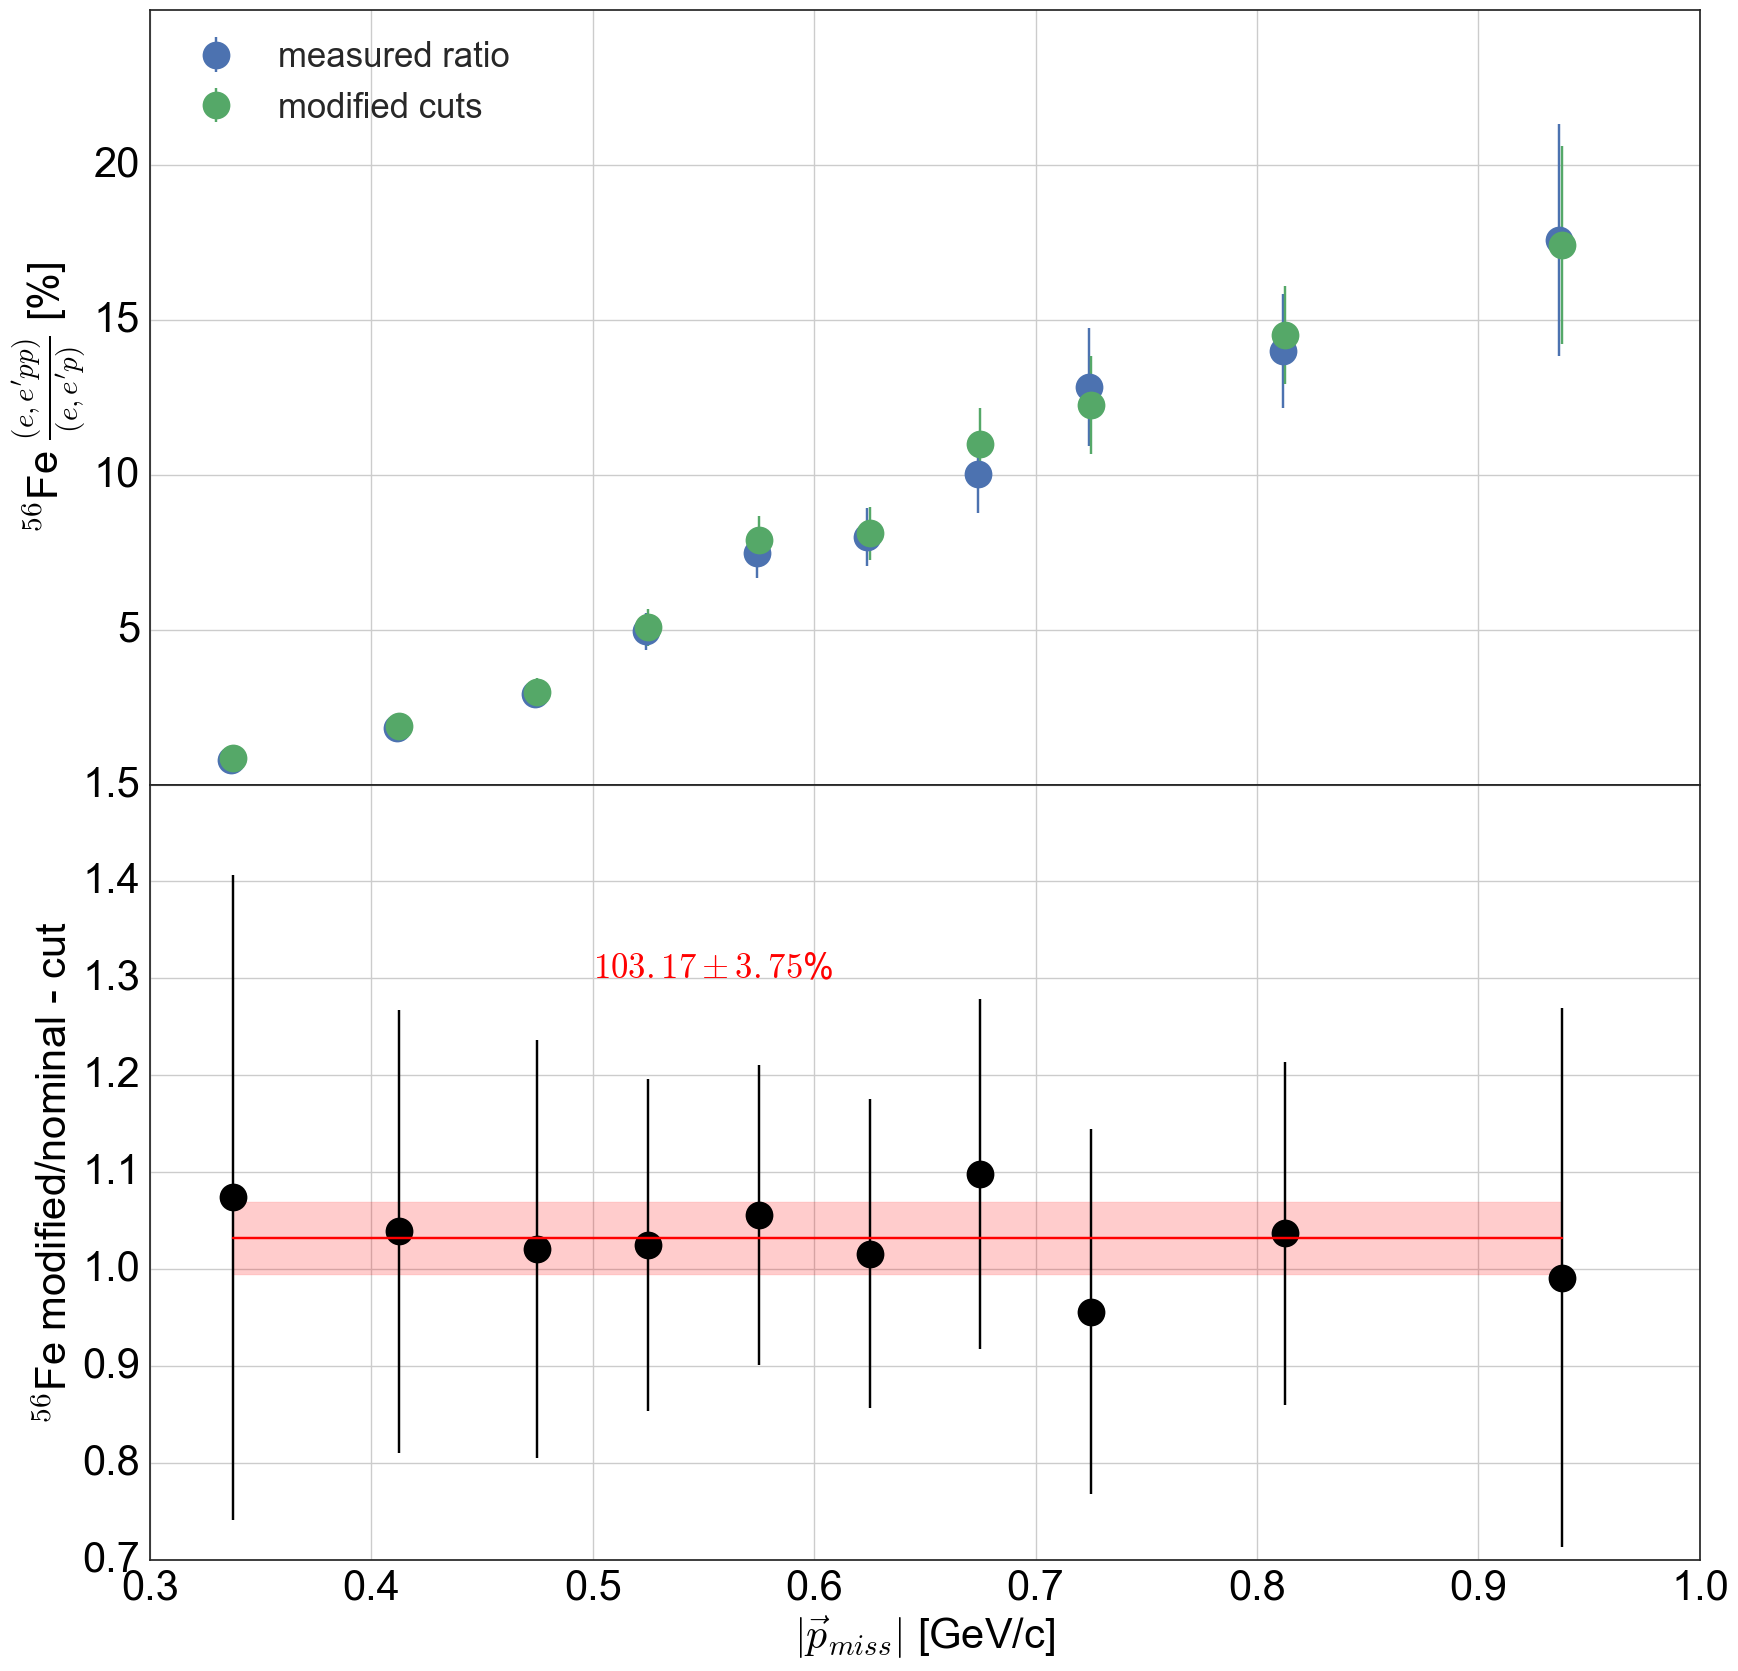

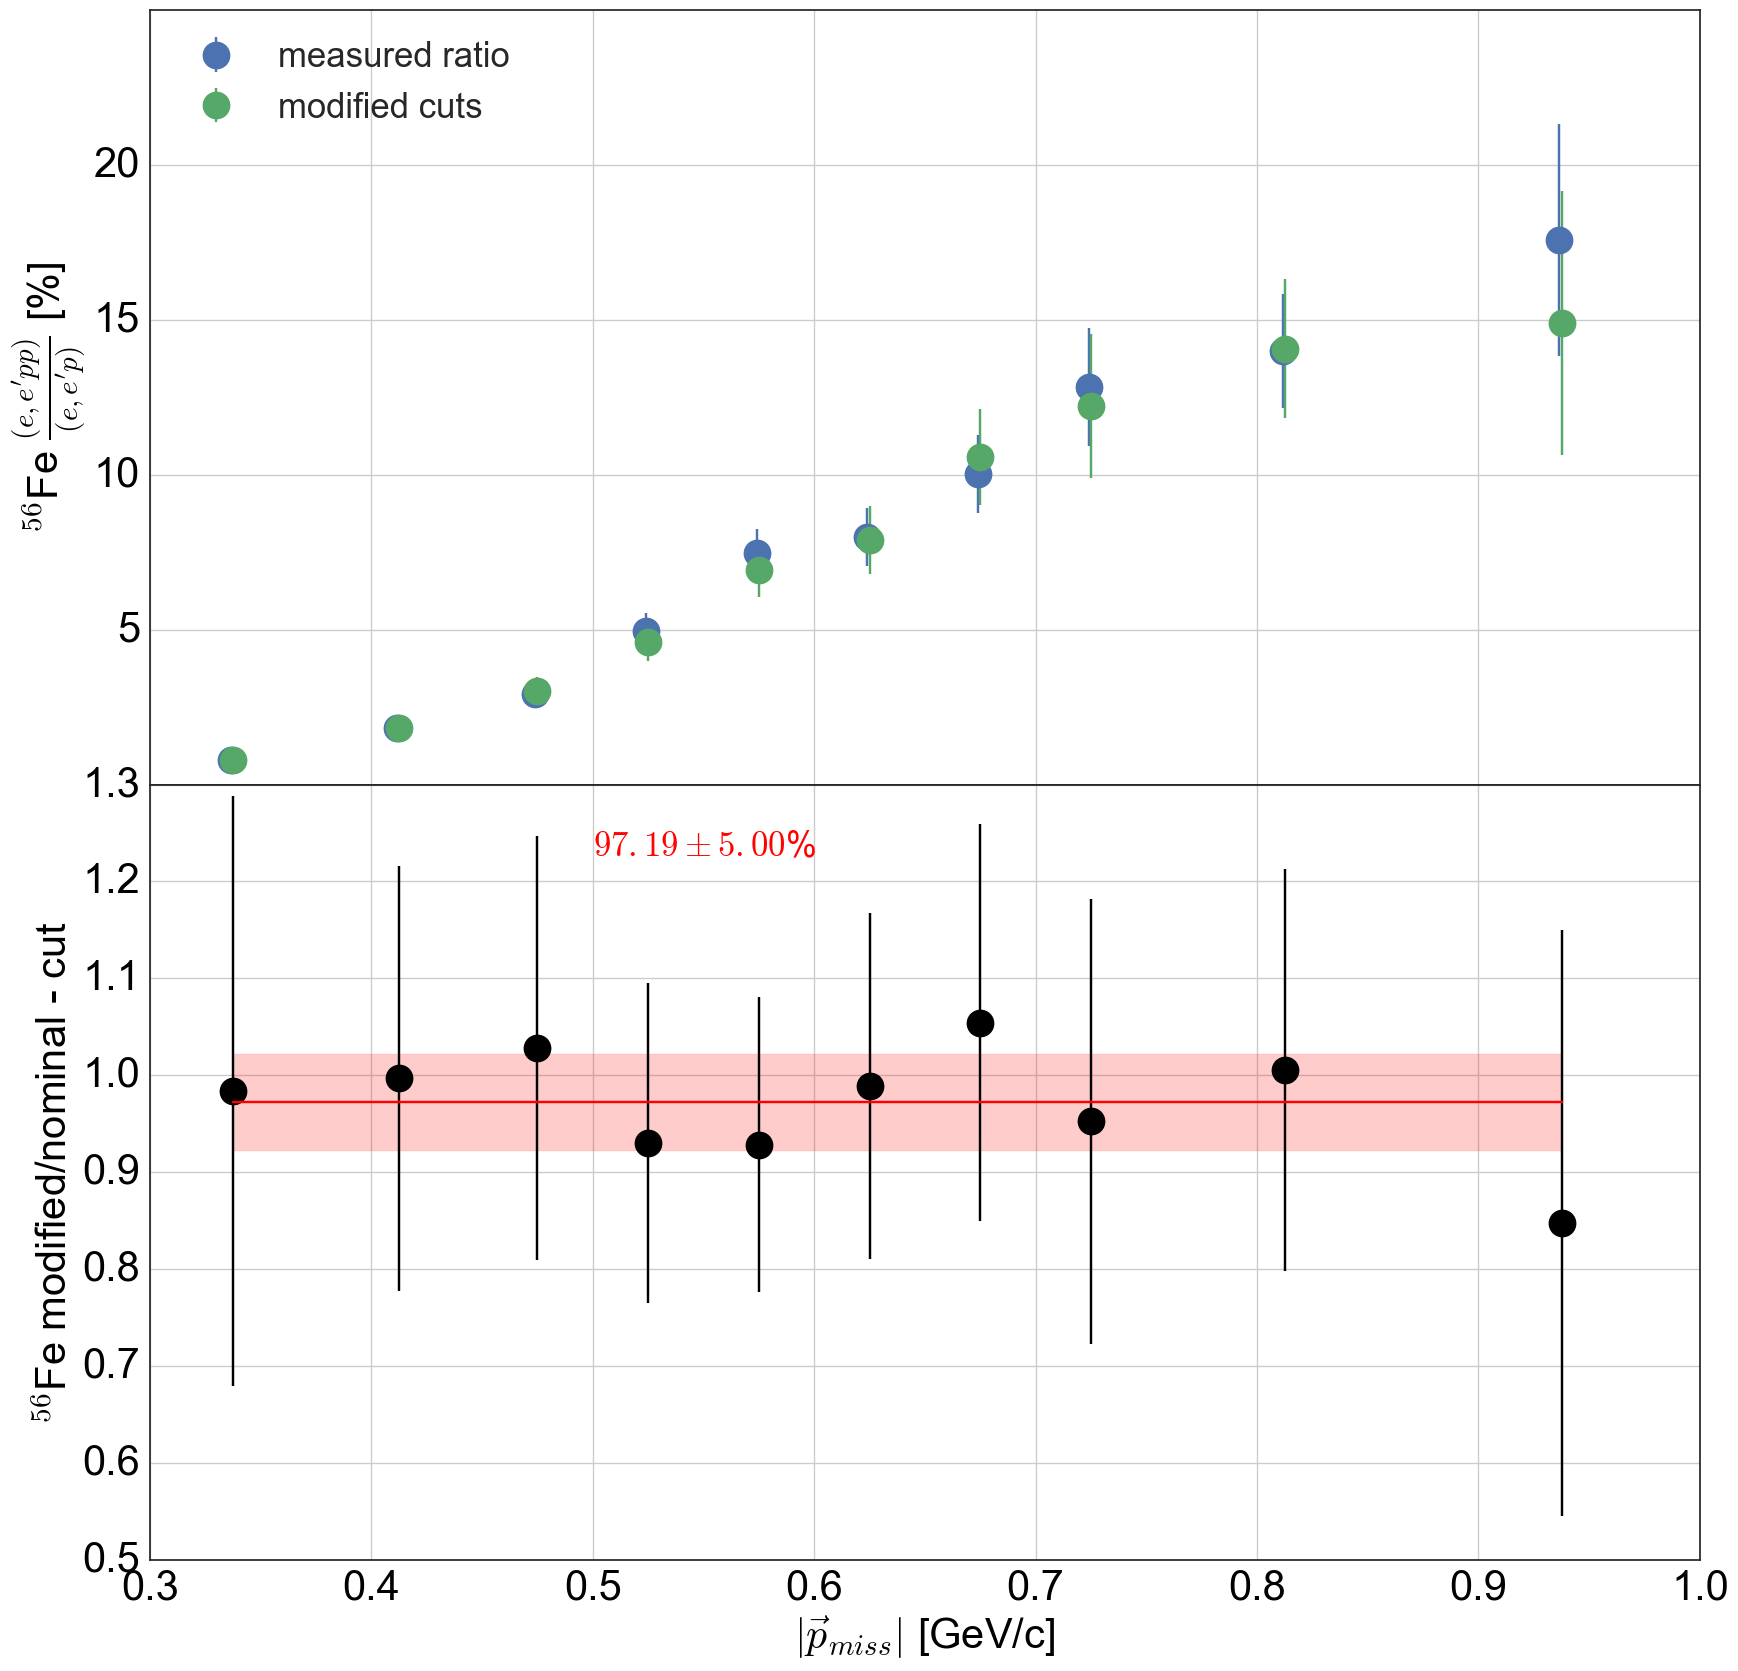

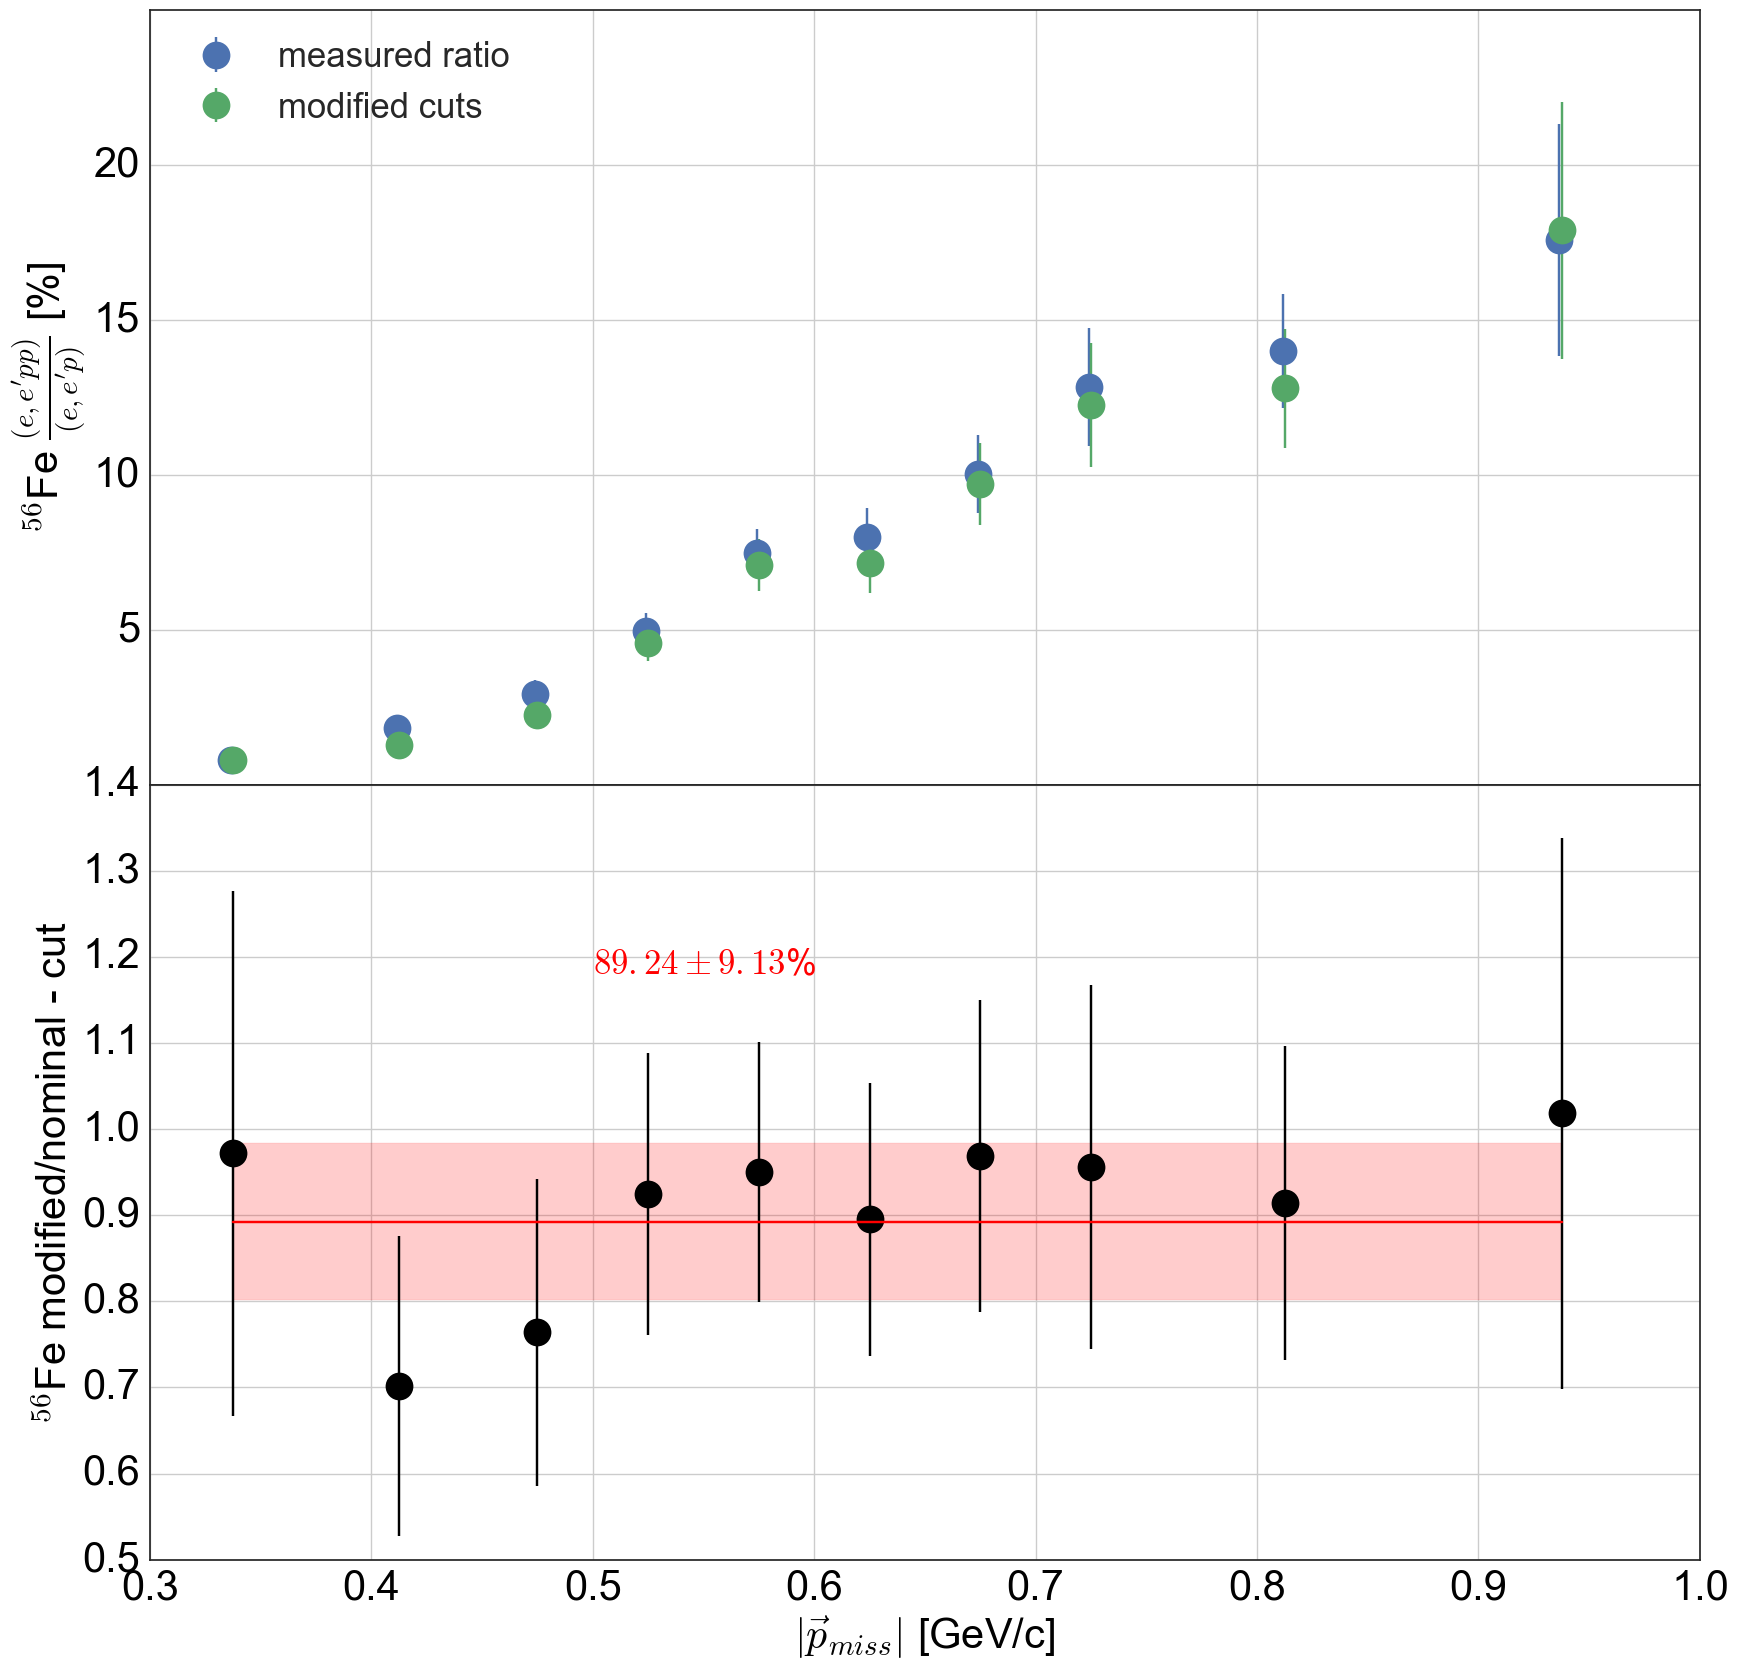

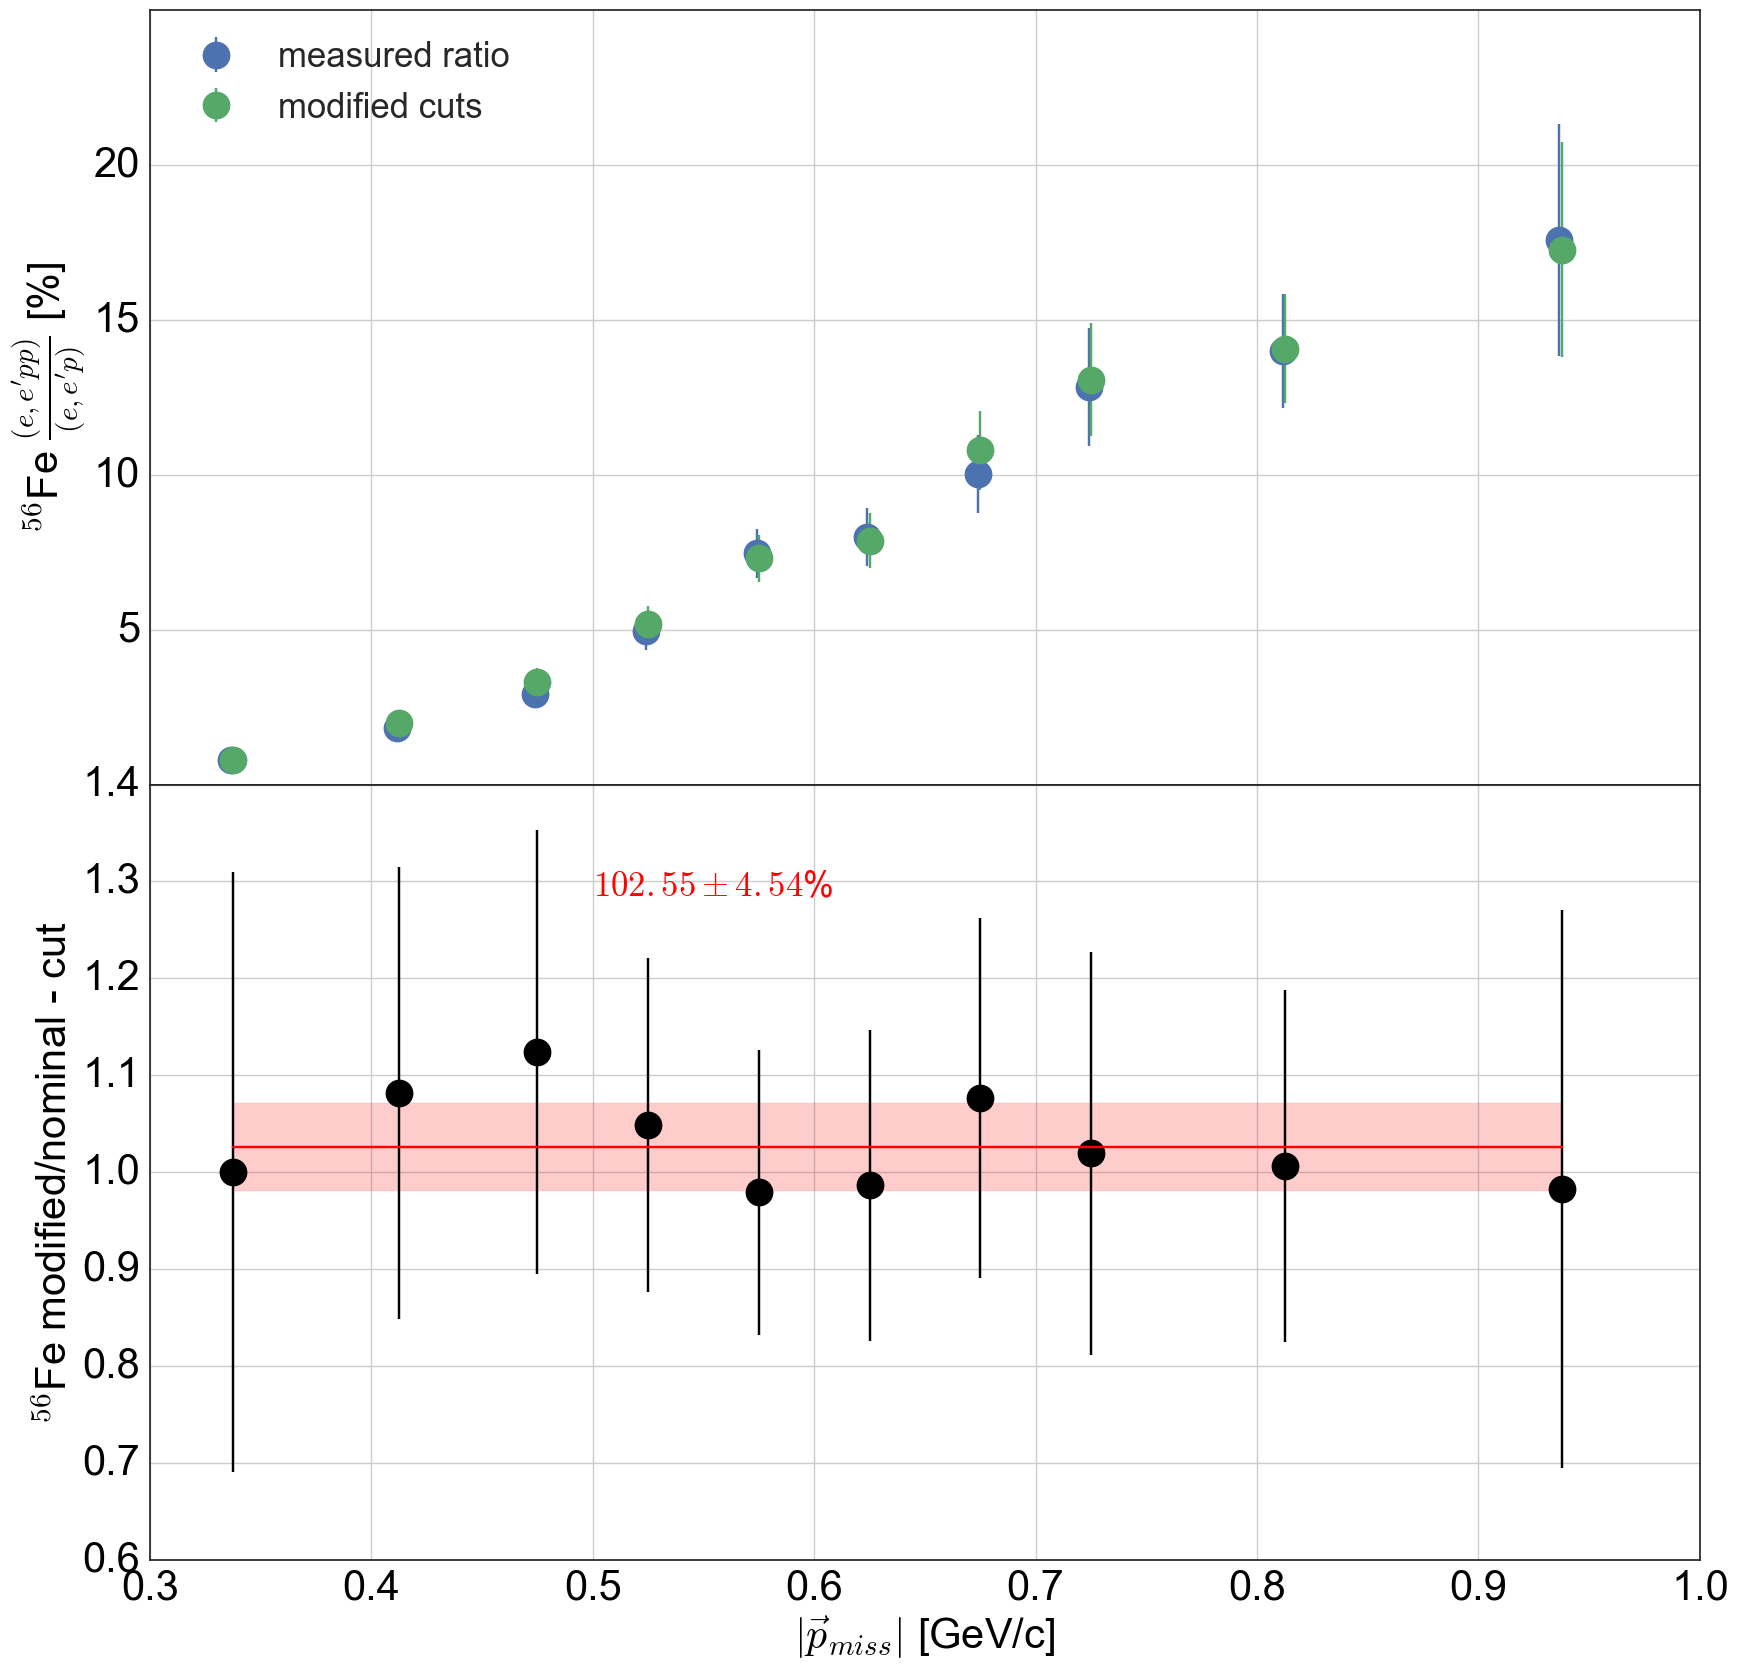

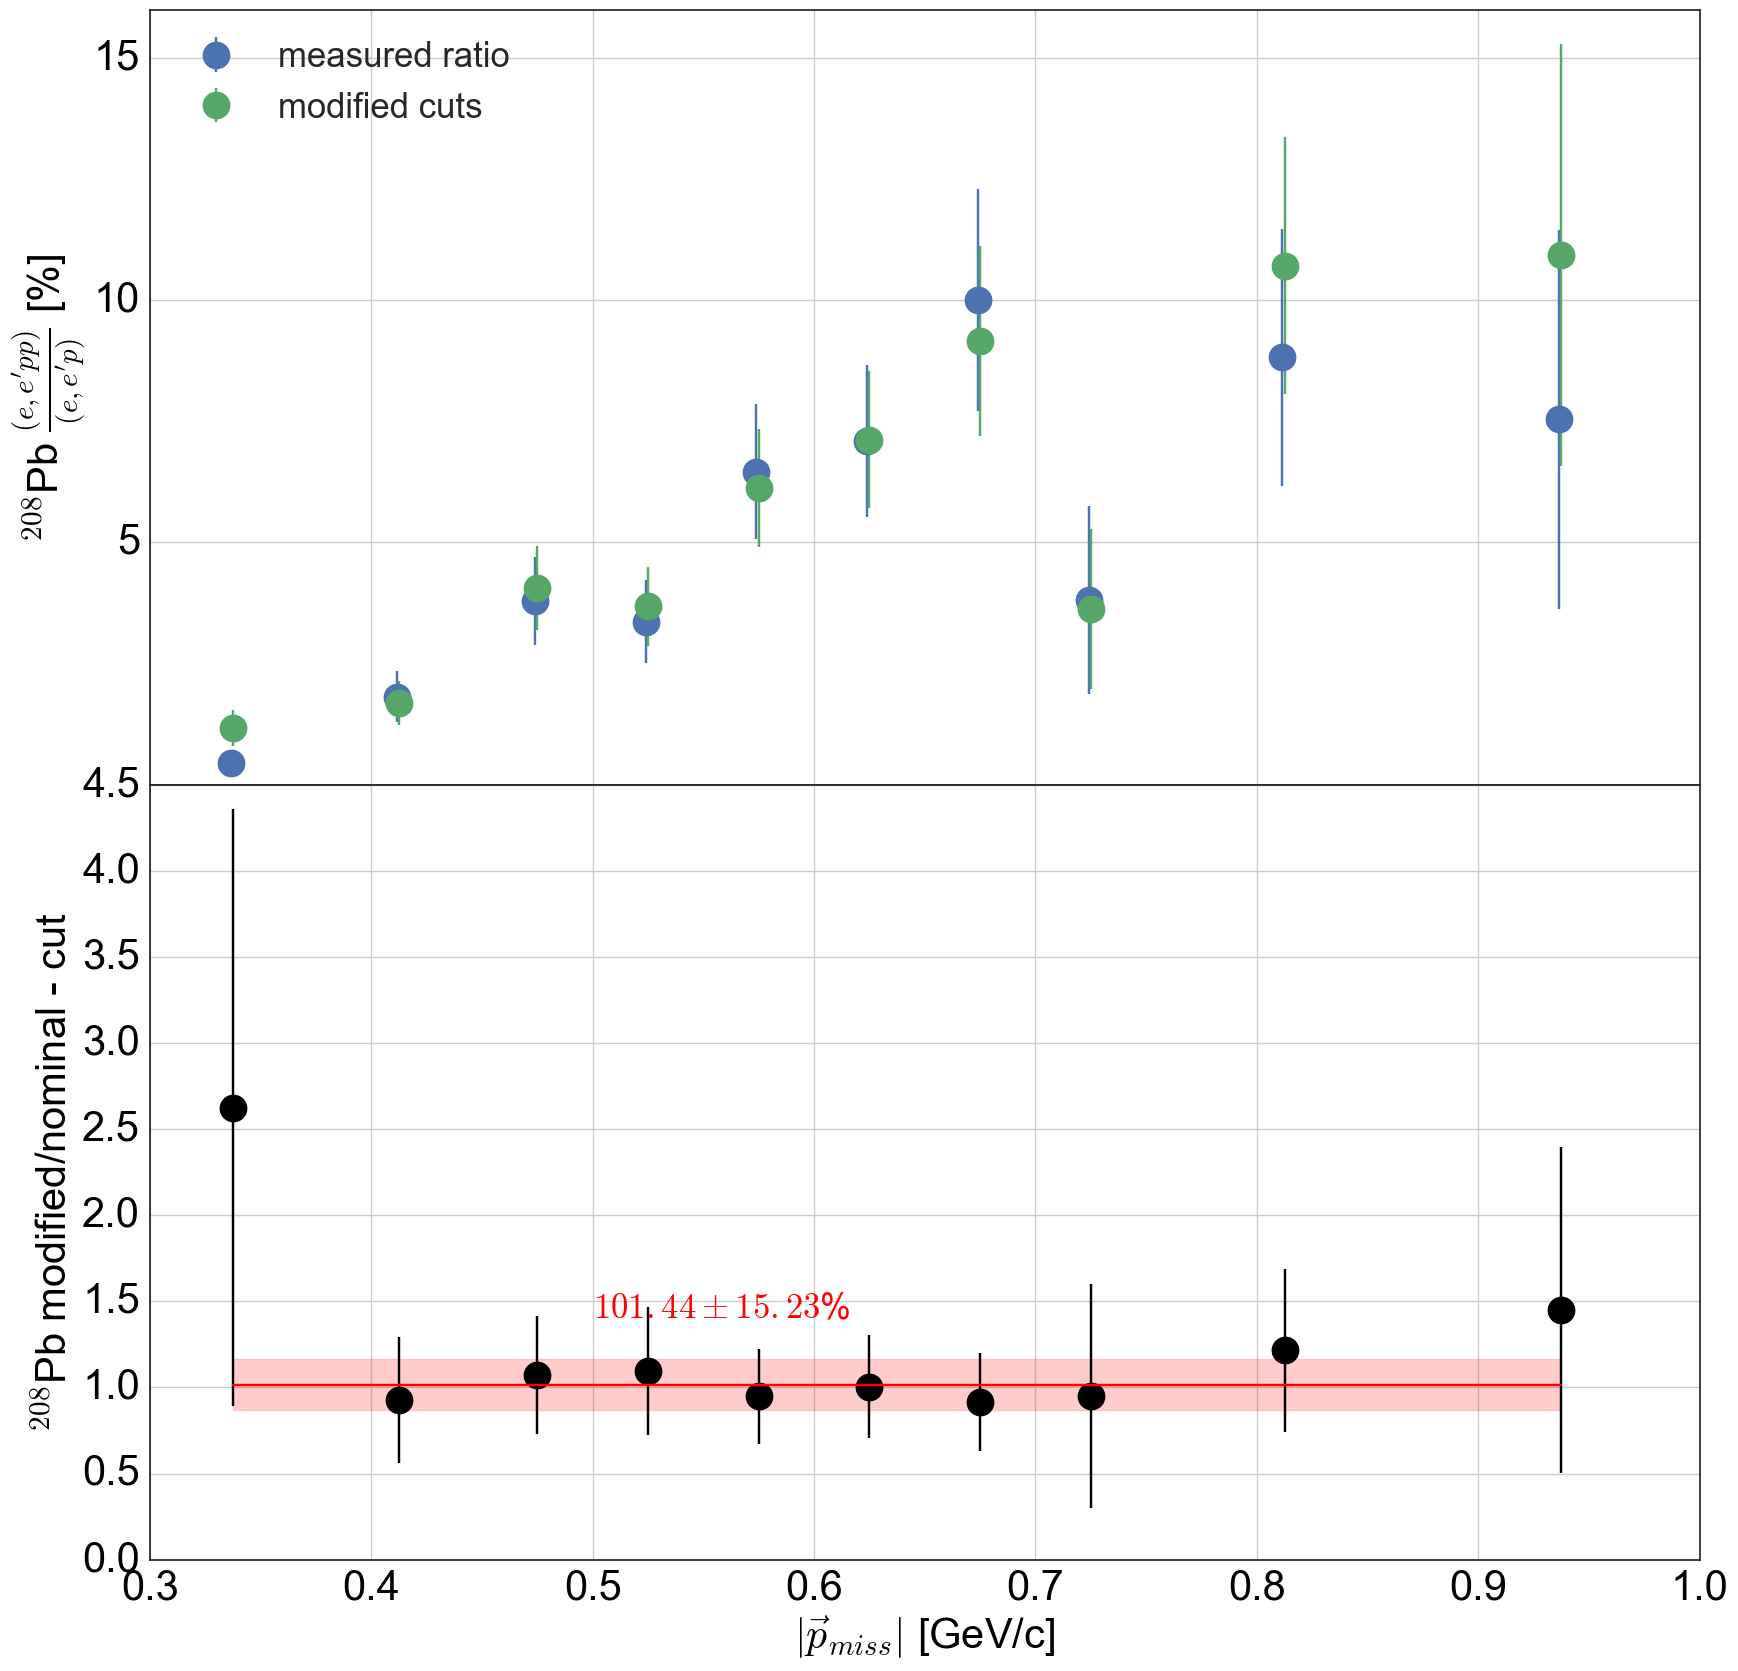

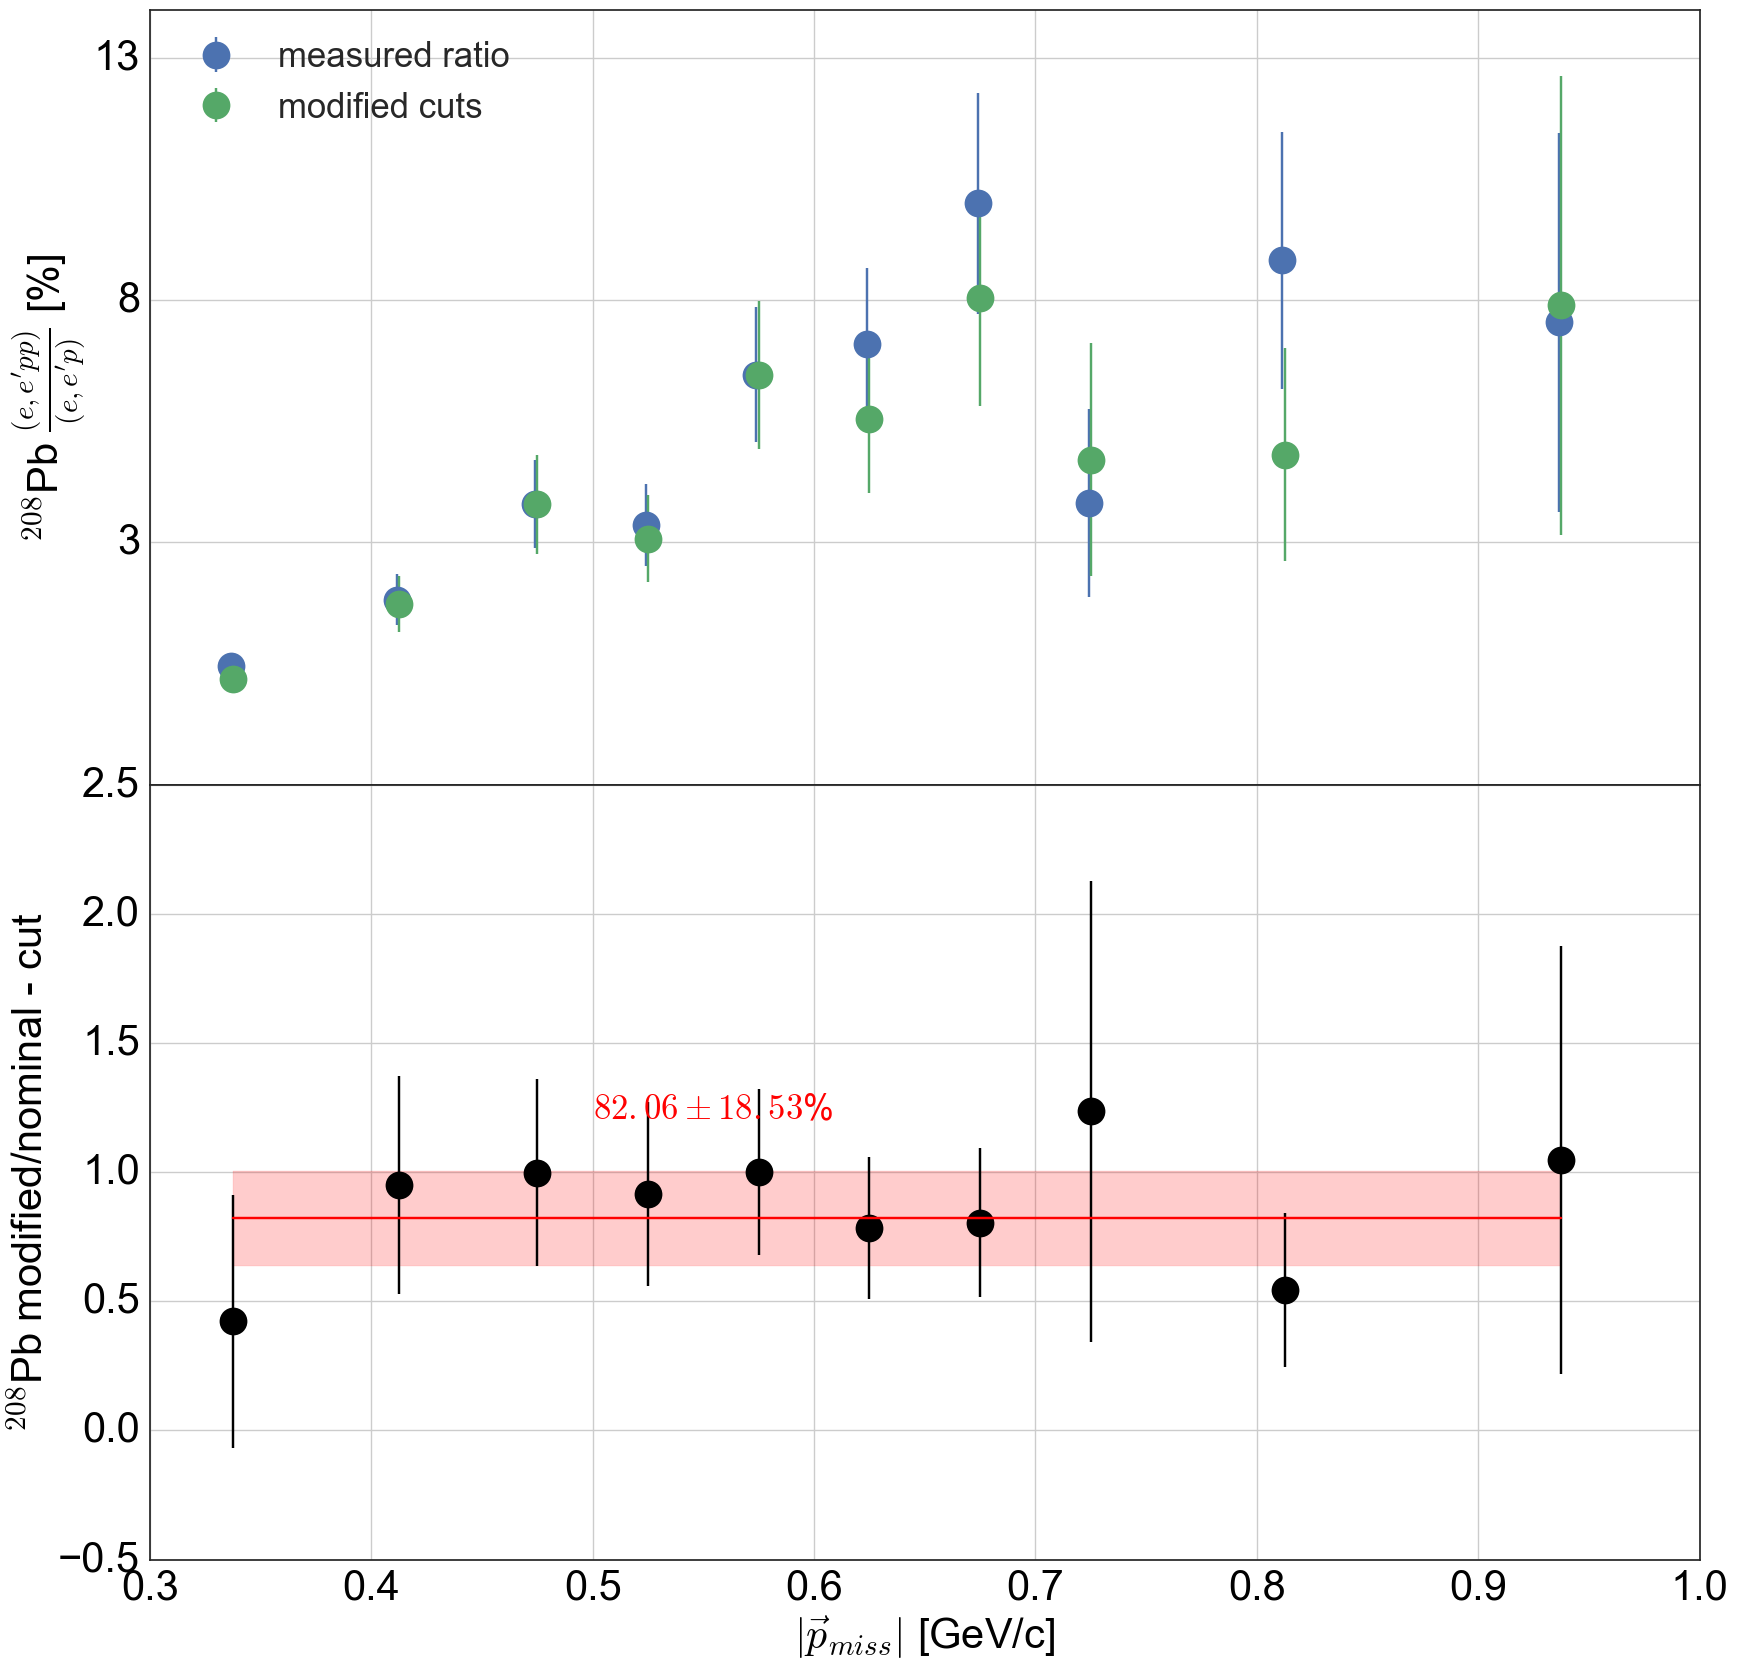

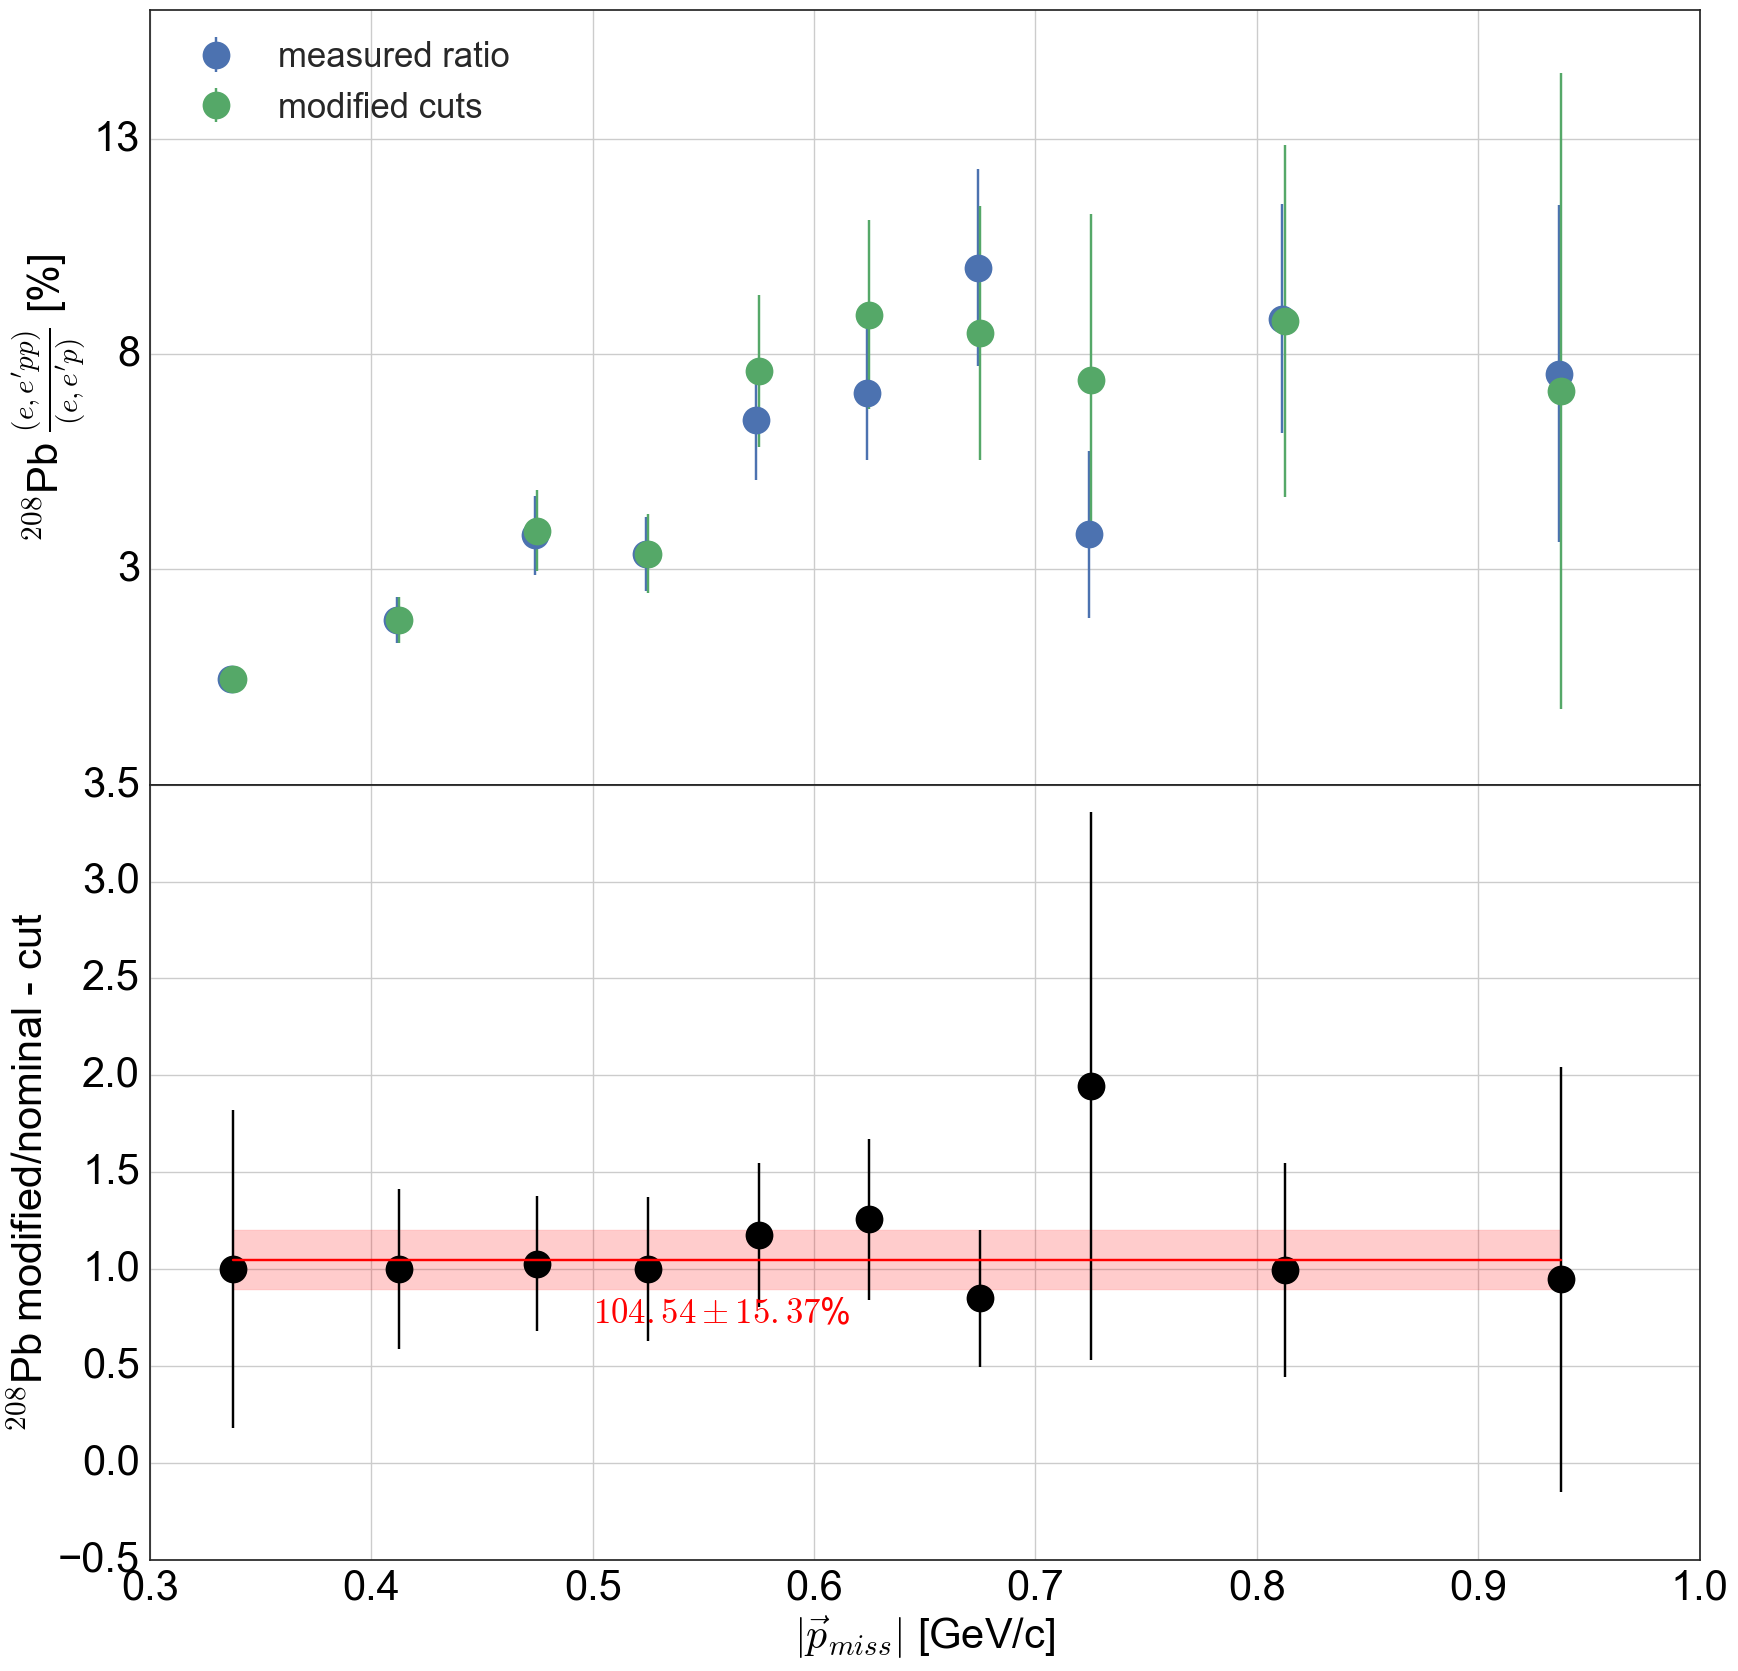

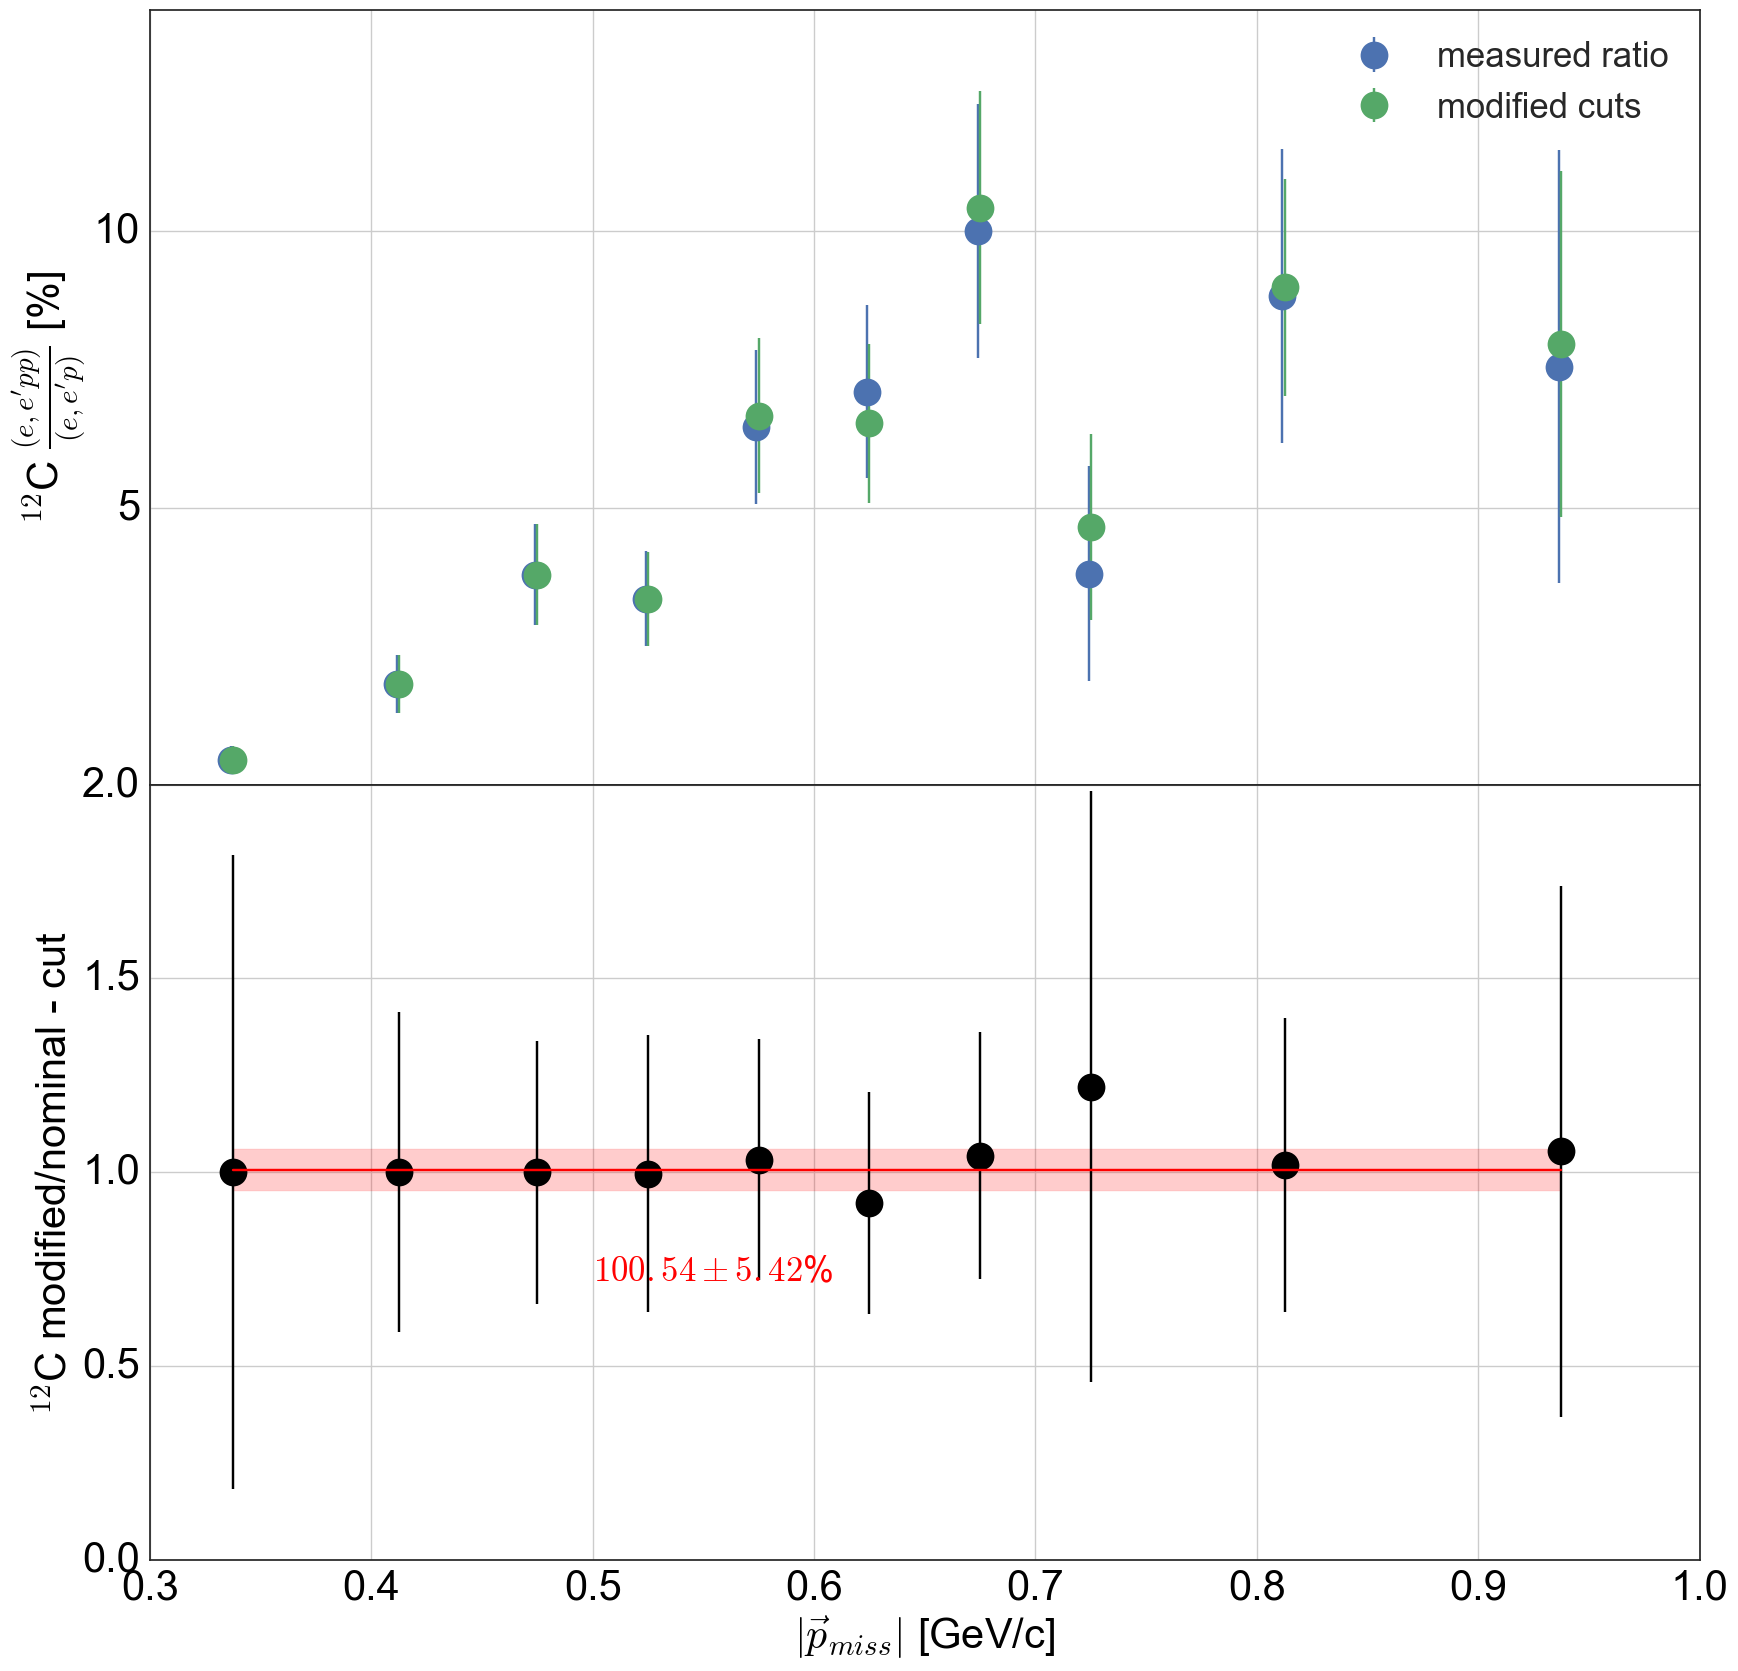

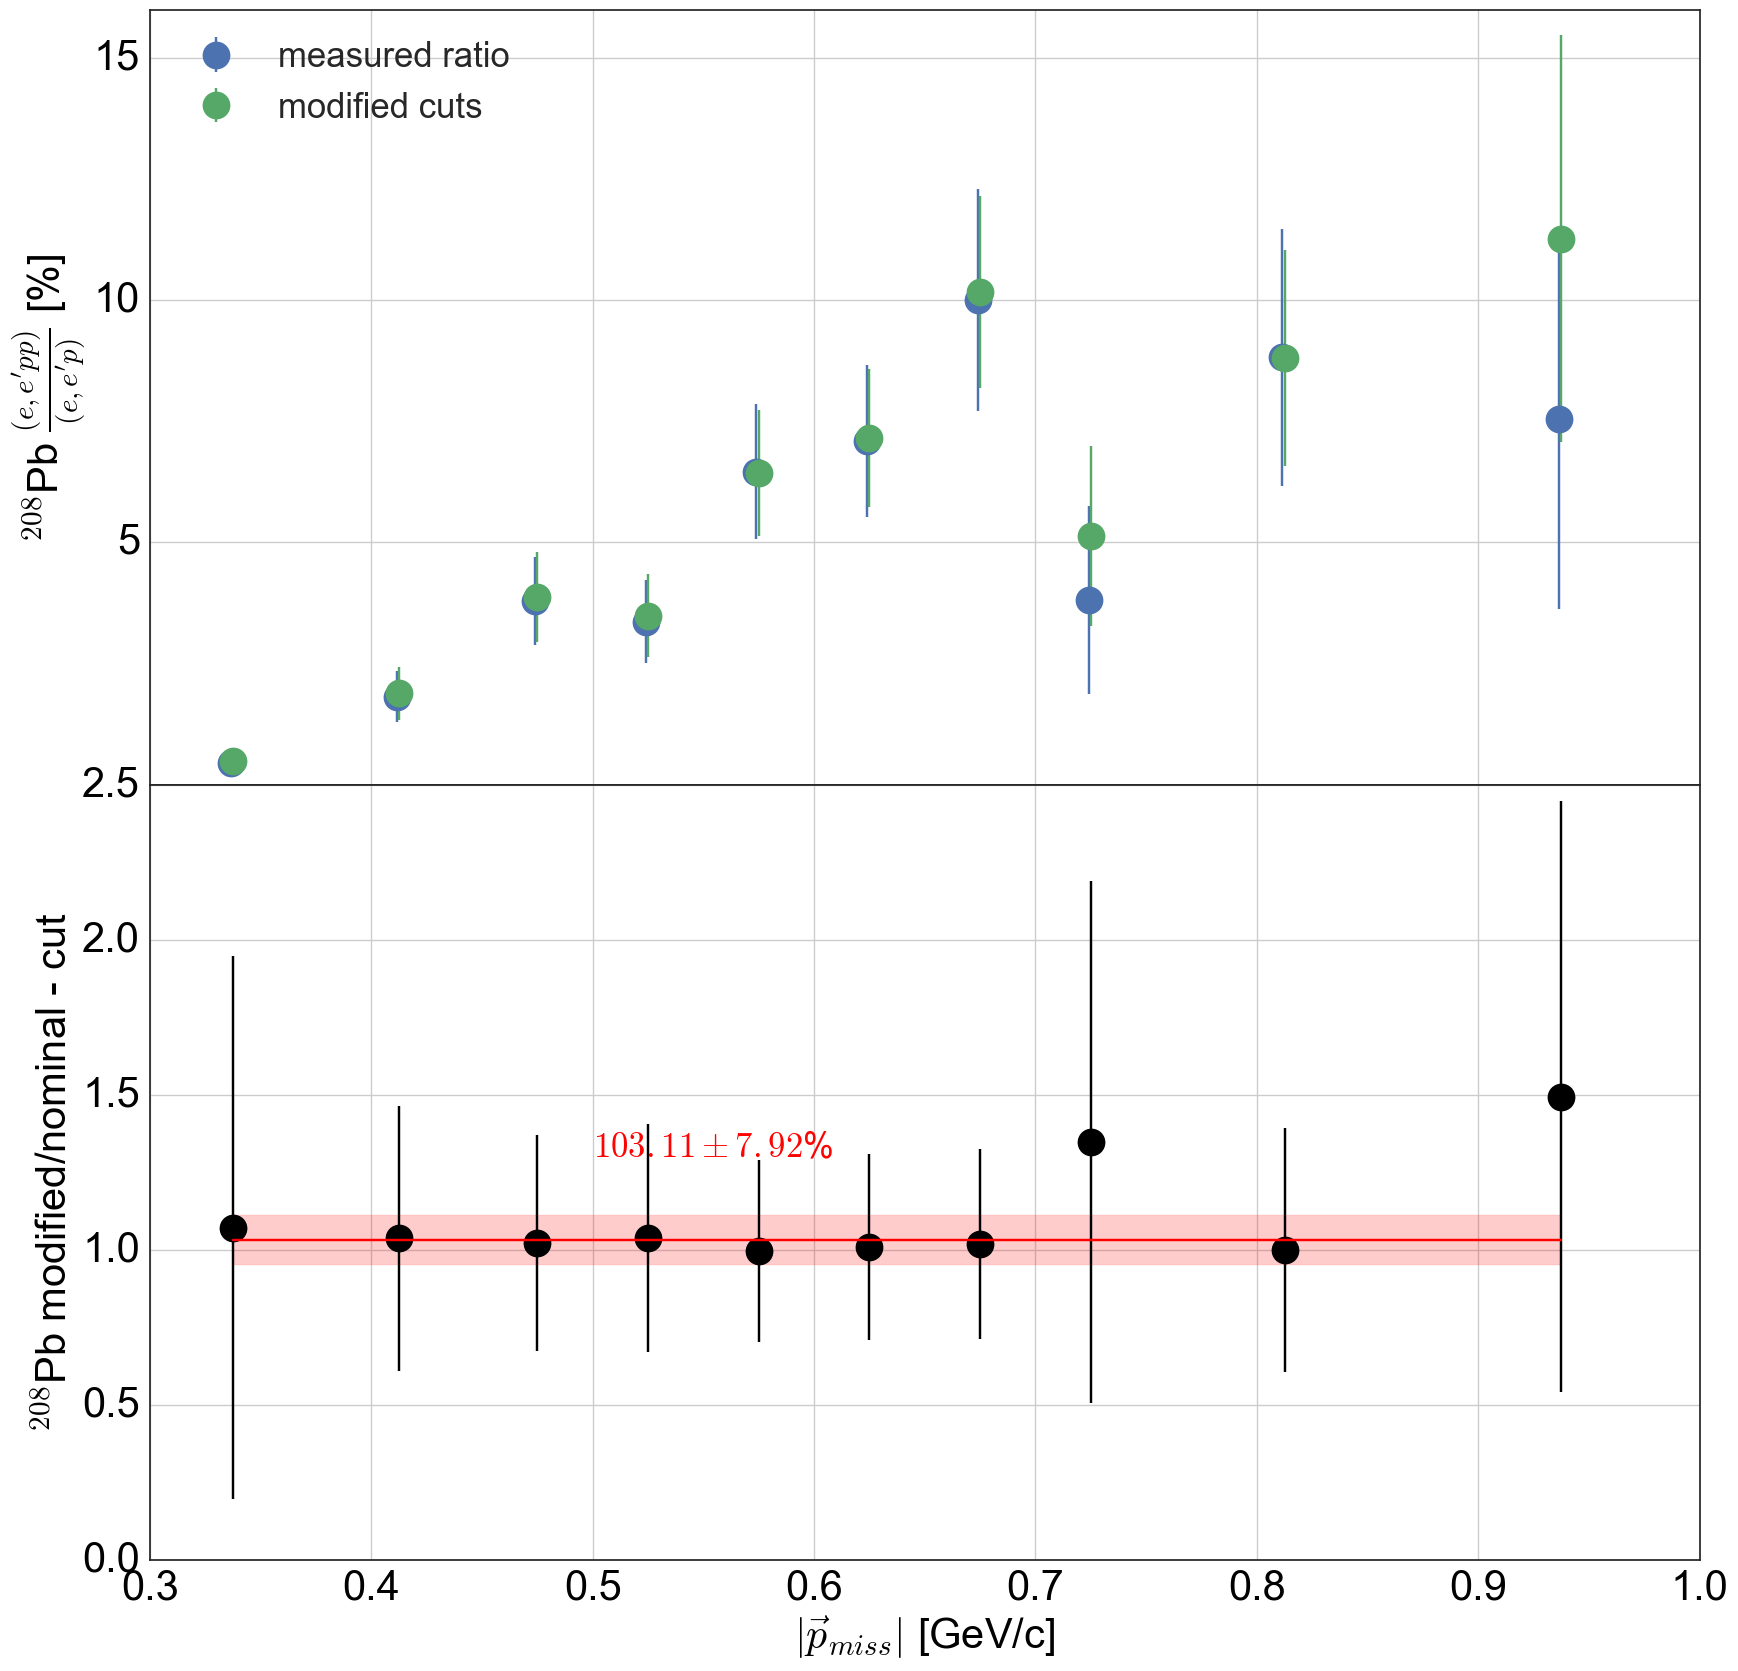

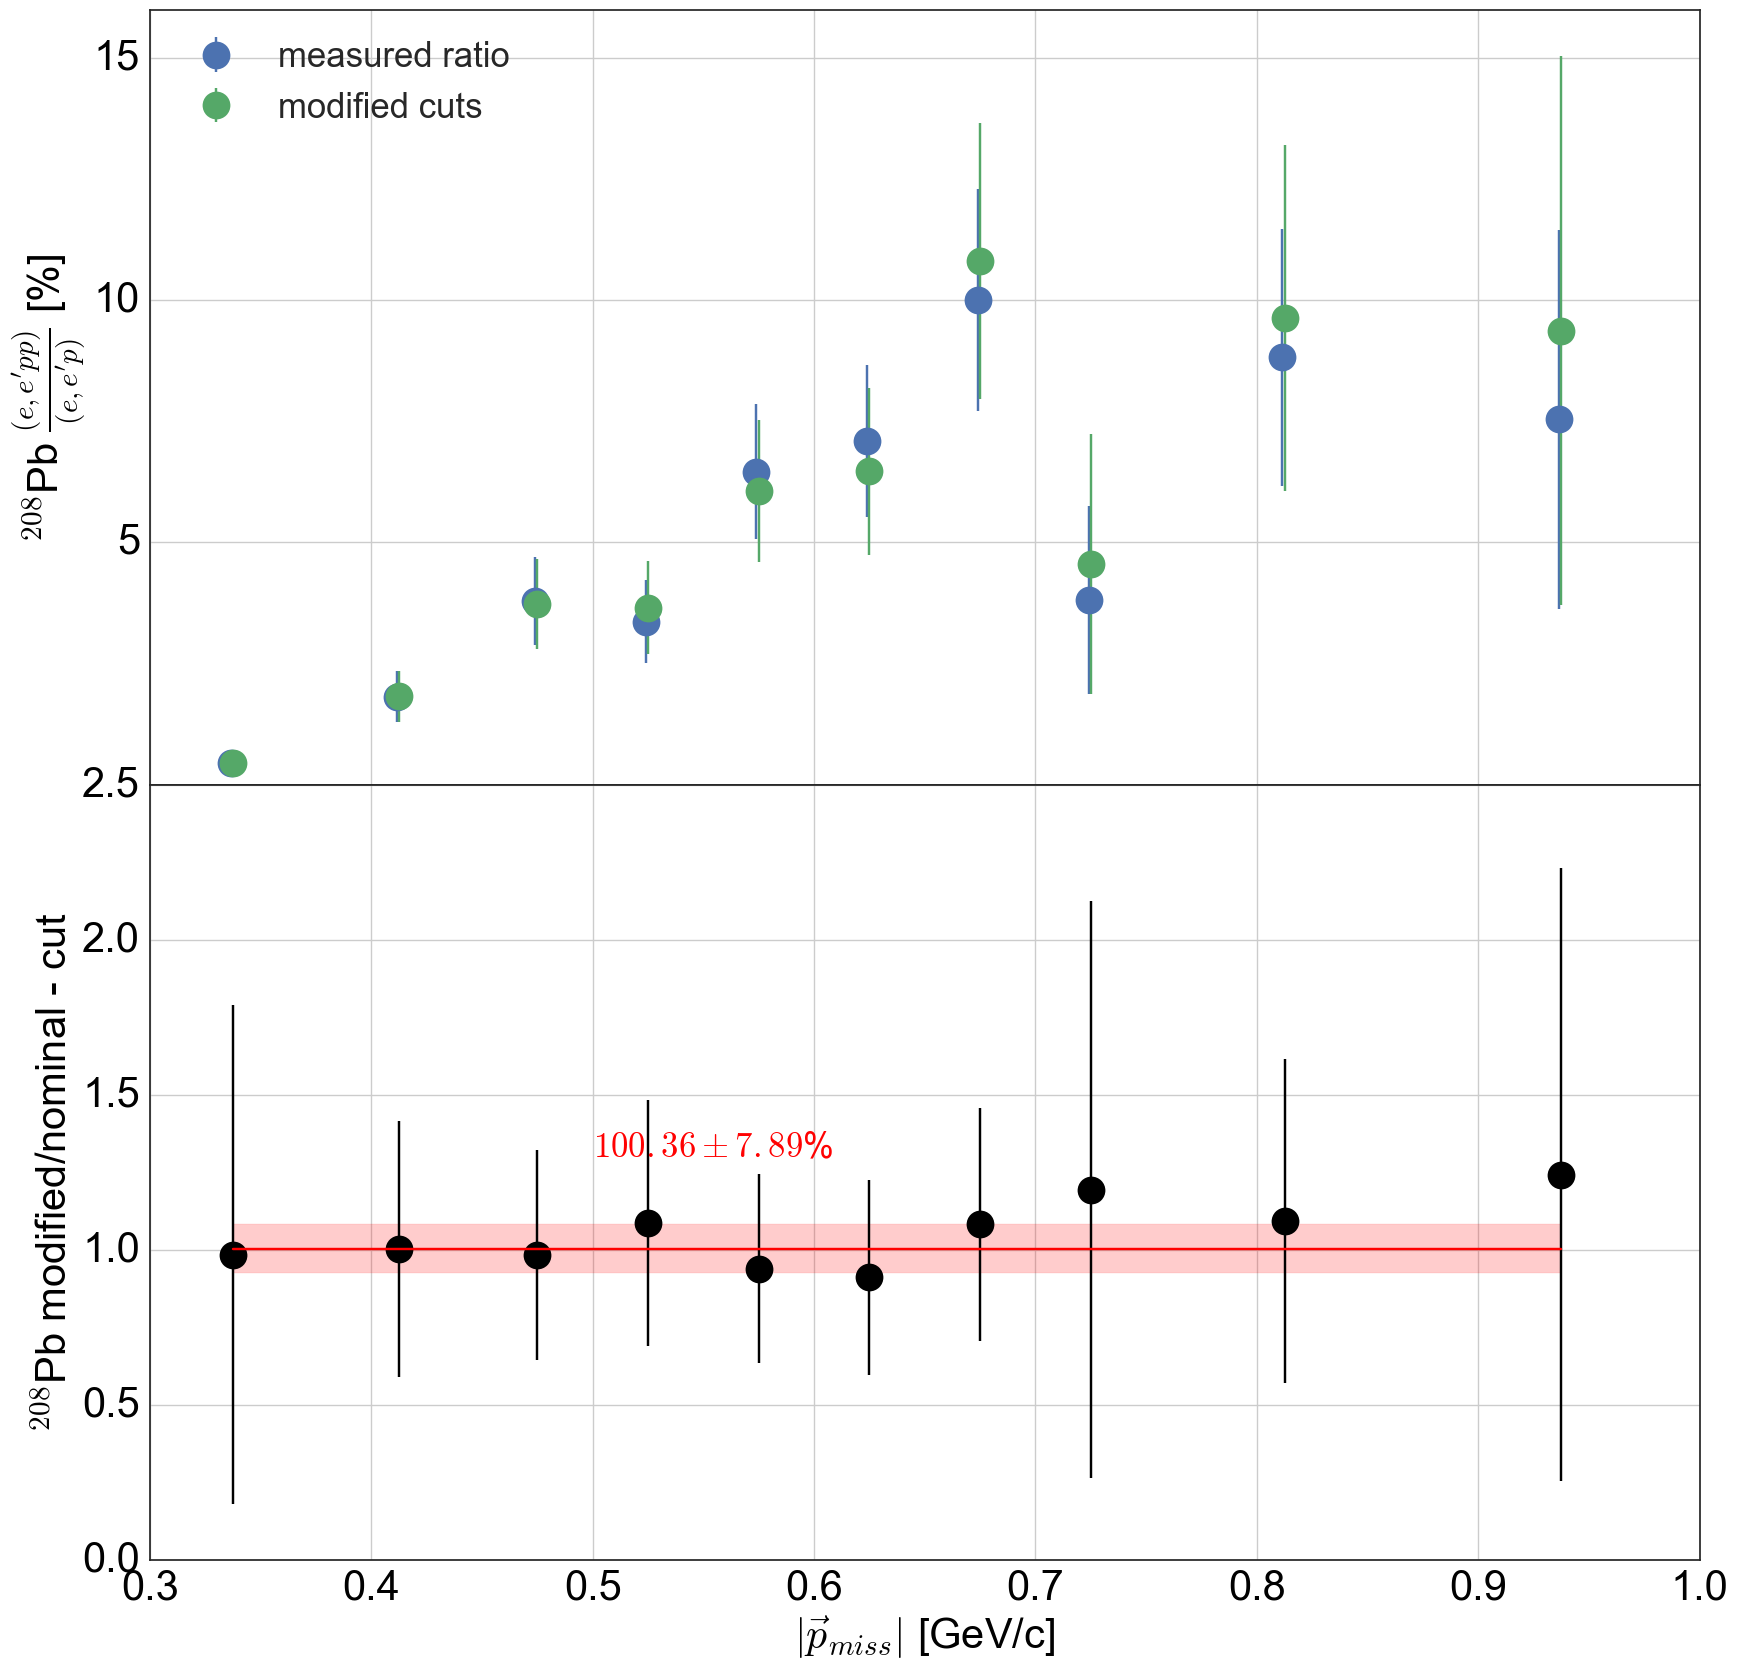

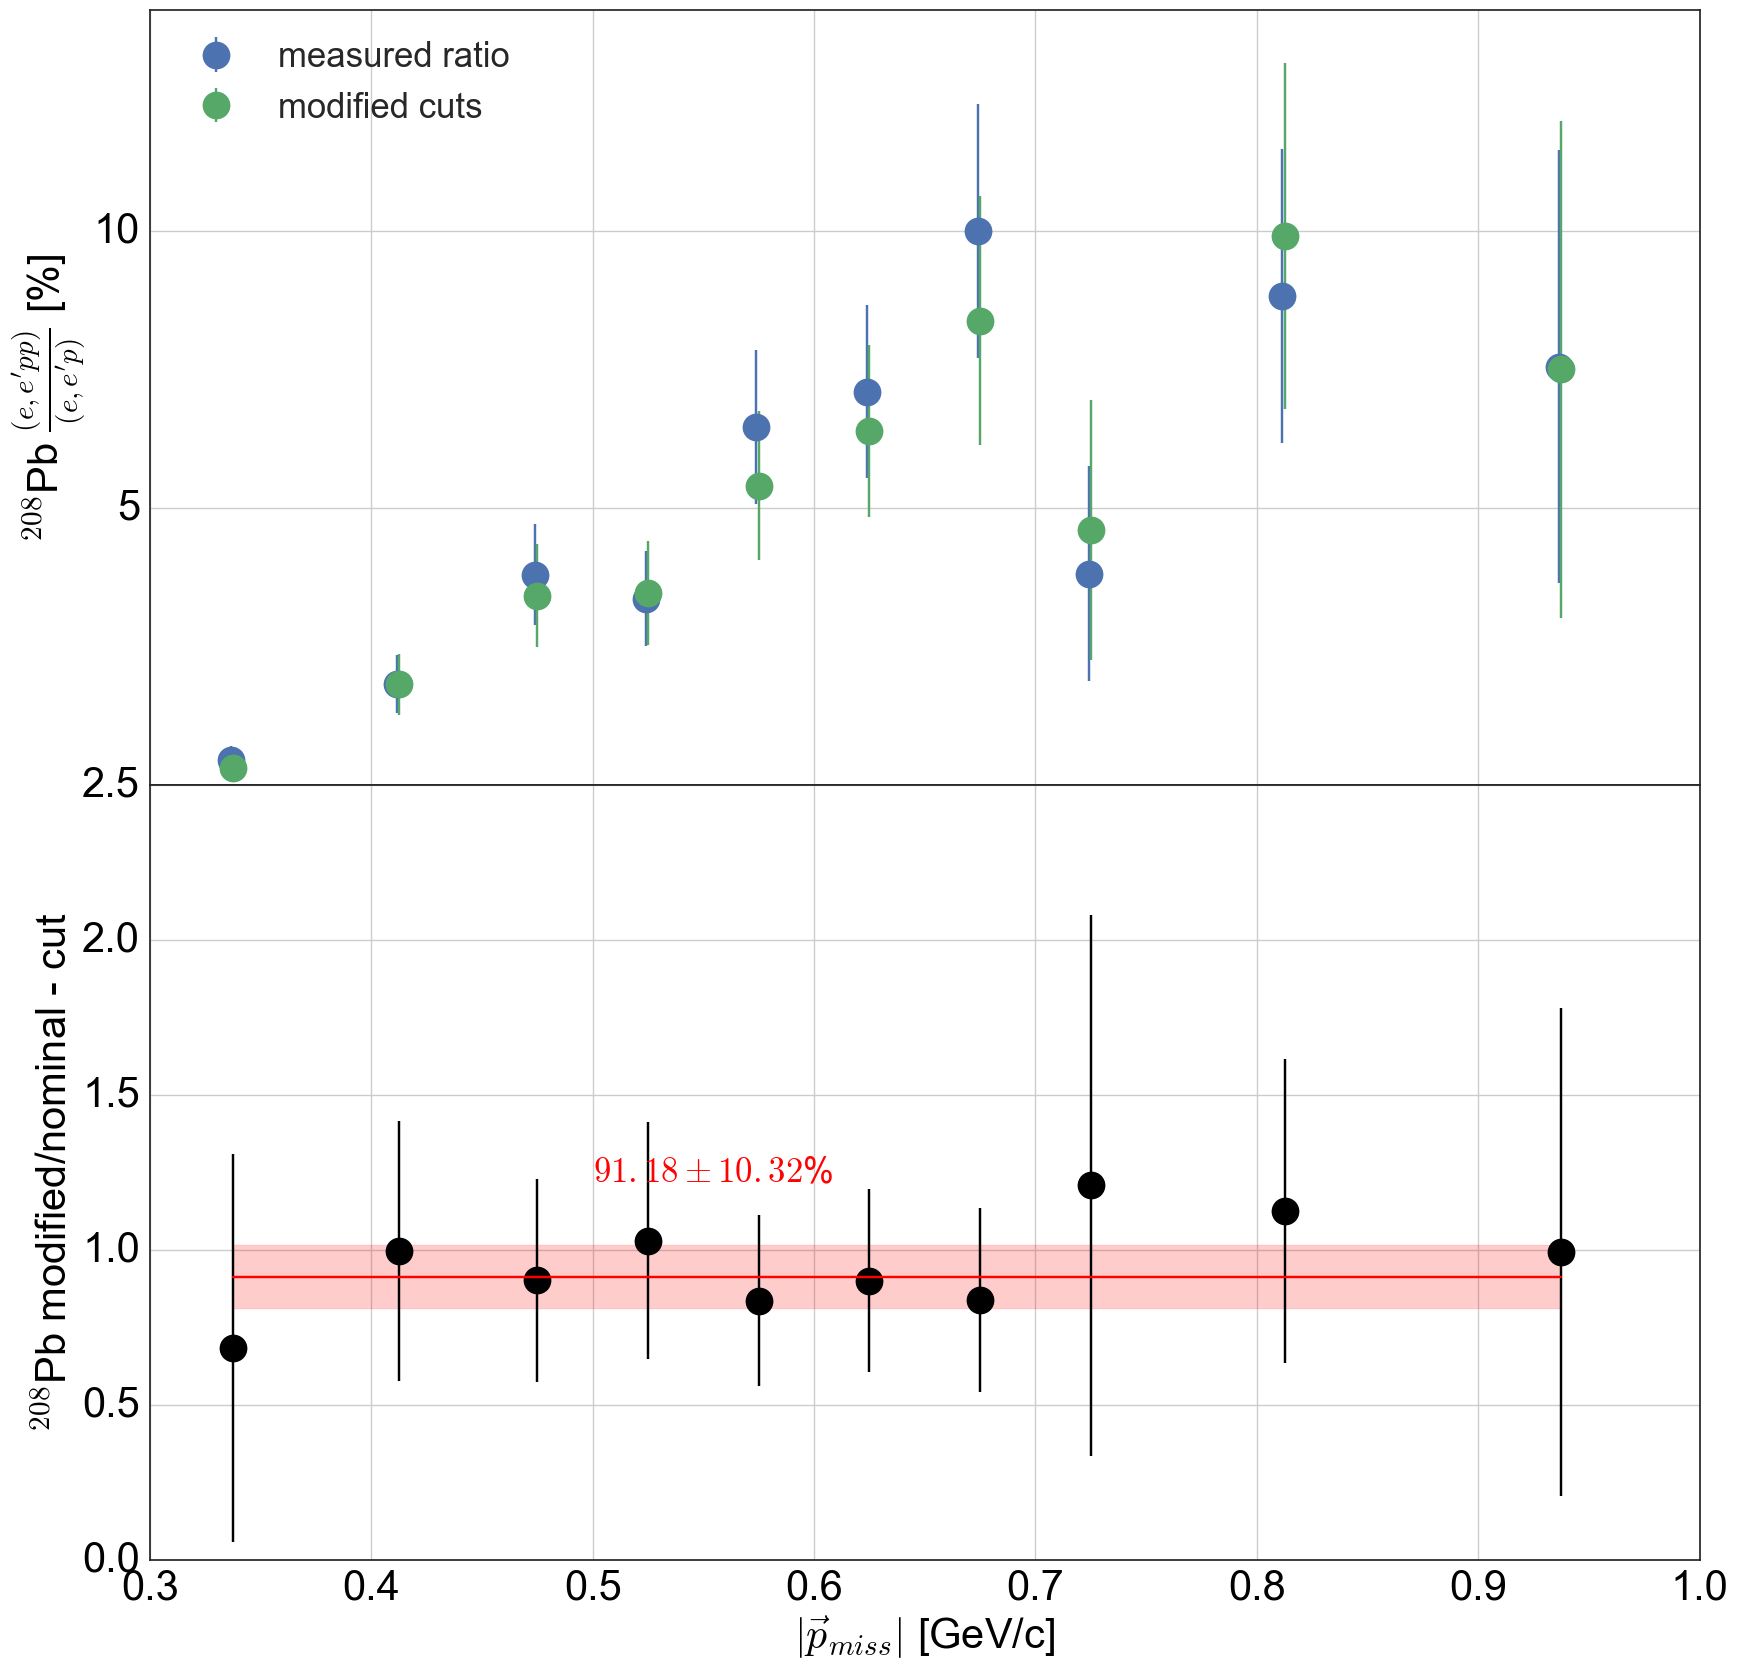

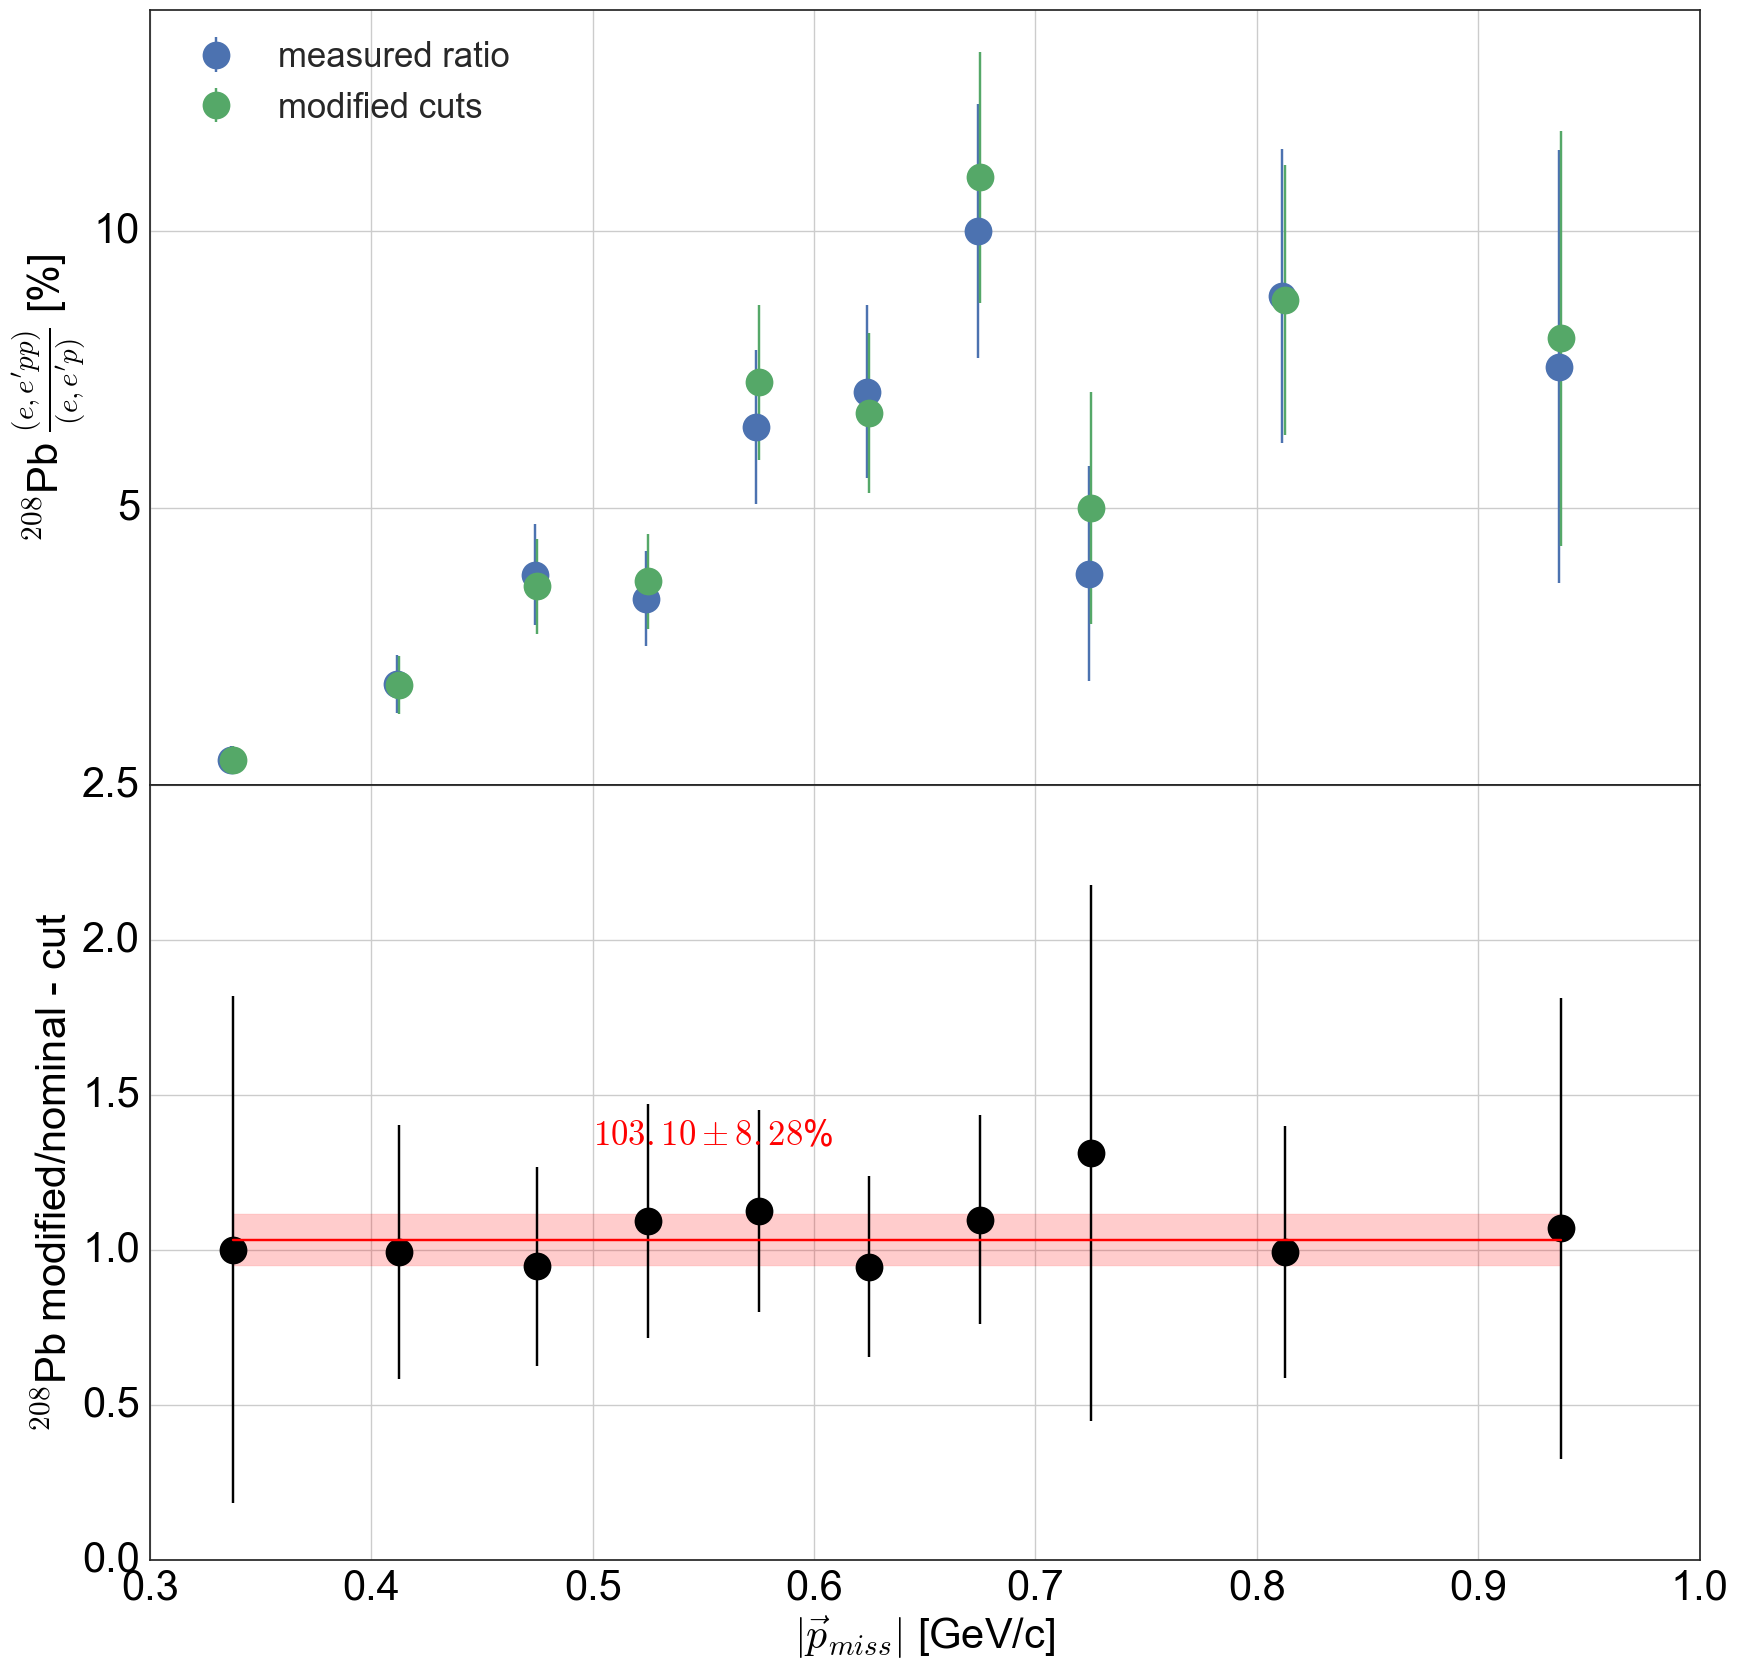

In [26]:
do_save_plots=True
for target,target_name in zip(['Al27','Fe56','Pb208'],['$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):

    modeified_cut_eepp_eep_ratio(modified_cut_name='Xb115' ,    
                                 cutXb = '(1.15<Xb)' , target=target,target_name=target_name,
                                 do_save_plots=do_save_plots)
    modeified_cut_eepp_eep_ratio(modified_cut_name='Xb125' , 
                                 cutXb = '(1.25<Xb)' ,  target=target,target_name=target_name,
                                 do_save_plots=True)
    modeified_cut_eepp_eep_ratio(modified_cut_name='theta_pq_20' , 
                             cut_theta_pq = '(theta_pq<20)', target=target,target_name=target_name,
                             ytext=0.72,                                
                             do_save_plots=True)
    modeified_cut_eepp_eep_ratio(modified_cut_name='theta_pq_30' , 
                             cut_theta_pq = '(theta_pq<30)', target=target,
                             ytext=0.72,                                
                             do_save_plots=True)
    modeified_cut_eepp_eep_ratio(modified_cut_name='p_over_q_057_091' , 
                             cut_p_over_q = '(0.57<p_over_q && p_over_q<0.91)', target=target,target_name=target_name,
                             ytext=1.3,                                
                             do_save_plots=True)
    modeified_cut_eepp_eep_ratio(modified_cut_name='p_over_q_067_101' , 
                             cut_p_over_q = '(0.67<p_over_q && p_over_q<1.01)', target=target,target_name=target_name,
#                              ytext=1.3,                                
                             do_save_plots=True)
    modeified_cut_eepp_eep_ratio(modified_cut_name='mmiss1050' , 
                                 cut_m_miss = 'Mmiss < 1.050', target=target,target_name=target_name,
                                 do_save_plots=True)
    modeified_cut_eepp_eep_ratio(modified_cut_name='mmiss1150' , 
                                 cut_m_miss = 'Mmiss < 1.150', target=target,target_name=target_name,
                                 do_save_plots=True)